#  PROJET MACHINE LEARNING EN R SUR DES DONNEES METEOROLOGIQUES

## Introduction

# <FONT COLOR="Red">√âpisode 1</font>

## Prise en charge des donn√©es

Pr√©sentation du jeu de donn√©es : La population √©tudi√©e dans ce jeu de donn√©es est l‚Äôensemble des observations m√©t√©orologiques d'une station de M√©t√©o France. Notre √©chantillon se compose de 688 stations. Le jeu de donn√©es comprend 18 variables statistiques (dont 2 qualitatives et 16 quantitatives). Concernant les variables qualitatives, la date est qualitative ordinale avec 688 modalit√©s, la variable rain_class a 4 modalit√©s (1: high_rain, 2:low_rain, 3:no_rain). 

Les donn√©es ont √©t√© extraites et mises en forme par le service concern√© de M√©t√©o France. Elles sont d√©crites par les variables suivantes :

PARAMETRES METEOROLOGIQUES OBSERVES LE JOUR J:
* **date** : date du jour actuel ;
* **ff** : vitesse du vent (en $m.s^{-1}$);
* **t** :temp√©rature (en Kelvin K);
* **td** : point de ros√©e (en K) ;
* **hu** : l'humidit√© (en %);
* **dd** : direction du vent (en degr√©s) ;
* **precip** : quantit√© totale des pr√©cipitations ($kg.m^{‚àí2}$) ;

PREVISIONS METEOS DU JOUR SUIVANT PAR LE MODELE AROME:
* **ws_arome** : vitesse du vent (en $m.s^{-1}$);
* **p3031_arome** : direction du vent (en degr√©s);
* **u10_arome**: composantes du vent d'Ouest √† Est prise √† 10m de hauteur (en $m.s^{-1}$);
* **v10_arome**:composantes du vent du Sud au Nord prise √† 10m de hauteur (en $m.s^{-1}$);
* **t2m_arome**: temp√©rature √† 2m√®tres du sol (K);
* **d2m_arome**: point de ros√©e √† 2m du sol(K);
* **r_arome**: humidit√© (en %) ;
* **tp_arome**: quantit√© totale de pr√©cipitations ($kg.m^{‚àí2}$);
* **msl_arome**: pression atmosph√©rique (en Pa);

VARIABLES REPONSE
* **rain** : quantit√© totale de pr√©cipitation le jour suivant $kg.m^{‚àí2}$;
* **rain_class**: cat√©gorie de pr√©cipitations : -no_rain (si rain=0), -low_rain (si 0<rain<2), -high_rain (si rain>2)

## 1. Chargement et mise en forme des donn√©es

In [3]:
options(warn=-1) #options(warn=0) pour remettre les warnings

In [4]:
#DECOMMENTER SI BESOIN -- SVP rassemblez toutes les installations de librairies ici

#install.packages("nortest")
#install.packages("MASS")
#install.packages("corrplot")
#install.packages("ggplot2")
#install.packages("FactoMineR")
#install.packages("factoextra")
#install.packages("glmnet")
#install.packages("plotrix") 
#install.packages("ROCR") 

In [5]:
library("nortest")
library("MASS")
library("corrplot")
library("ggplot2")
library("factoextra")
library("FactoMineR") #pour la PCA
library("patchwork") #pour plot 2 ggplots cote √† cote 
library("glmnet") #pour faire la regression lasso
library("plotrix") #pour faire des plot (lasso par ex)
library("nnet") #pour la regression logistique multiclasses
library("ROCR") #pour les courbes ROC
library("glmnet")
library("MASS") #pour l'analyse discriminante
library("class") #pour kNN
library("e1071") #pour tunner k dans kNN
library("rpart") #arbre de d√©cision binaire
library("partykit") #visualisation des arbres 
library("randomForest")
library("nnet") #r√©seaux de neurones
library("e1071") #validation crois√©e pour r√©seaux de neurones
library("ramify") #pour calculer l'argmax d'une matrice
library("gbm") #gradient boosting models
library("MLmetrics") #pour calculer le F1_score 

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attachement du package : 'patchwork'


L'objet suivant est masqu√© depuis 'package:MASS':

    area


Le chargement a n√©cessit√© le package : Matrix

Loaded glmnet 4.1-3

Le chargement a n√©cessit√© le package : grid

Le chargement a n√©cessit√© le package : libcoin

Le chargement a n√©cessit√© le package : mvtnorm

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : 'randomForest'


L'objet suivant est masqu√© depuis 'package:ggplot2':

    margin



Attachement du package : 'ramify'


Les objets suivants sont masqu√©s depuis 'package:Matrix':

    tril, triu


L'objet suivant est masqu√© depuis 'package:graphics':

    clip


Loaded gbm 2.1.8


Attachement du package : 'MLmetrics'


L'objet suivant est masqu√© depuis 'package:base':

    Recall




In [6]:
# Lecture des donn√©es
path <- ""
meteo <- read.table(paste(path, "rain_project.txt", sep = ""), header = TRUE)
meteo<-meteo[,c(2:19)] #supprimer la premi√®re colonne 

# V√©rification du contenu
head(meteo)

date       ff       t        td       hu       dd       precip ws_arome
1 2017-06-11 3.945000 289.4087 285.2771 78.78333 246.7500 0.0    3.663785
2 2016-03-06 3.739583 276.3758 273.4225 81.70000 260.3333 1.2    3.328476
3 2016-07-29 3.273750 288.8692 286.7233 87.62083 259.0417 0.2    3.232380
4 2016-05-16 1.745000 284.2887 280.2158 76.58750 216.5417 0.0    1.720926
5 2016-02-03 5.718750 277.5279 274.5292 81.39167 285.5417 1.6    4.424012
6 2016-12-29 1.750000 277.3533 275.1396 86.20417 140.8750 0.2    1.780965
  p3031_arome u10_arome  v10_arome  t2m_arome d2m_arome r_arome  tp_arome  
1 244.2995     3.0385028  1.4163599 289.2323  285.1709  79.03778  2.3282769
2 305.6608     2.4638858 -1.8989708 275.8087  273.6726  86.33160 10.6754407
3 256.0424     2.9638715  0.9856267 289.6274  286.4851  82.30103  4.5823092
4 139.2973    -0.2606926 -1.3976028 284.7261  280.3673  75.38412  0.9402537
5 285.5788     3.9400556 -1.4576058 277.7517  274.5907  80.43509 13.9030762
6 157.8312     0.1446032  0.6620992 275.2941  273.0910  85.25869  0.2059833
  msl_arome rain rain_class
1 101672.9  0.2  low_rain  
2 100583.8  4.2  high_rain 
3 101483.0  0.0  no_rain   
4 102223.6  0.0  no_rain   
5 102416.2  0.0  no_rain   
6 103463.9  0.2  low_rain

In [7]:
# Changement du type des variables qualitatives en facteur et ajout d'une classe mois
meteo[, "rain_class"] <- as.factor(meteo[, "rain_class"]) 
meteo[, "date"] <- months(as.Date(meteo[, "date"])) 
#transforme les donn√©es en format date et r√©cup√®re le mois associ√©
meteo[, "date"] <- as.factor(meteo[, "date"])
head(meteo)

date     ff       t        td       hu       dd       precip ws_arome
1 juin     3.945000 289.4087 285.2771 78.78333 246.7500 0.0    3.663785
2 mars     3.739583 276.3758 273.4225 81.70000 260.3333 1.2    3.328476
3 juillet  3.273750 288.8692 286.7233 87.62083 259.0417 0.2    3.232380
4 mai      1.745000 284.2887 280.2158 76.58750 216.5417 0.0    1.720926
5 f√©vrier  5.718750 277.5279 274.5292 81.39167 285.5417 1.6    4.424012
6 d√©cembre 1.750000 277.3533 275.1396 86.20417 140.8750 0.2    1.780965
  p3031_arome u10_arome  v10_arome  t2m_arome d2m_arome r_arome  tp_arome  
1 244.2995     3.0385028  1.4163599 289.2323  285.1709  79.03778  2.3282769
2 305.6608     2.4638858 -1.8989708 275.8087  273.6726  86.33160 10.6754407
3 256.0424     2.9638715  0.9856267 289.6274  286.4851  82.30103  4.5823092
4 139.2973    -0.2606926 -1.3976028 284.7261  280.3673  75.38412  0.9402537
5 285.5788     3.9400556 -1.4576058 277.7517  274.5907  80.43509 13.9030762
6 157.8312     0.1446032  0.6620992 275.2941  273.0910  85.25869  0.2059833
  msl_arome rain rain_class
1 101672.9  0.2  low_rain  
2 100583.8  4.2  high_rain 
3 101483.0  0.0  no_rain   
4 102223.6  0.0  no_rain   
5 102416.2  0.0  no_rain   
6 103463.9  0.2  low_rain

## 2. Analyse Unidimensionnelle

Remarquer le type des variables. Il est n√©cessaire d'en √©tudier la distribution. Noter la sym√©trie ou non de celles-ci .

### Analyse propos√©e par th√®me :  

1. Imput :

- Les variables relatives √† la vitesse du vent (ff_mod, ws_arome_mod) 
- les variables relatives aux pr√©cipitations (precip_mod et tp_arome)
- Les variables relatives √† la temp√©rature et au point de ros√©e (t_mod, td_mod, t2m_arome_mod et d2m_arome_mod)
- Les variables relatives √† la direction du vent (dd_mod, p3031_arome_mod, u10_arome, v10_arome)
- Les variables relatives √† l'humidit√© (hu et r_arome)
- pression atmosph√©rique (msl arome)

2. Output : 

- rain et rain class 


Pour chaque variable 

- tracer histogramme (ou regarder ci-dessus mais c'est un peu petit) + fonction de r√©partition + boxplot

- ou pie chart et barplot si variable qualitative 

- donner une interpr√©tation de la distribution.

In [8]:
summary(meteo)

       date           ff               t               td       
 juillet : 62   Min.   : 1.158   Min.   :269.5   Min.   :267.1  
 mars    : 62   1st Qu.: 2.870   1st Qu.:279.9   1st Qu.:277.6  
 janvier : 61   Median : 3.859   Median :283.2   Median :281.2  
 juin    : 59   Mean   : 4.082   Mean   :283.7   Mean   :281.1  
 novembre: 59   3rd Qu.: 4.970   3rd Qu.:287.6   3rd Qu.:284.7  
 mai     : 58   Max.   :12.500   Max.   :299.5   Max.   :291.1  
 (Other) :327                                                   
       hu               dd             precip          ws_arome      
 Min.   : 46.75   Min.   : 32.92   Min.   : 0.000   Min.   : 0.9675  
 1st Qu.: 80.53   1st Qu.:158.74   1st Qu.: 0.000   1st Qu.: 2.6220  
 Median : 86.40   Median :222.81   Median : 0.400   Median : 3.4432  
 Mean   : 85.56   Mean   :206.58   Mean   : 2.384   Mean   : 3.7193  
 3rd Qu.: 92.06   3rd Qu.:260.68   3rd Qu.: 2.600   3rd Qu.: 4.5827  
 Max.   :100.00   Max.   :343.04   Max.   :34.500   Max.   :

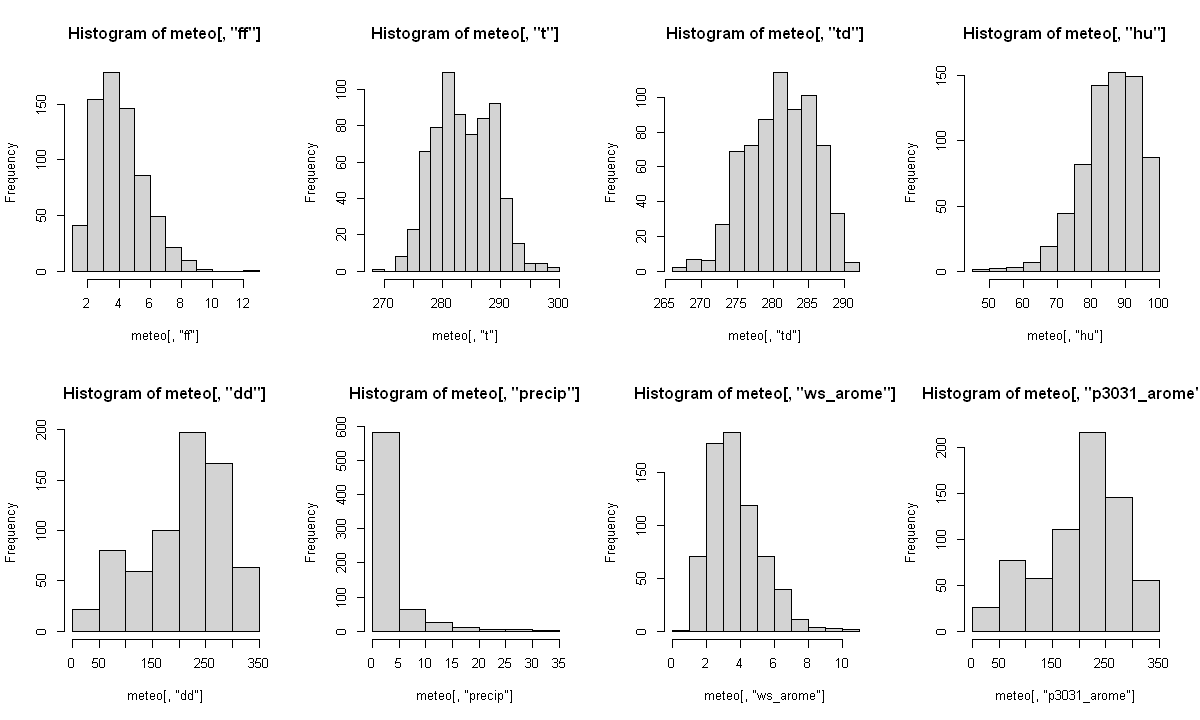

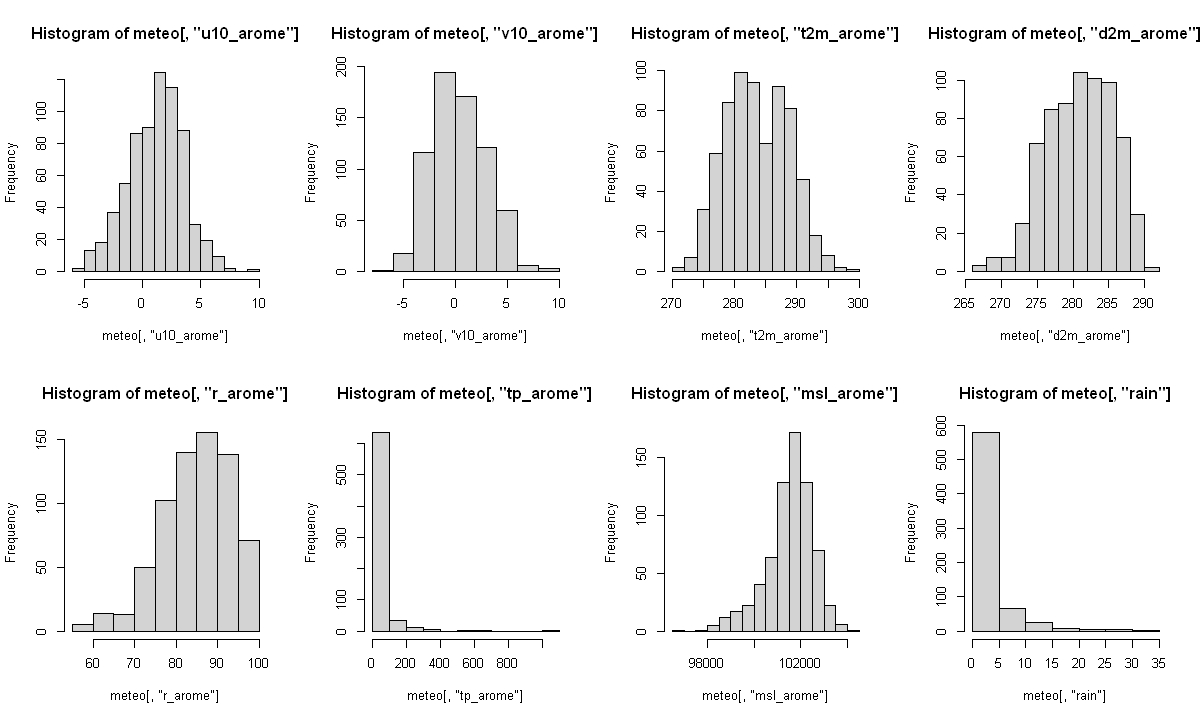

In [9]:
options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow = c(2,4))
hist(meteo[, "ff"])
hist(meteo[, "t"])
hist(meteo[, "td"])
hist(meteo[, "hu"])
hist(meteo[, "dd"])
hist(meteo[, "precip"])
hist(meteo[, "ws_arome"])
hist(meteo[, "p3031_arome"])

par(mfrow = c(2,4))
hist(meteo[, "u10_arome"])
hist(meteo[, "v10_arome"])
hist(meteo[, "t2m_arome"])
hist(meteo[, "d2m_arome"])
hist(meteo[, "r_arome"])
hist(meteo[, "tp_arome"])
hist(meteo[, "msl_arome"])
hist(meteo[, "rain"])

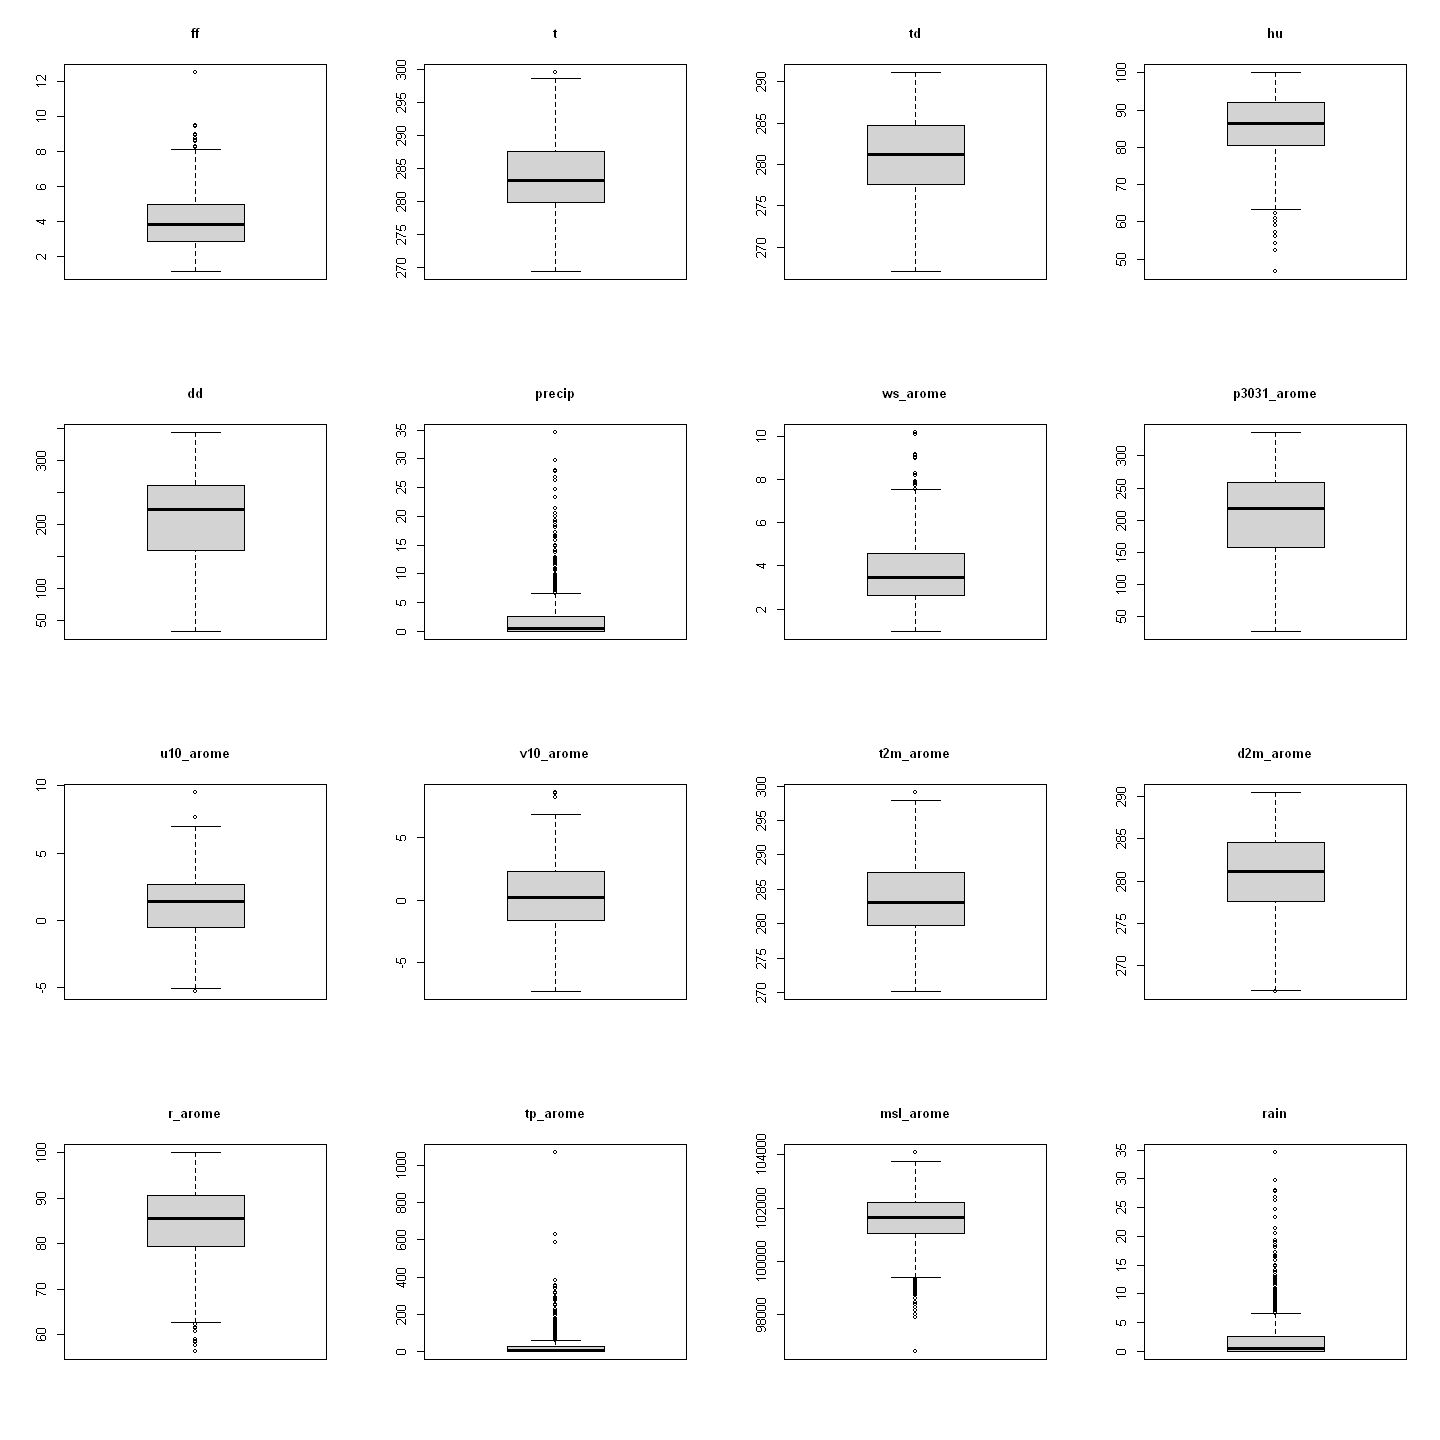

In [10]:
### Boxplots sur les variables pas encore modifi√©es (pour faciliter l'interpr√©tation)
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(4,4))
for (i in 2:17){
    boxplot(meteo[,names(meteo)[i]], main = names(meteo)[i],cex.main = 1)
    }

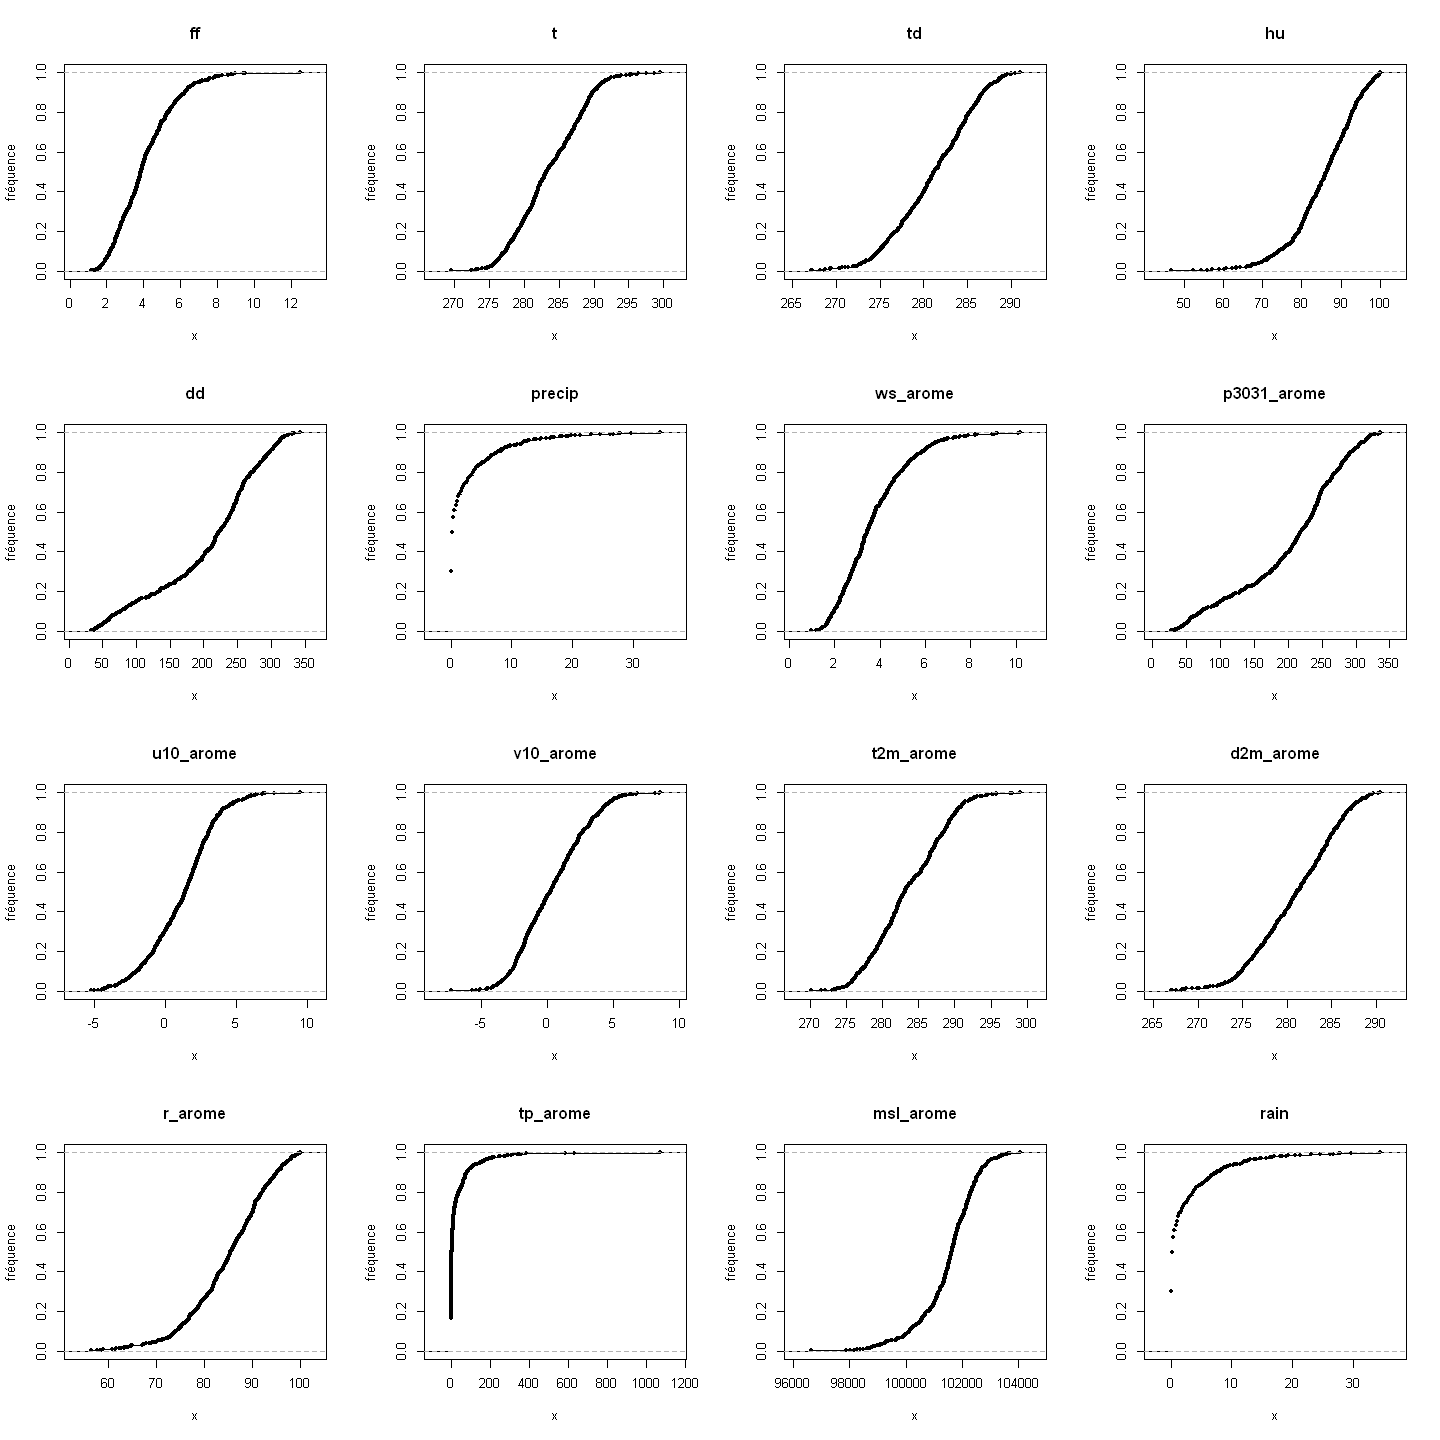

In [11]:
### Fonctions de r√©partition
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(4,4))
for (i in 2:17){
    plot.ecdf(x=meteo[,names(meteo)[i]],main=names(meteo)[i],ylab="fr√©quence")
    }

### Analyse unidimensionelle des variables d'entr√©e :

 <FONT COLOR="Blue"> 
Au vu des graphiques pr√©c√©dents, on √©tabli une analyse unidimensionnelle pour chacune des variables. 

**Les variables relatives √† la vitesse du vent :**

- **ff** : vitesse du vent le jour J (en $m.s^{-1}$) : la vitesse du vent ressemble √† une distribution gaussienne, environ 175 individus ont une valeur de ff autour de la moyenne qui est de $4 m.s^{-1}$. L‚Äô√©tendue et l‚Äô√©cart interquartiles sont assez faibles. On observe quelques outliers dans les valeurs hautes. La force du vent est donc en g√©n√©ral assez constante et basse sauf pour quelques dates o√π elle est plus importante. 

- **ws_arome** : vitesse du vent pr√©dite pour le lendemain (en $m.s^{-1}$) : Globalement on peut faire les m√™mes observations que sur *ff*, √† la diff√©rence que ws_arome prend des valeurs un peu plus basses en terme de moyenne mais aussi de valeurs extr√™mes (son maximum est par exemple de $10 m.s^{-1}$ contre $12 m.s^{-1}$ pour *ff*). On peut se poser la question de si le mod√®le AROME a tendence √† sous-estimer la force du vent mais dans l'ensemble la pr√©diction semble correcte. 

**Les variables relatives aux pr√©cipitations :**
- **precip** : quantit√© totale des pr√©cipitations le jour J ($kg.m^{‚àí2}$) : En moyenne les pr√©cipitations sont tr√®s faibles, la m√©diane des observations est √† $0.4 kg.m^{‚àí2}$. La distribution a une forme exponentielle. Elle est fortement impact√©e par des valeurs extr√™mes, il y a un nombre important d'outliers et le maximum de pr√©cipitations est de  $34.5 kg.m^{‚àí2}$

- **tp_arome**: quantit√© totale de pr√©cipitations pr√©dite pour le lendemain($kg.m^{‚àí2}$) : En comparaison avec *precip*, l'√©tendue et l'√©cart interquartile sont plus ress√©r√©s. Il y a √©galement beaucoup d'outliers et on observe des valeurs extr√™mes (maximum √† $1069 kg.m^{‚àí2}$ qui semblent aberrantes. Le mod√®le AROME semble avoir du mal √† fournir des pr√©dictions correctes en cas de fortes pr√©cipitations. 

**Les variables relatives √† la temp√©rature et au point de ros√©e :**
- **t** et **t2m_arome** :temp√©rature le jour J et pr√©dite pour le jour suivant (en Kelvin K): Ces deux variables ont une distribution tr√®s similaire, qui ressemble √† une gaussienne, sans valeurs extr√™mes avec une moyenne de 283 K. Dans l'ensemble la donn√©e de temp√©rature ne varie donc pas beaucoup. 

- **td** et **d2m_arome** : point de ros√©e le jour J et pr√©dite pour le jour suivant (en K) : M√™mes observations que pour *t* et *t2m_arome*

**Les variables relatives √† la direction du vent :**
- **dd** et **p3031_arome**: direction du vent le jour J et pr√©dite pour le jour suivant(en degr√©s) : Ces deux variables ont une distribution tr√®s similaire qui ressemble √† une gaussienne avec une moyenne (218 degr√©s) et une m√©diane (203 degr√©s) d√©cal√©es vers les valeurs hautes. L'√©tendue est tr√®s importante et il n'y a pas d'outlier. La direction du vent change beaucoup d'un jour sur l'autre mais le mod√®le AROME en fournit quand m√™me une bonne pr√©diction.


- **u10_arome** et **vu10_arome**: composantes U du vent (d'Ouest en Est) et V (du Sud au Nord), prise √† 10m de hauteur et pr√©dites pour le jour suivant (en $m.s^{-1}$): Sur ces deux variables la distribution ressemble √† une gaussienne, l'√©tendue est faible. Les composantes U et V restent relativement constantes. 

**Les variables relatives √† l'humidit√© :**
- **hu** et **r_arome** : humidit√© le jour J et pr√©dite pour le jour suivant (en %) : La distribution a une forme de gaussienne avec la moyenne (de 85%) d√©cal√©e vers les grandes valeurs et une queue assez importante qui s'√©tend sur les faibles valeurs (minimum √† 50%). L'√©tendue est importante, on a donc une forte variation de l'humidit√© au cours de l'ann√©e. La pr√©diction fournit par AROME semble tr√®s correcte. 

**La variable relative √† la pression atmosph√©rique :**

- **msl_arome**: pression atmosph√©rique (en Pa) : La distribution a une forme de gaussienne tr√®s bien centr√©e. Il y a beaucoup d'outliers sur les valeurs basses, ces valeurs sont aberrantes au vu de la r√©gularit√© du reste de la distribution.</font>

In [12]:
# Fonction permettant l'affichage des pourcentages dans les pie charts
text_pie = function(vector,labels=c(),cex=1) {
    vector = vector/sum(vector)*2*pi; temp = c()
    j = 0; l = 0
    for (i in 1:length(vector)) {
    k = vector[i]/2; j = j+l+k; l = k
    text(cos(j)/2,sin(j)/2,paste(labels[i],"%"),cex = 1)}
    vector = temp 
}

In [13]:
summary(meteo[,"rain_class"])[1]/nrow(meteo)

high_rain 
0.2732558

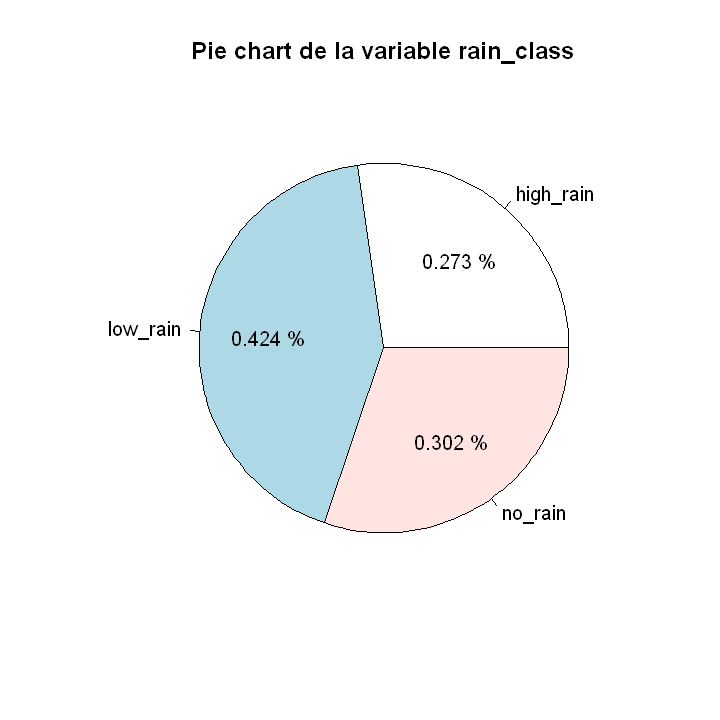

In [14]:
options(repr.plot.width = 6, repr.plot.height = 6)
n = nrow(meteo)
percent_class = round(summary(meteo[,"rain_class"])/nrow(meteo),3)
pie(table(meteo[,"rain_class"]),main = "Pie chart de la variable rain_class")
text_pie(percent_class, strsplit(toString(percent_class), ", ")[[1]], cex=0.9)

### Analyse unidimensionelle des variables de sortie :
- <FONT COLOR = "blue"> **rain** : quantit√© totale de pr√©cipitation le jour suivant $kg.m^{‚àí2}$ : La distribution ressemble a une forme d'exponentielle d√©croissante. La m√©diane (de $0.4 kg.m^{‚àí2}$) et la moyenne (de $2.3 kg.m^{‚àí2}$ sont tr√®s basses et l'√©tendue est tr√®s faible. Mais on observe un tr√®s grand nombre d'outliers. On peut remettre en question l'efficacit√© du mod√®le AROME pour pr√©dire la variable rain_mod lorsque la quantit√© de pluie est importante. 

- <FONT COLOR = "blue"> **rain_class**: cat√©gorie de pr√©cipitations : no_rain (si rain=0), low_rain (si 0<rain<2), high_rain (si rain>2). Chaque modalit√© repr√©sente environ un tier des observations. Au cours de l'ann√©e on a donc √† peu pr√®s √† parts √©gales des pluies fortes, moyennes et nulles. 

### Transformation des donn√©es : 
Au vue des observations pr√©c√©dentes, des transformations sont propos√©es pour rendre certaines distributions plus sym√©triques et ainsi plus "gaussiennes". C'est n√©cessaire pour certaines m√©thodes √† venir de mod√©lisation (lin√©aires), par pour toutes (arbres). Ci-dessous le code des transformations et le r√©sultat obtenu : 

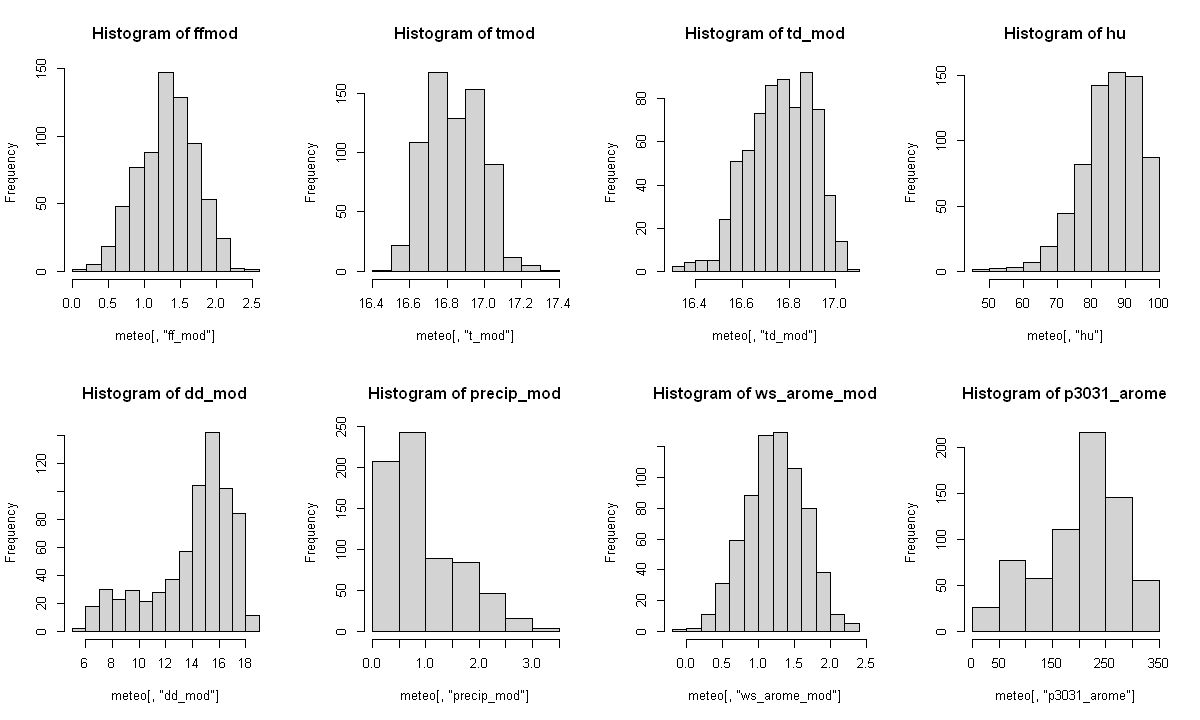

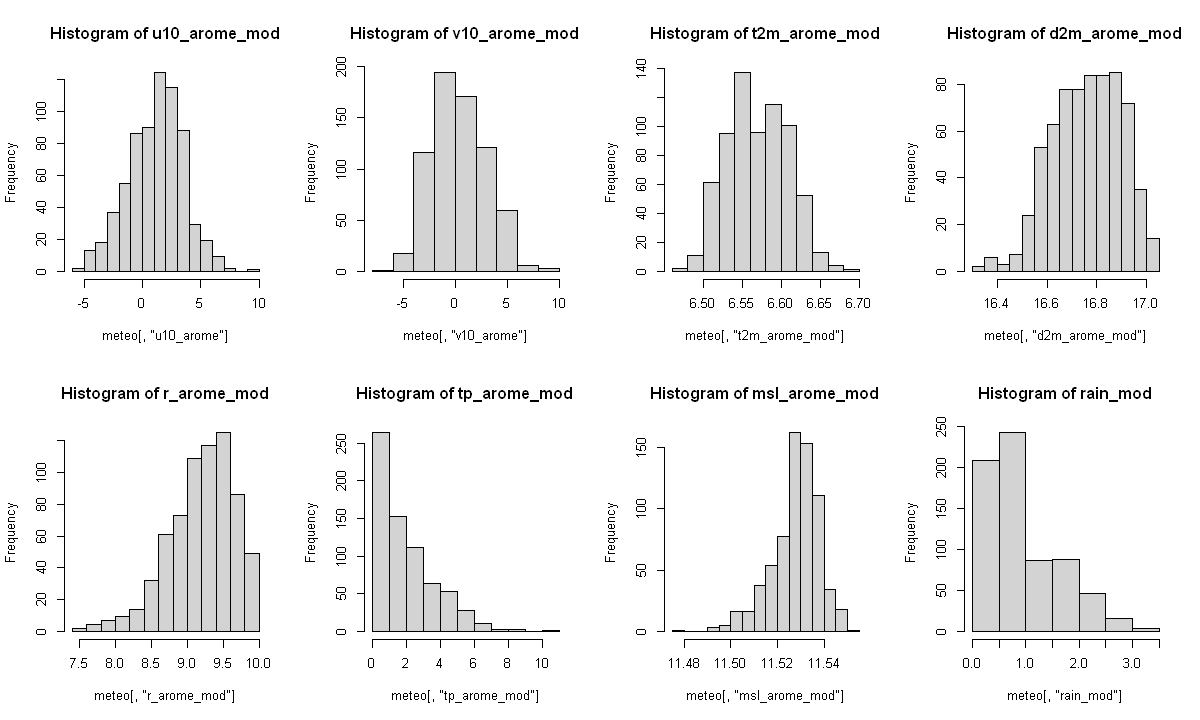

In [15]:
meteo[, "ff_mod"] <- log(meteo[, "ff"]) 
meteo[, "t_mod"] <- sqrt(meteo[, "t"])
meteo[, "td_mod"] <- sqrt(meteo[, "td"]) 
meteo[, "dd_mod"] <- sqrt(meteo[, "dd"])
meteo[, "precip_mod"] <- (meteo[, "precip"])**(1/3) 
meteo[, "ws_arome_mod"] <- log(meteo[, "ws_arome"])
meteo[, "p3031_arome_mod"] <- sqrt(meteo[, "p3031_arome"])
meteo[, "r_arome_mod"] <- sqrt(meteo[, "r_arome"])
meteo[, "tp_arome_mod"] <- (meteo[, "tp_arome"])**(1/3)
meteo[, "msl_arome_mod"] <- log(meteo[, "msl_arome"])
meteo[, "rain_mod"] <- (meteo[, "rain"])**(1/3) 
meteo[, "t2m_arome_mod"] <- (meteo[, "t2m_arome"])**(1/3)
meteo[, "d2m_arome_mod"] <- sqrt(meteo[, "d2m_arome"])
# pas de modif sur hu, u10_arome, v10_arome
options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow = c(2,4))
hist(meteo[, "ff_mod"], main = paste("Histogram of ffmod"))
hist(meteo[, "t_mod"], main = paste("Histogram of tmod"))
hist(meteo[, "td_mod"], main = paste("Histogram of td_mod"))
hist(meteo[, "hu"], main = paste("Histogram of hu"))
hist(meteo[, "dd_mod"], main = paste("Histogram of dd_mod"))
hist(meteo[, "precip_mod"], main = paste("Histogram of precip_mod"))
hist(meteo[, "ws_arome_mod"], main = paste("Histogram of ws_arome_mod"))
hist(meteo[, "p3031_arome"], main = paste("Histogram of p3031_arome"))

par(mfrow = c(2,4))
hist(meteo[, "u10_arome"], main = paste("Histogram of u10_arome_mod"))
hist(meteo[, "v10_arome"], main = paste("Histogram of v10_arome_mod"))
hist(meteo[, "t2m_arome_mod"], main = paste("Histogram of t2m_arome_mod"))
hist(meteo[, "d2m_arome_mod"], main = paste("Histogram of d2m_arome_mod"))
hist(meteo[, "r_arome_mod"], main = paste("Histogram of r_arome_mod"))
hist(meteo[, "tp_arome_mod"], main = paste("Histogram of tp_arome_mod"))
hist(meteo[, "msl_arome_mod"], main = paste("Histogram of msl_arome_mod"))
hist(meteo[, "rain_mod"], main = paste("Histogram of rain_mod"))

#meteo[, "LNO"] <- log(meteo[, "NO"])
#on remplace les colonnes de LNO, LNO2, SRMH20 ==> transformation racinaire et logarithmique des donn√©es 

In [16]:
ordre = c("date","ff_mod","t_mod","td_mod","hu","dd_mod","precip_mod","ws_arome_mod","p3031_arome_mod",
        "u10_arome","v10_arome","t2m_arome_mod","d2m_arome_mod","r_arome_mod",
        "tp_arome_mod","msl_arome_mod","rain_mod", "rain_class")

In [17]:
meteo_mod<-meteo[,ordre] #r√©arrange les donn√©es dans l'ordre initial
ncol(meteo_mod)
summary(meteo_mod)

[1] 18

       date         ff_mod          t_mod           td_mod     
 juillet : 62   Min.   :0.147   Min.   :16.42   Min.   :16.34  
 mars    : 62   1st Qu.:1.054   1st Qu.:16.73   1st Qu.:16.66  
 janvier : 61   Median :1.350   Median :16.83   Median :16.77  
 juin    : 59   Mean   :1.331   Mean   :16.84   Mean   :16.76  
 novembre: 59   3rd Qu.:1.604   3rd Qu.:16.96   3rd Qu.:16.87  
 mai     : 58   Max.   :2.526   Max.   :17.31   Max.   :17.06  
 (Other) :327                                                  
       hu             dd_mod         precip_mod      ws_arome_mod     
 Min.   : 46.75   Min.   : 5.737   Min.   :0.0000   Min.   :-0.03309  
 1st Qu.: 80.53   1st Qu.:12.599   1st Qu.:0.0000   1st Qu.: 0.96394  
 Median : 86.40   Median :14.927   Median :0.7368   Median : 1.23641  
 Mean   : 85.56   Mean   :14.044   Mean   :0.8420   Mean   : 1.23322  
 3rd Qu.: 92.06   3rd Qu.:16.145   3rd Qu.:1.3751   3rd Qu.: 1.52228  
 Max.   :100.00   Max.   :18.521   Max.   :3.2554   Max.   : 2

## 3. Analyse Bidimensionnelle

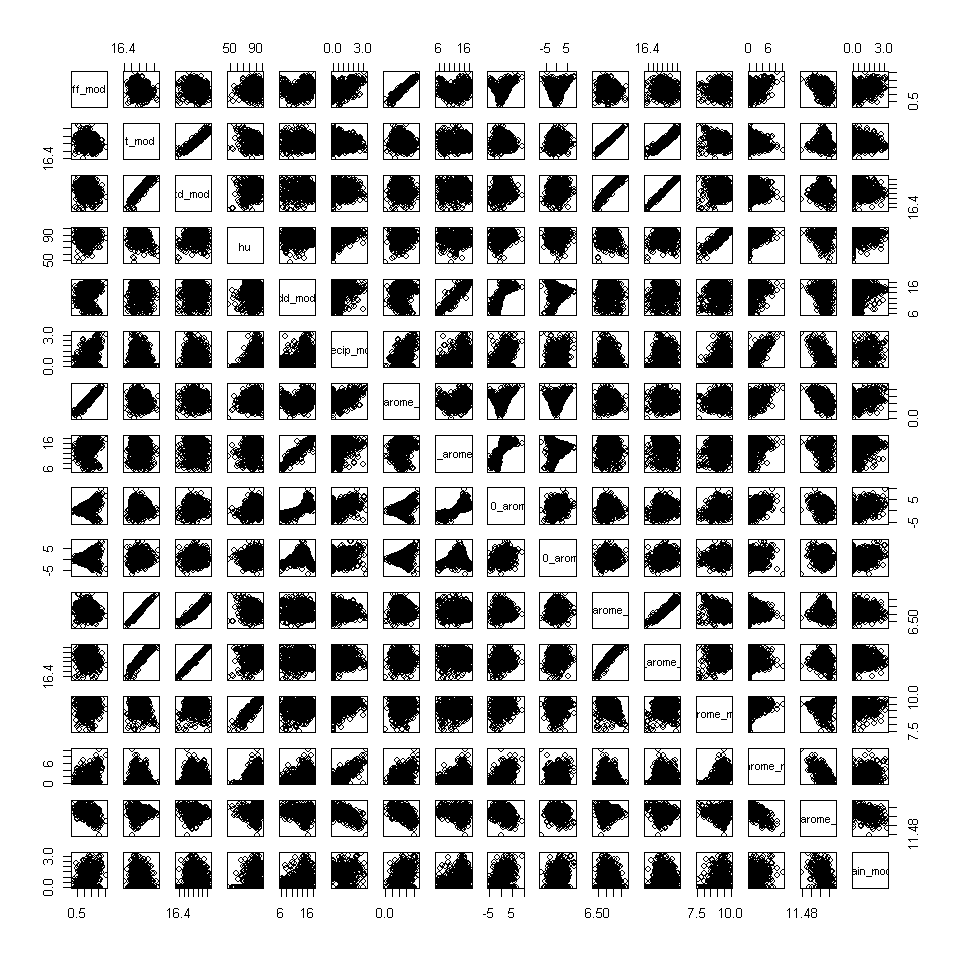

In [18]:
options(repr.plot.width = 8, repr.plot.height = 8)
pairs(meteo_mod[, c(2:17)])

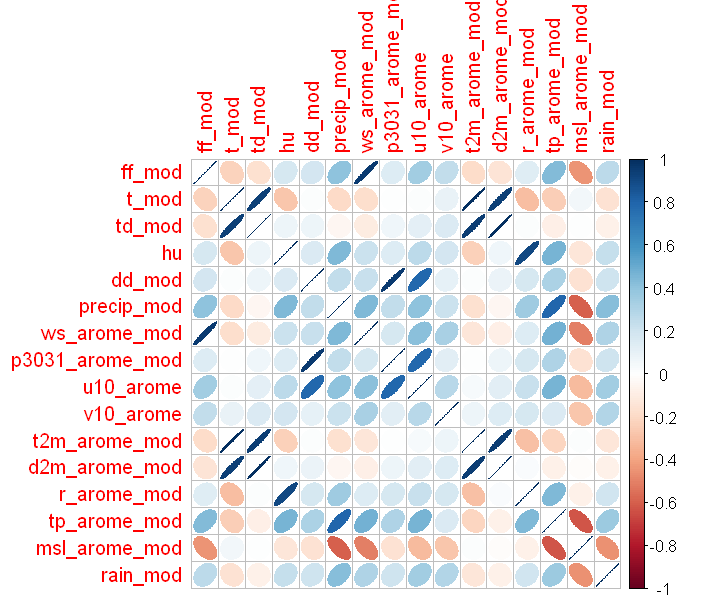

In [19]:
options(repr.plot.width = 6, repr.plot.height = 5)
corr=cor(meteo_mod[, c(2:17)]) #prendre que les variables quantitatives !!! 
corrplot(corr, method="ellipse")
options(repr.plot.width = 8, repr.plot.height = 8)
#plus le nuage de points est dissip√© moins il y a de corr√©lation
#but de l'ACP : √©liminer les var redondantes 

**Q** Que dire sur les relations des varibles 2 √† 2 ?
Au vu des deux graphiques pr√©c√©dents, les groupes de variables corr√©l√©es sont : 
<FONT COLOR = "blue"> 
- la temp√©rature au jour j et le jour suivant (t_mod et t2m_arome_mod), le point de ros√©e au jour j et le jour suivant (td_mod et d2m_arome_mod)
- la vitesse du vent le jour j (ff_mod) et celle du jour suivant (ws_arome_mod)
- la direction du vent au jour J (dd_mod) et le jour suivant (p3031_arome_mod),les composantes du vent d'ouest le jour suivant (u10_arome)
- l'humidit√© au jour J (hu) et au jour suivant (r_arome)
- les pr√©cipitations au jour J (precip_mod), et la quantit√© totale de pr√©cipitations pr√©vues pour le jour suivant (tp_arome)

## 4. Analyse en Composantes Principales

Les commandes suivantes permettent de r√©aliser une [analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf) sur les seules variables quantitatives, on retire donc la variable rain_mod qui est √† expliquer

In [20]:
#Pour r√©aliser l'ACP on enl√®ve la variable √† expliquer : rain_mod 
#mais il reste la variable √† expliquer rain_class qui est qualitative
meteo_acp <- meteo_mod[,-17] 

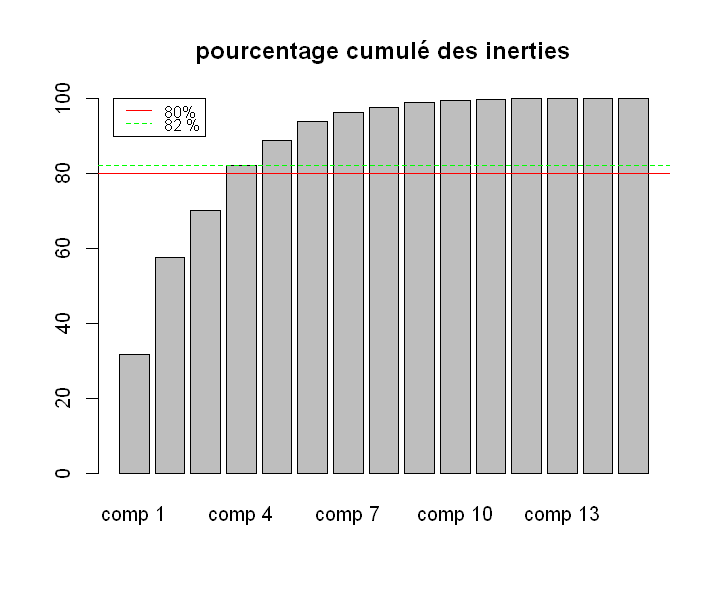

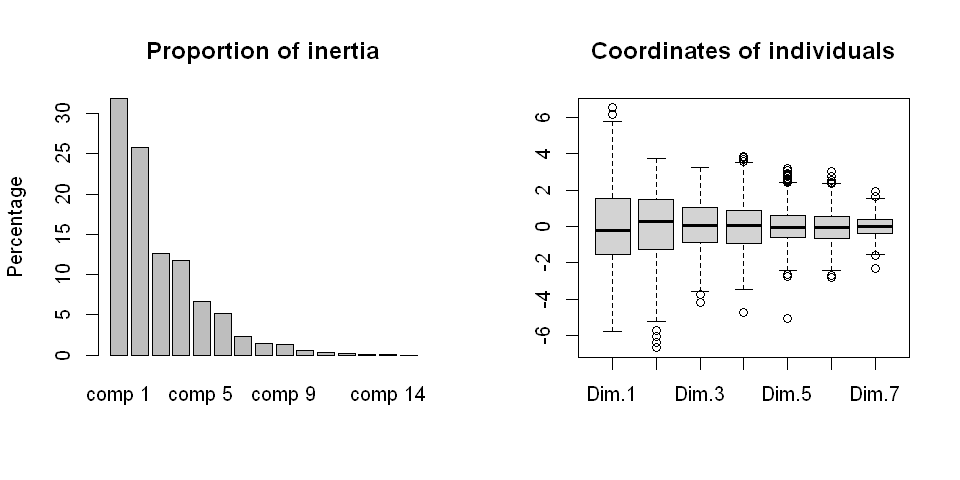

In [21]:
# ACP r√©duite
# D√©croissance des valeurs propres
#acp <- PCA(meteo_mod[,c(2:16)], scale.unit = TRUE, ncp=7, graph = FALSE, quali.sup=c(1))
acp <- PCA(meteo_acp, scale.unit = TRUE, ncp=7, graph = FALSE, quali.sup=c(1,17)) 
#on prend toutes les variables quantitatives sauf celles √† expliquer : ici rain_mod.
#ncp : 7 dimension kept 
#quali.sup : indique les indices des var suppl√©mentaires qualitatives (1 : date et 17 : rain_class)
#quanti.sup sera juste visualis√©e mais pas utilis√©e dans l'acp pour la construction des axes

#Pour expliquer 80% de la variance on va garder 5 composantes. 
options(repr.plot.width = 6, repr.plot.height = 5)
barplot(acp$eig[,"cumulative percentage of variance"],main="pourcentage cumul√© des inerties")
abline(80, 0, col="red")
abline(acp$eig[,"cumulative percentage of variance"][4], 0, col="green",lty=2)
legend(x=0,y=100,legend=c("80%", paste(round(acp$eig[,"cumulative percentage of variance"][4]),"%")),
       col=c("red", "green"), lty=1:2, cex=0.8)

options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1, 2))
barplot(acp$eig[, 2], ylab = "Percentage", main = "Proportion of inertia")
boxplot(acp$ind$coord, main = "Coordinates of individuals")


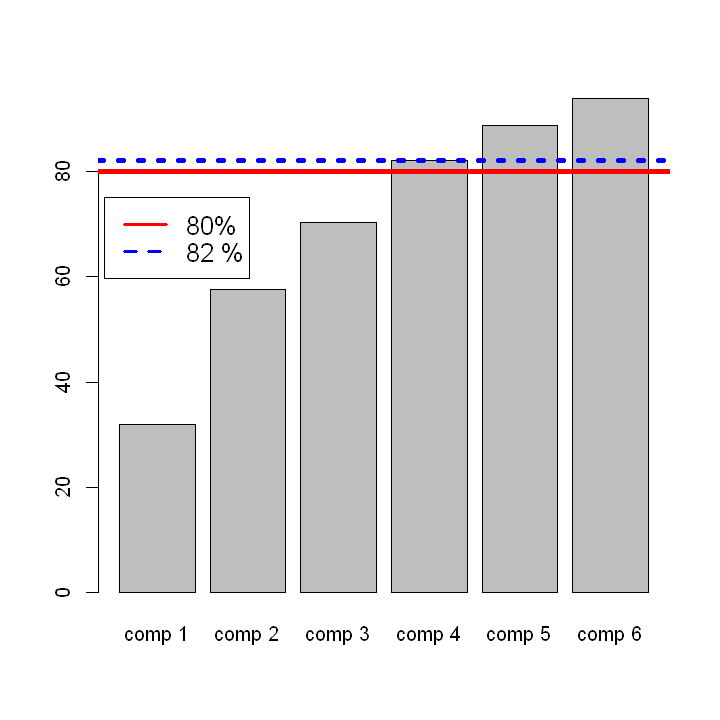

In [22]:
options(repr.plot.width = 6, repr.plot.height = 6)
barplot(acp$eig[,"cumulative percentage of variance"][1:6],main="")
abline(80, 0, col="red",lwd = 4)
abline(acp$eig[,"cumulative percentage of variance"][4], 0, col="blue",lty=3,lwd = 4)
legend(x=0,y=75,legend=c("80%", paste(round(acp$eig[,"cumulative percentage of variance"][4]),"%")),
       col=c("red", "blue"), lty=1:3, cex=1.3,lwd=3)

<FONT COLOR = "blue"> **Analyse :** 
L'analyse des graphiques sugg√®re de garder les 4 premi√®res composantes de l'ACP pour r√©duire la dimension sans perdre une quantit√© trop imporante d'information. 
En effet, sur le graphique des pourcentages cumul√©es d'intertie, on voit qu'avec 4 composantes on explique 83% de l'inertie. 
On peut aussi observer sur les boxplots que la variance est beaucoup plus importante sur les 4 premiers boxplots que sur les suivants. 

### <FONT COLOR="Red">Du coup, est-ce qu'il faut red√©finir l'ACP avec ncp=4 ?</font>
acp <- PCA(meteo_acp, scale.unit = TRUE, ncp=4, graph = FALSE, quali.sup=c(1,17)) 

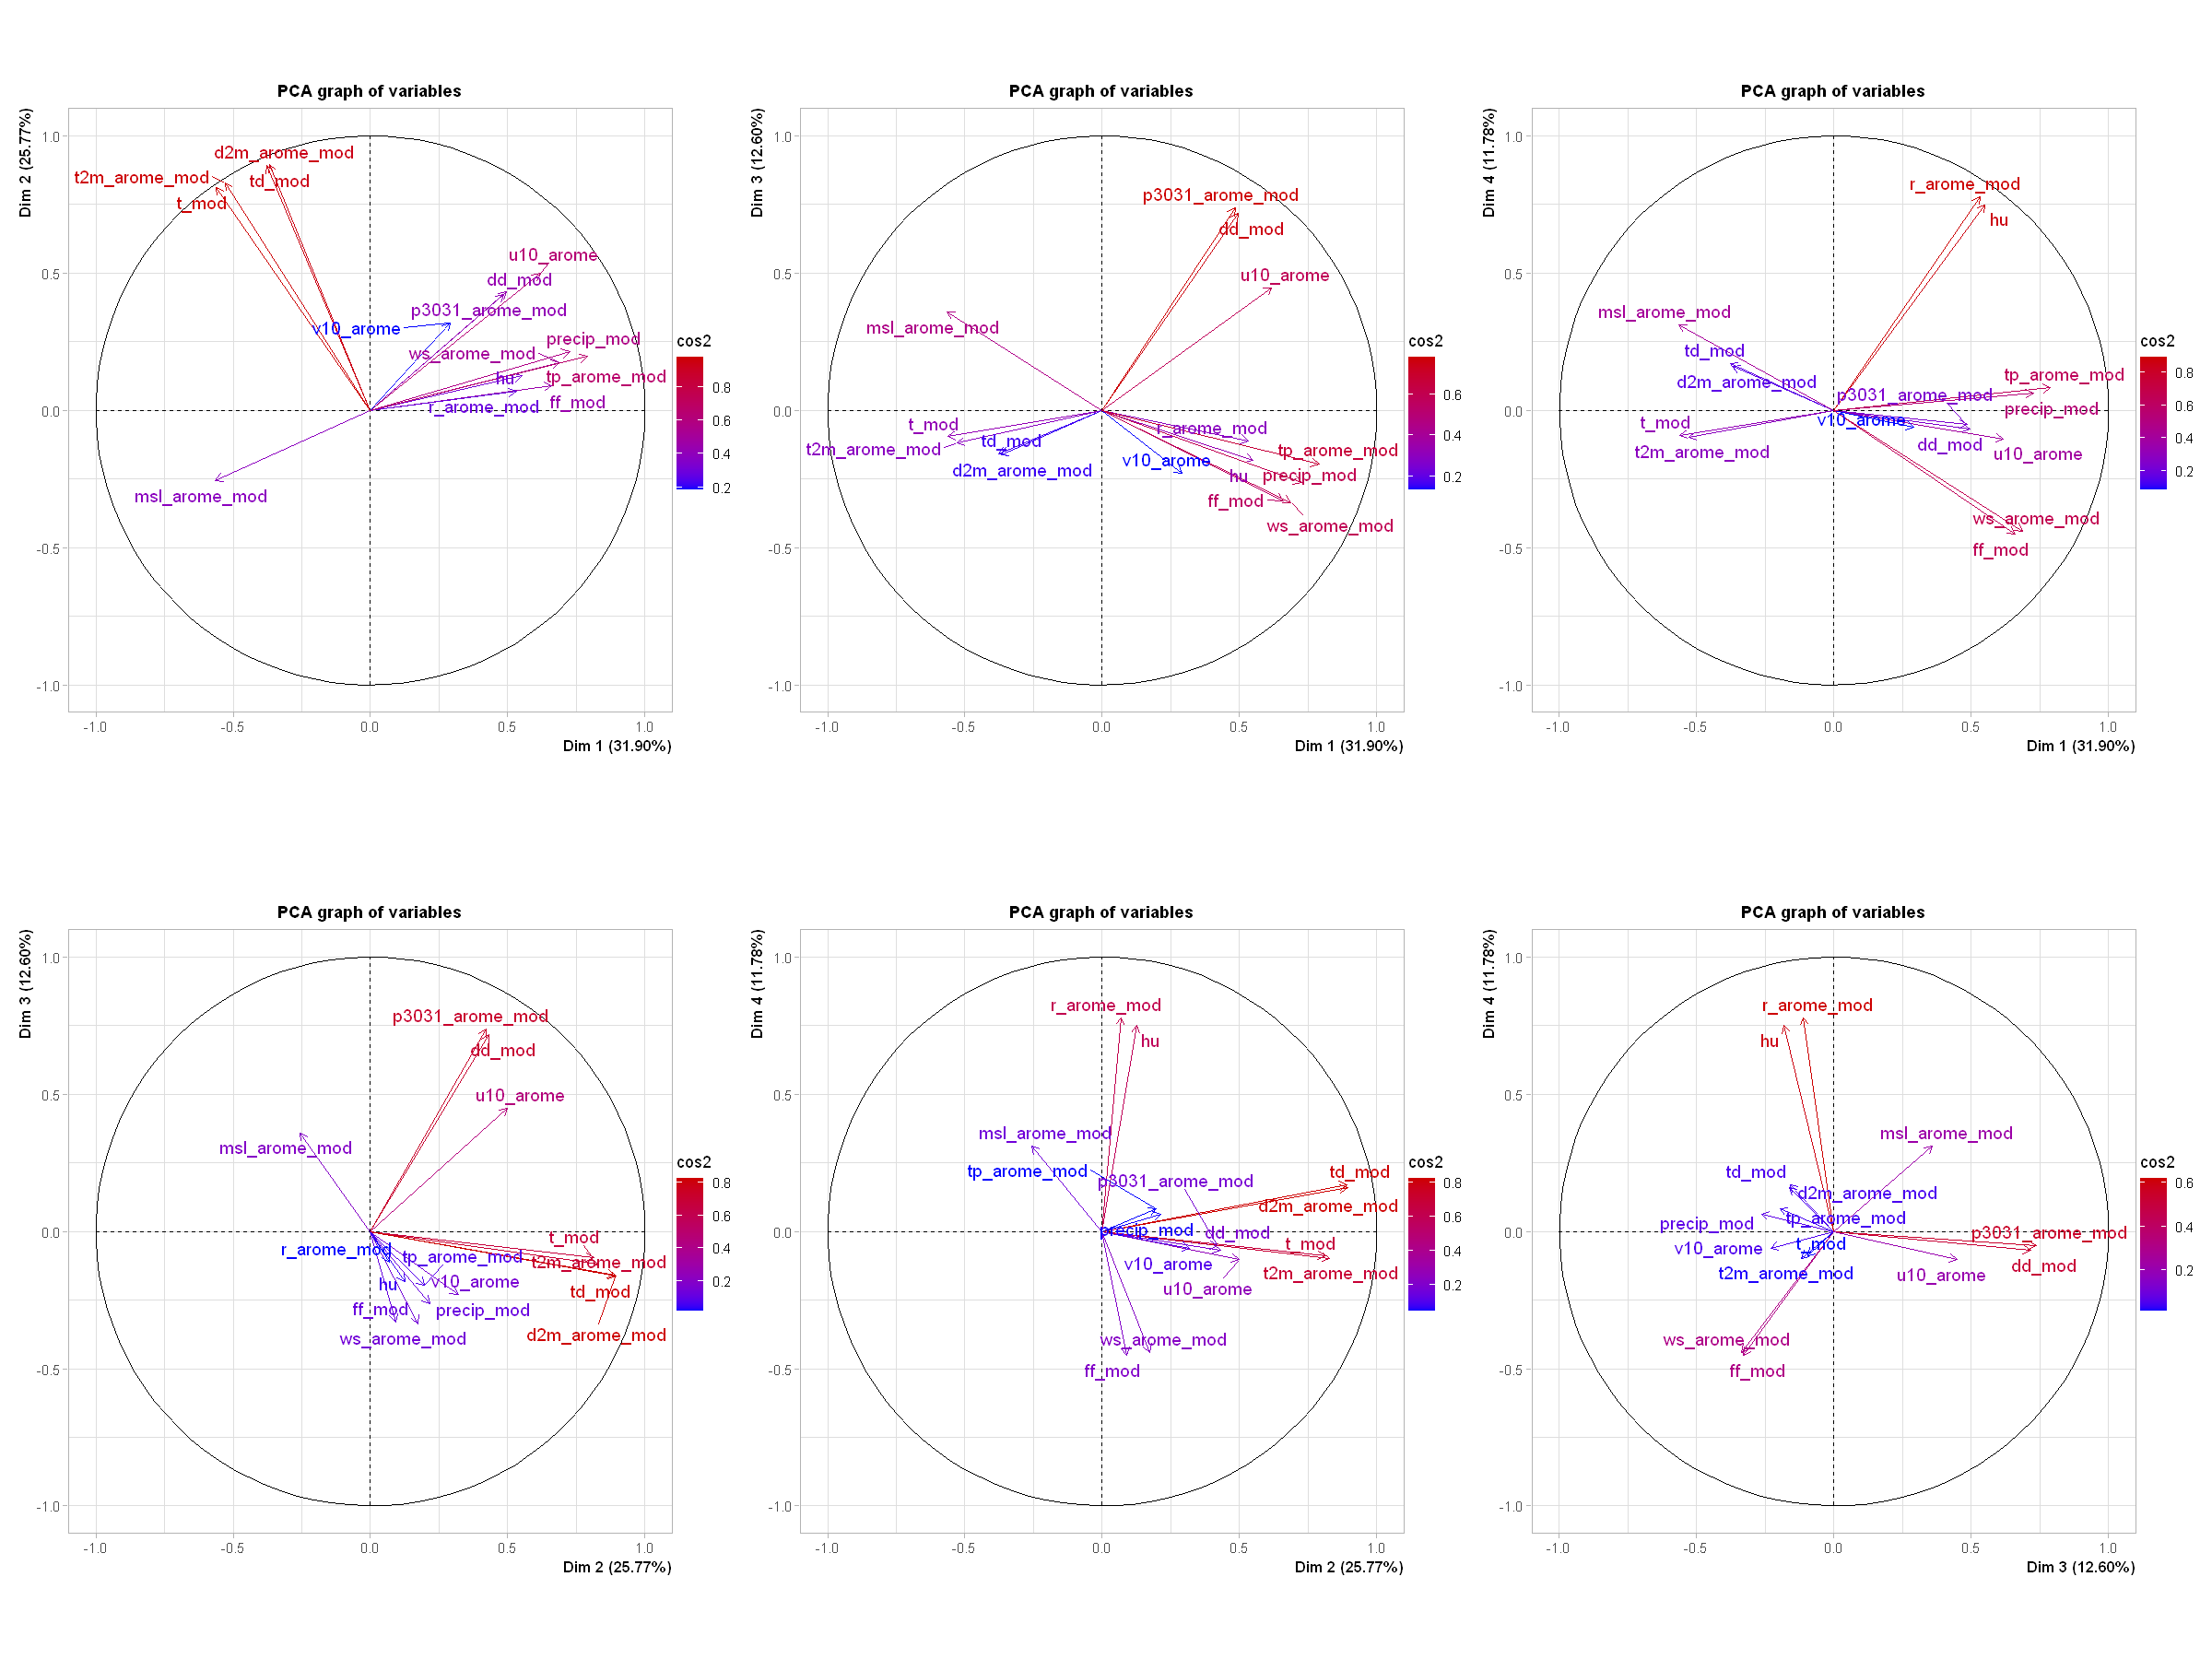

In [23]:
options(repr.plot.width = 20, repr.plot.height = 15)
c1.2 <- plot(acp, choix = "varcor", axes=c(1,2), habillage="cos2")
c1.3 <- plot(acp, choix = "varcor", axes=c(1,3), habillage="cos2")
c1.4 <- plot(acp, choix = "varcor", axes=c(1,4), habillage="cos2")
c2.3 <- plot(acp, choix = "varcor", axes=c(2,3), habillage="cos2")
c2.4 <- plot(acp, choix = "varcor", axes=c(2,4), habillage="cos2")
c3.4 <- plot(acp, choix = "varcor", axes=c(3,4), habillage="cos2")
# utilisation de la librairie patchwork pour le plot
(c1.2 | c1.3 | c1.4) / 
(c2.3 | c2.4 | c3.4) 

<FONT COLOR = "blue"> **Analyse :** 
Le graphe PCA des individus permet d'observer les m√™mes corr√©lations entre les variables que sur le corrplot. 

Variables bien projet√©es sur la **dimension 1** : 
- Les variables relatives √† la vitesse du vent (ff_mod, ws_arome_mod) 
- les variables relatives aux pr√©cipitations (precip_mod et tp_arome)

Variables bien projet√©es sur la **dimension 2** :
- Les variables relatives √† la temp√©rature et au point de ros√©e (t_mod, td_mod, t2m_arome_mod et d2m_arome_mod)

Variables bien projet√©es sur la **dimension 3** :
- Les variables relatives √† la direction du vent (dd_mod, p3031_arome_mod, u10_arome)

Variables bien projet√©es sur la **dimension 4** :
- Les variables relatives √† l'humidit√© (hu et r_arome)


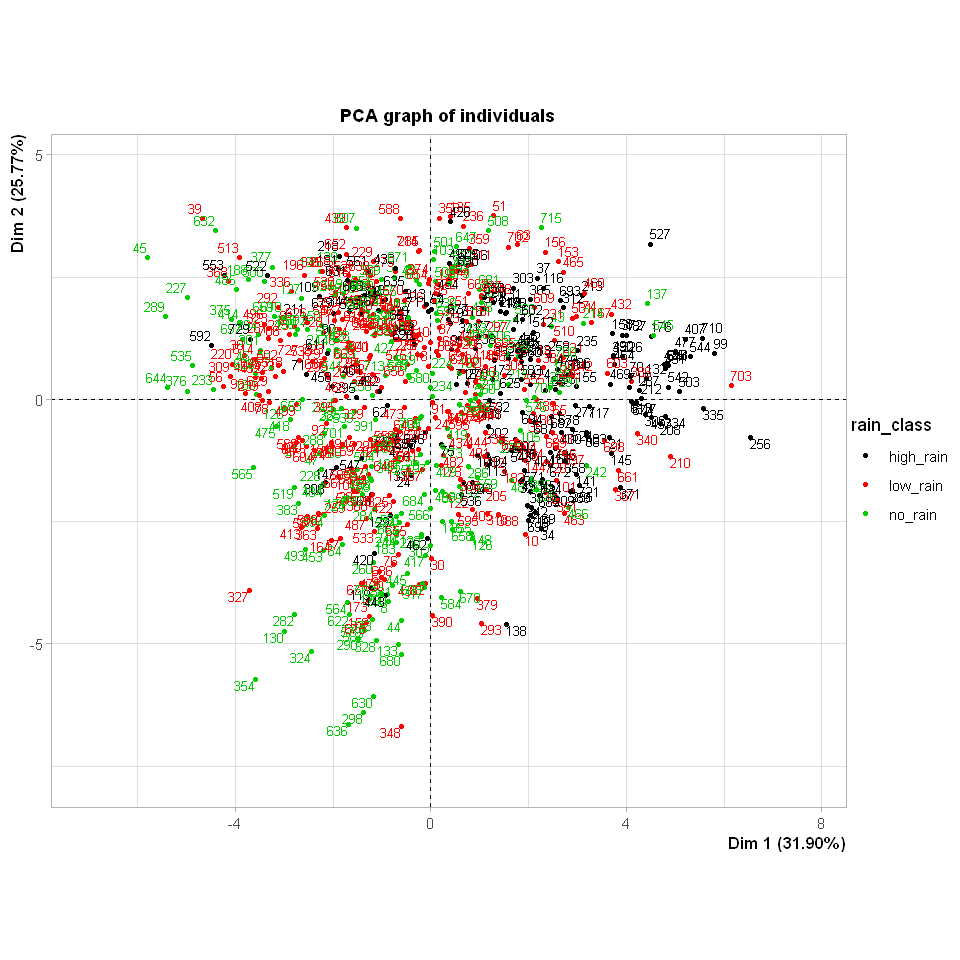

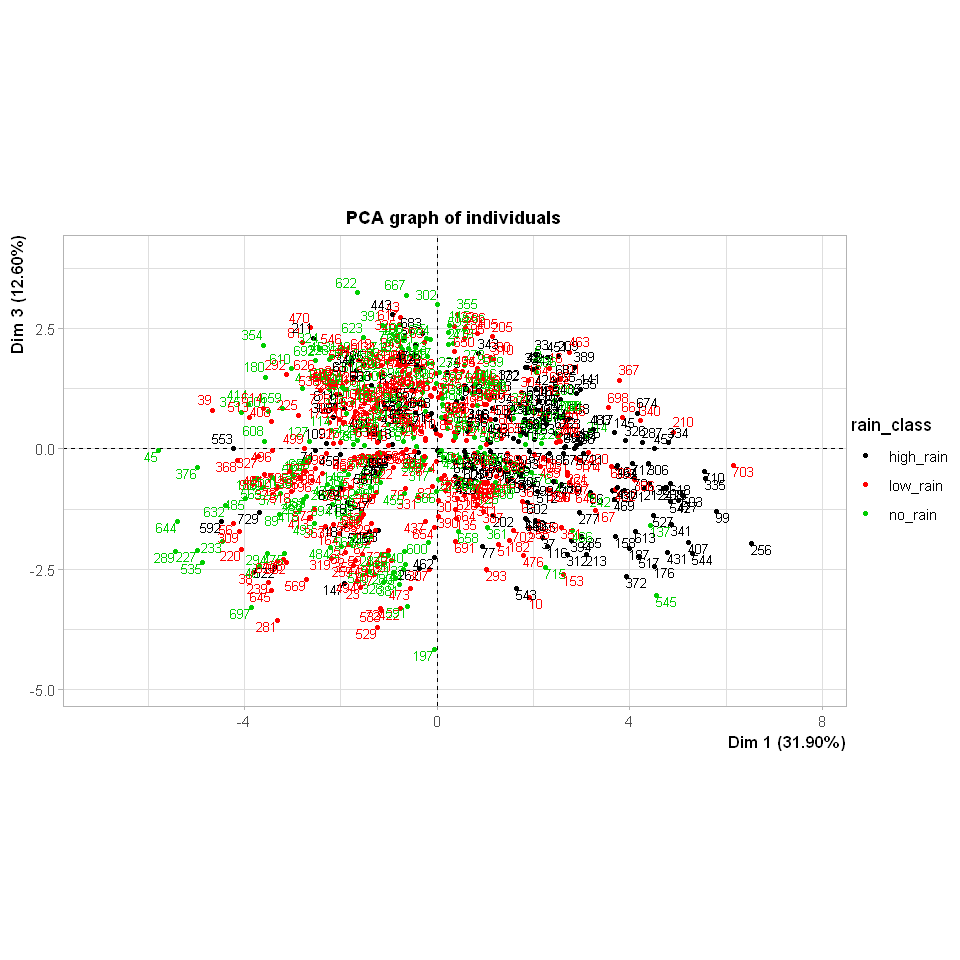

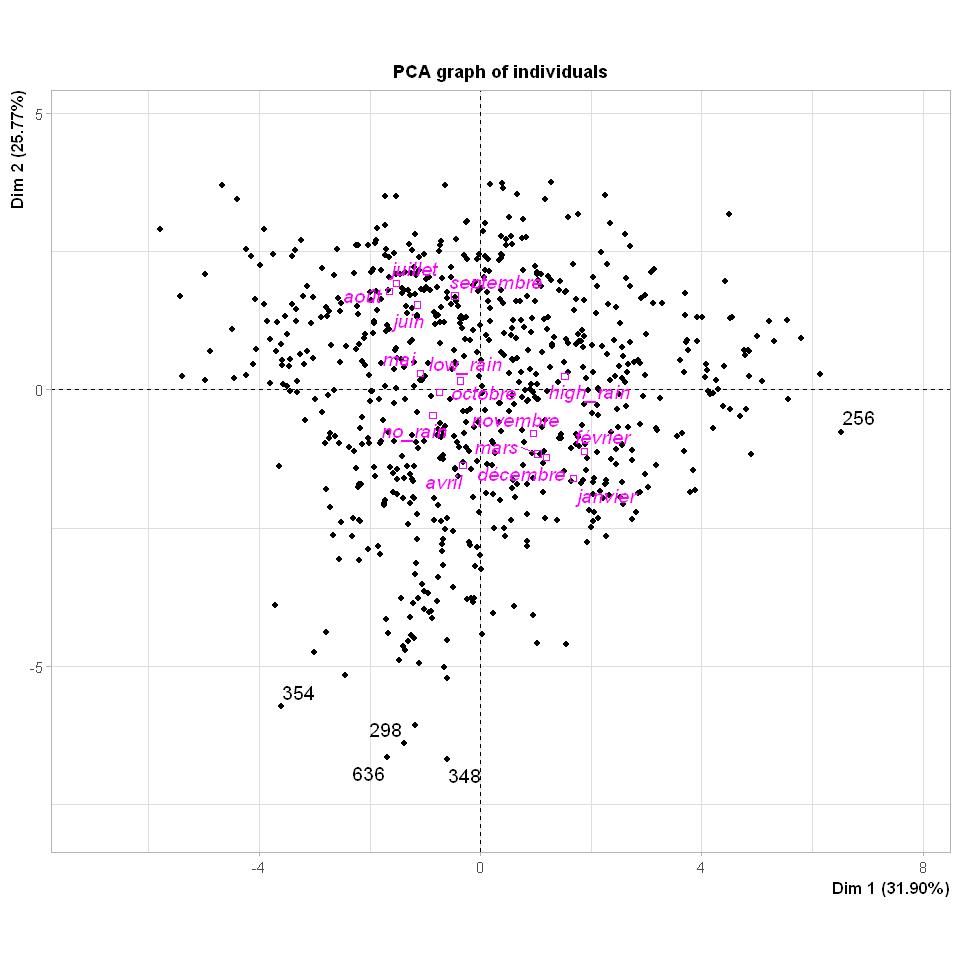

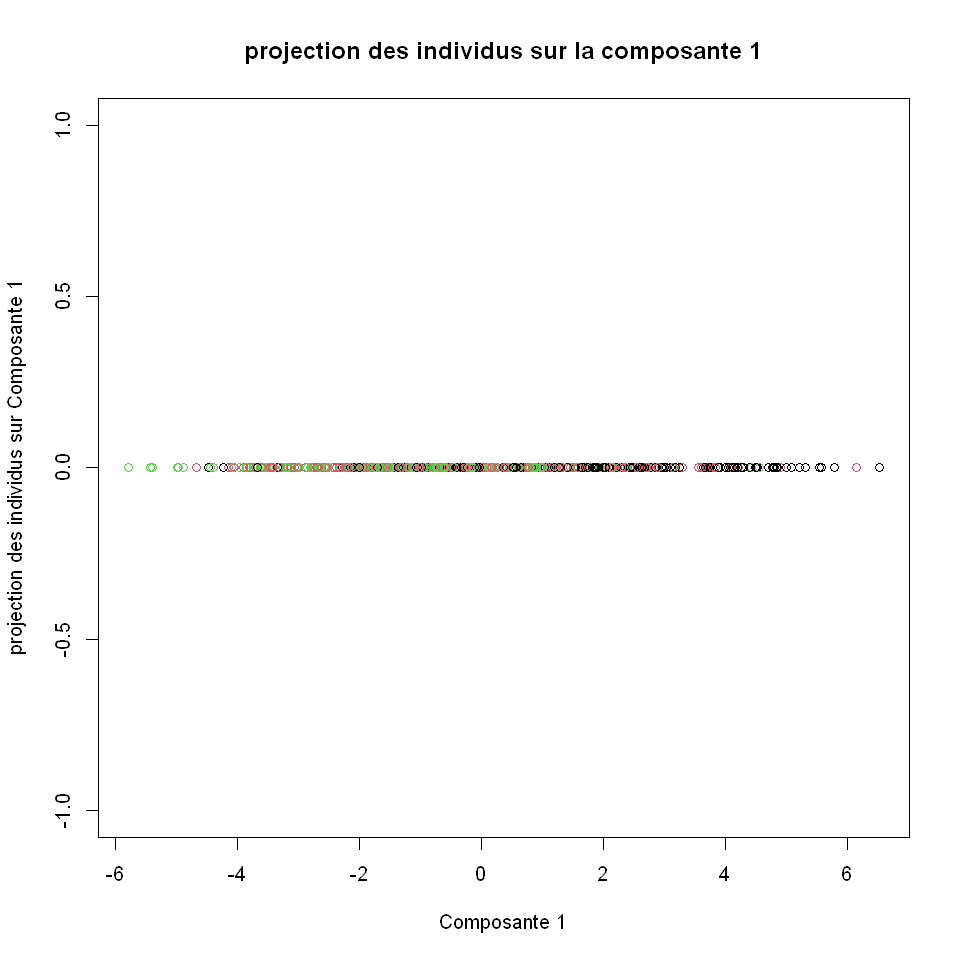

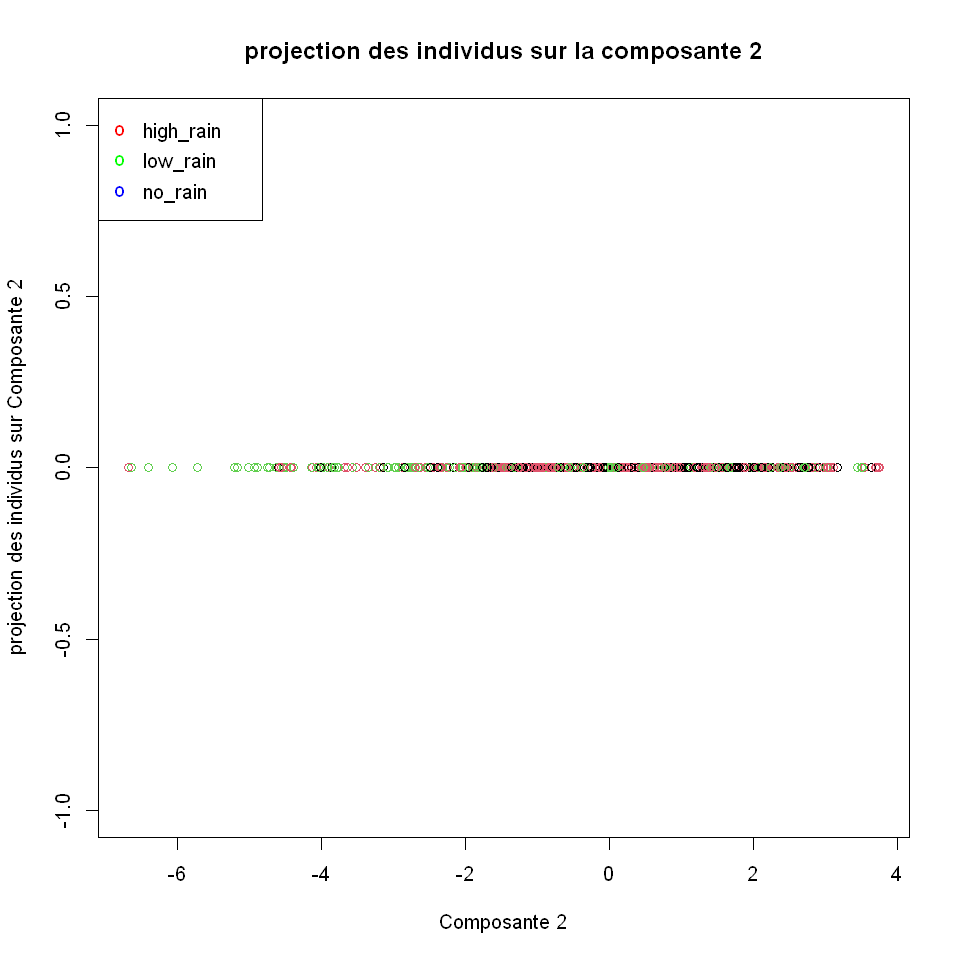

In [24]:
options(repr.plot.width = 8, repr.plot.height = 8)
mescouleurs <- rainbow(length(levels(meteo_mod$rain_class)))

### graphe des individus ----------------------------------------------------------------
plot.PCA(acp, choix="ind", invisible="quali", , main="graphe des individus", cex=0.7,
     axes=c(1,2), select="cos2 1000", unselect= 1,habillage=17)
plot.PCA(acp, choix="ind", invisible="quali", , main="graphe des individus", cex=0.7, pch = 'o',
     axes=c(1,3), select="cos2 1000", unselect= 1,habillage=17)
plot(acp, choix = "ind", select = "contrib 5", unselect = 0)

### projection des individus -------------------------------------------------------------
plot(xlab = "Composante 1", ylab = "projection des individus sur Composante 1", 
main="projection des individus sur la composante 1", legend = levels(meteo_mod$rain_class), 
     acp$ind$coord[,1], rep(0,nrow(meteo_mod)),col=meteo_mod[,18]) 

plot(xlab = "Composante 2", ylab = "projection des individus sur Composante 2", 
main="projection des individus sur la composante 2", legend = levels(meteo_mod$rain_class), 
     acp$ind$coord[,2], rep(0,nrow(meteo_mod)),col=meteo_mod[,18])



legend(x="topleft", pch = 'o',legend = levels(meteo_mod$rain_class), col=mescouleurs)

In [25]:
##analyse des outliers :
outliers = c(256,298,354,348,636)
meteo_acp[outliers,]
summary(meteo_mod)
meteo_mod[c(241,328,333,280,598),c(1,18)]

date     ff_mod    t_mod    td_mod   hu       dd_mod    precip_mod
274 f√©vrier  1.1269568 16.78857 16.74641 91.47500 14.607361 1.2164404 
317 f√©vrier  1.2926703 16.61434 16.53500 83.61250 10.340052 0.5848035 
376 juillet  0.8529959 17.06384 16.86968 67.40000  8.748809 0.0000000 
370 mars     1.8349121 16.81456 16.77682 92.11250 16.375795 0.0000000 
675 novembre 0.8962581 16.59513 16.52390 84.86667  9.920517 0.0000000 
    ws_arome_mod p3031_arome_mod u10_arome  v10_arome  t2m_arome_mod
274 1.1672042    14.214496        0.9921962  2.7952417 6.553334     
317 1.0434010    11.786565       -2.3139687  0.3440162 6.506035     
376 0.4542499     9.835388       -0.8594268 -0.9428555 6.624306     
370 1.7204747    16.007996        5.3860212  1.2362143 6.566833     
675 0.7877957     9.954418       -1.3911537  0.5045552 6.499733     
    d2m_arome_mod r_arome_mod tp_arome_mod msl_arome_mod rain_class
274 16.73802      9.594752    2.3427626    11.53697      low_rain  
317 16.53375      9.313407    0.5475393    11.53127      no_rain   
376 16.86811      8.312874    0.0000000    11.53798      no_rain   
370 16.79136      9.600444    1.8175325    11.53282      no_rain   
675 16.50061      9.159595    0.0000000    11.54488      low_rain

       date         ff_mod          t_mod           td_mod     
 juillet : 62   Min.   :0.147   Min.   :16.42   Min.   :16.34  
 mars    : 62   1st Qu.:1.054   1st Qu.:16.73   1st Qu.:16.66  
 janvier : 61   Median :1.350   Median :16.83   Median :16.77  
 juin    : 59   Mean   :1.331   Mean   :16.84   Mean   :16.76  
 novembre: 59   3rd Qu.:1.604   3rd Qu.:16.96   3rd Qu.:16.87  
 mai     : 58   Max.   :2.526   Max.   :17.31   Max.   :17.06  
 (Other) :327                                                  
       hu             dd_mod         precip_mod      ws_arome_mod     
 Min.   : 46.75   Min.   : 5.737   Min.   :0.0000   Min.   :-0.03309  
 1st Qu.: 80.53   1st Qu.:12.599   1st Qu.:0.0000   1st Qu.: 0.96394  
 Median : 86.40   Median :14.927   Median :0.7368   Median : 1.23641  
 Mean   : 85.56   Mean   :14.044   Mean   :0.8420   Mean   : 1.23322  
 3rd Qu.: 92.06   3rd Qu.:16.145   3rd Qu.:1.3751   3rd Qu.: 1.52228  
 Max.   :100.00   Max.   :18.521   Max.   :3.2554   Max.   : 2

date     rain_class
256 d√©cembre high_rain 
348 janvier  low_rain  
354 janvier  no_rain   
298 janvier  no_rain   
636 janvier  no_rain

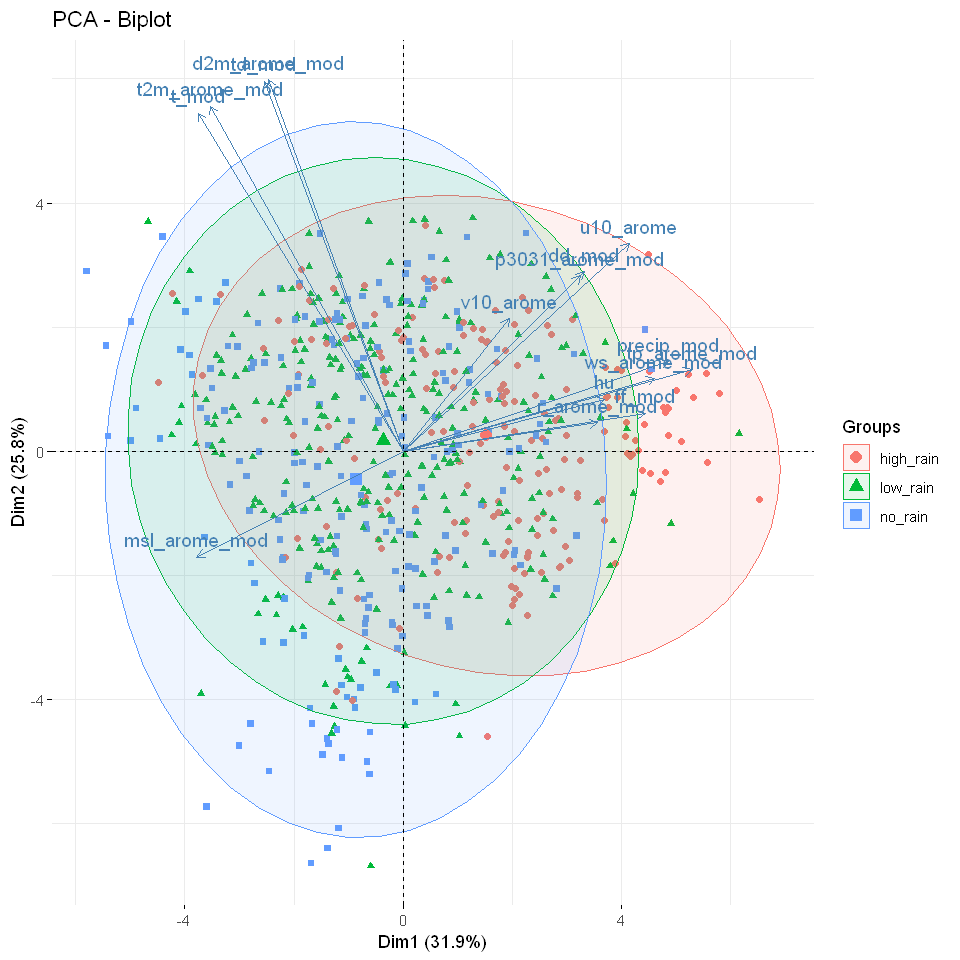

In [26]:
options(repr.plot.width = 8, repr.plot.height = 8)
fviz_pca_biplot(acp, geom.ind="point", col.ind=meteo$rain_class, addEllipses=TRUE,
legend.title="Groups", cex=0.7, axes=c(1,2)) #permet de faire le biplot(fonctionne pas dans mon jupyter...¬∞)

<FONT COLOR = "blue"> **analyse du graphe des individus** : 
- On a du mal √† distinguer une s√©paration entre les modalit√©s *high_rain*, *low_rain* et *no rain*. Il semblerait que les individus les plus √† droite sur la dimension 1 portent la modalit√© *high_rain*, mais les deux autres modalit√©s sont assez m√©lang√©es comme on peut le voir sur le dernier graphe o√π leurs ellipses se superposent. 
- Remarque sur les outliers : Les outliers 354,348 et 636 ont de tr√®s faibles valeurs de pr√©cipitations (precip_mod et tp_arome_mod), leurs valeurs sur ces variables correspondent au minimum. Cela s'observe aussi sur le premier graphique pour lequel les points les plus en bas autour de l'axe de la dimension 2 portent tous la mention "no rain". 

 [1] "u10_arome"     "v10_arome"     "ff_mod"        "t_mod"        
 [5] "td_mod"        "hu_mod"        "dd_mod"        "precip_mod"   
 [9] "ws_arome_mod"  "p3031_mod"     "r_arome_mod"   "tp_arome_mod" 
[13] "msl_arome_mod" "t2m_arome_mod" "d2m_arome_mod"


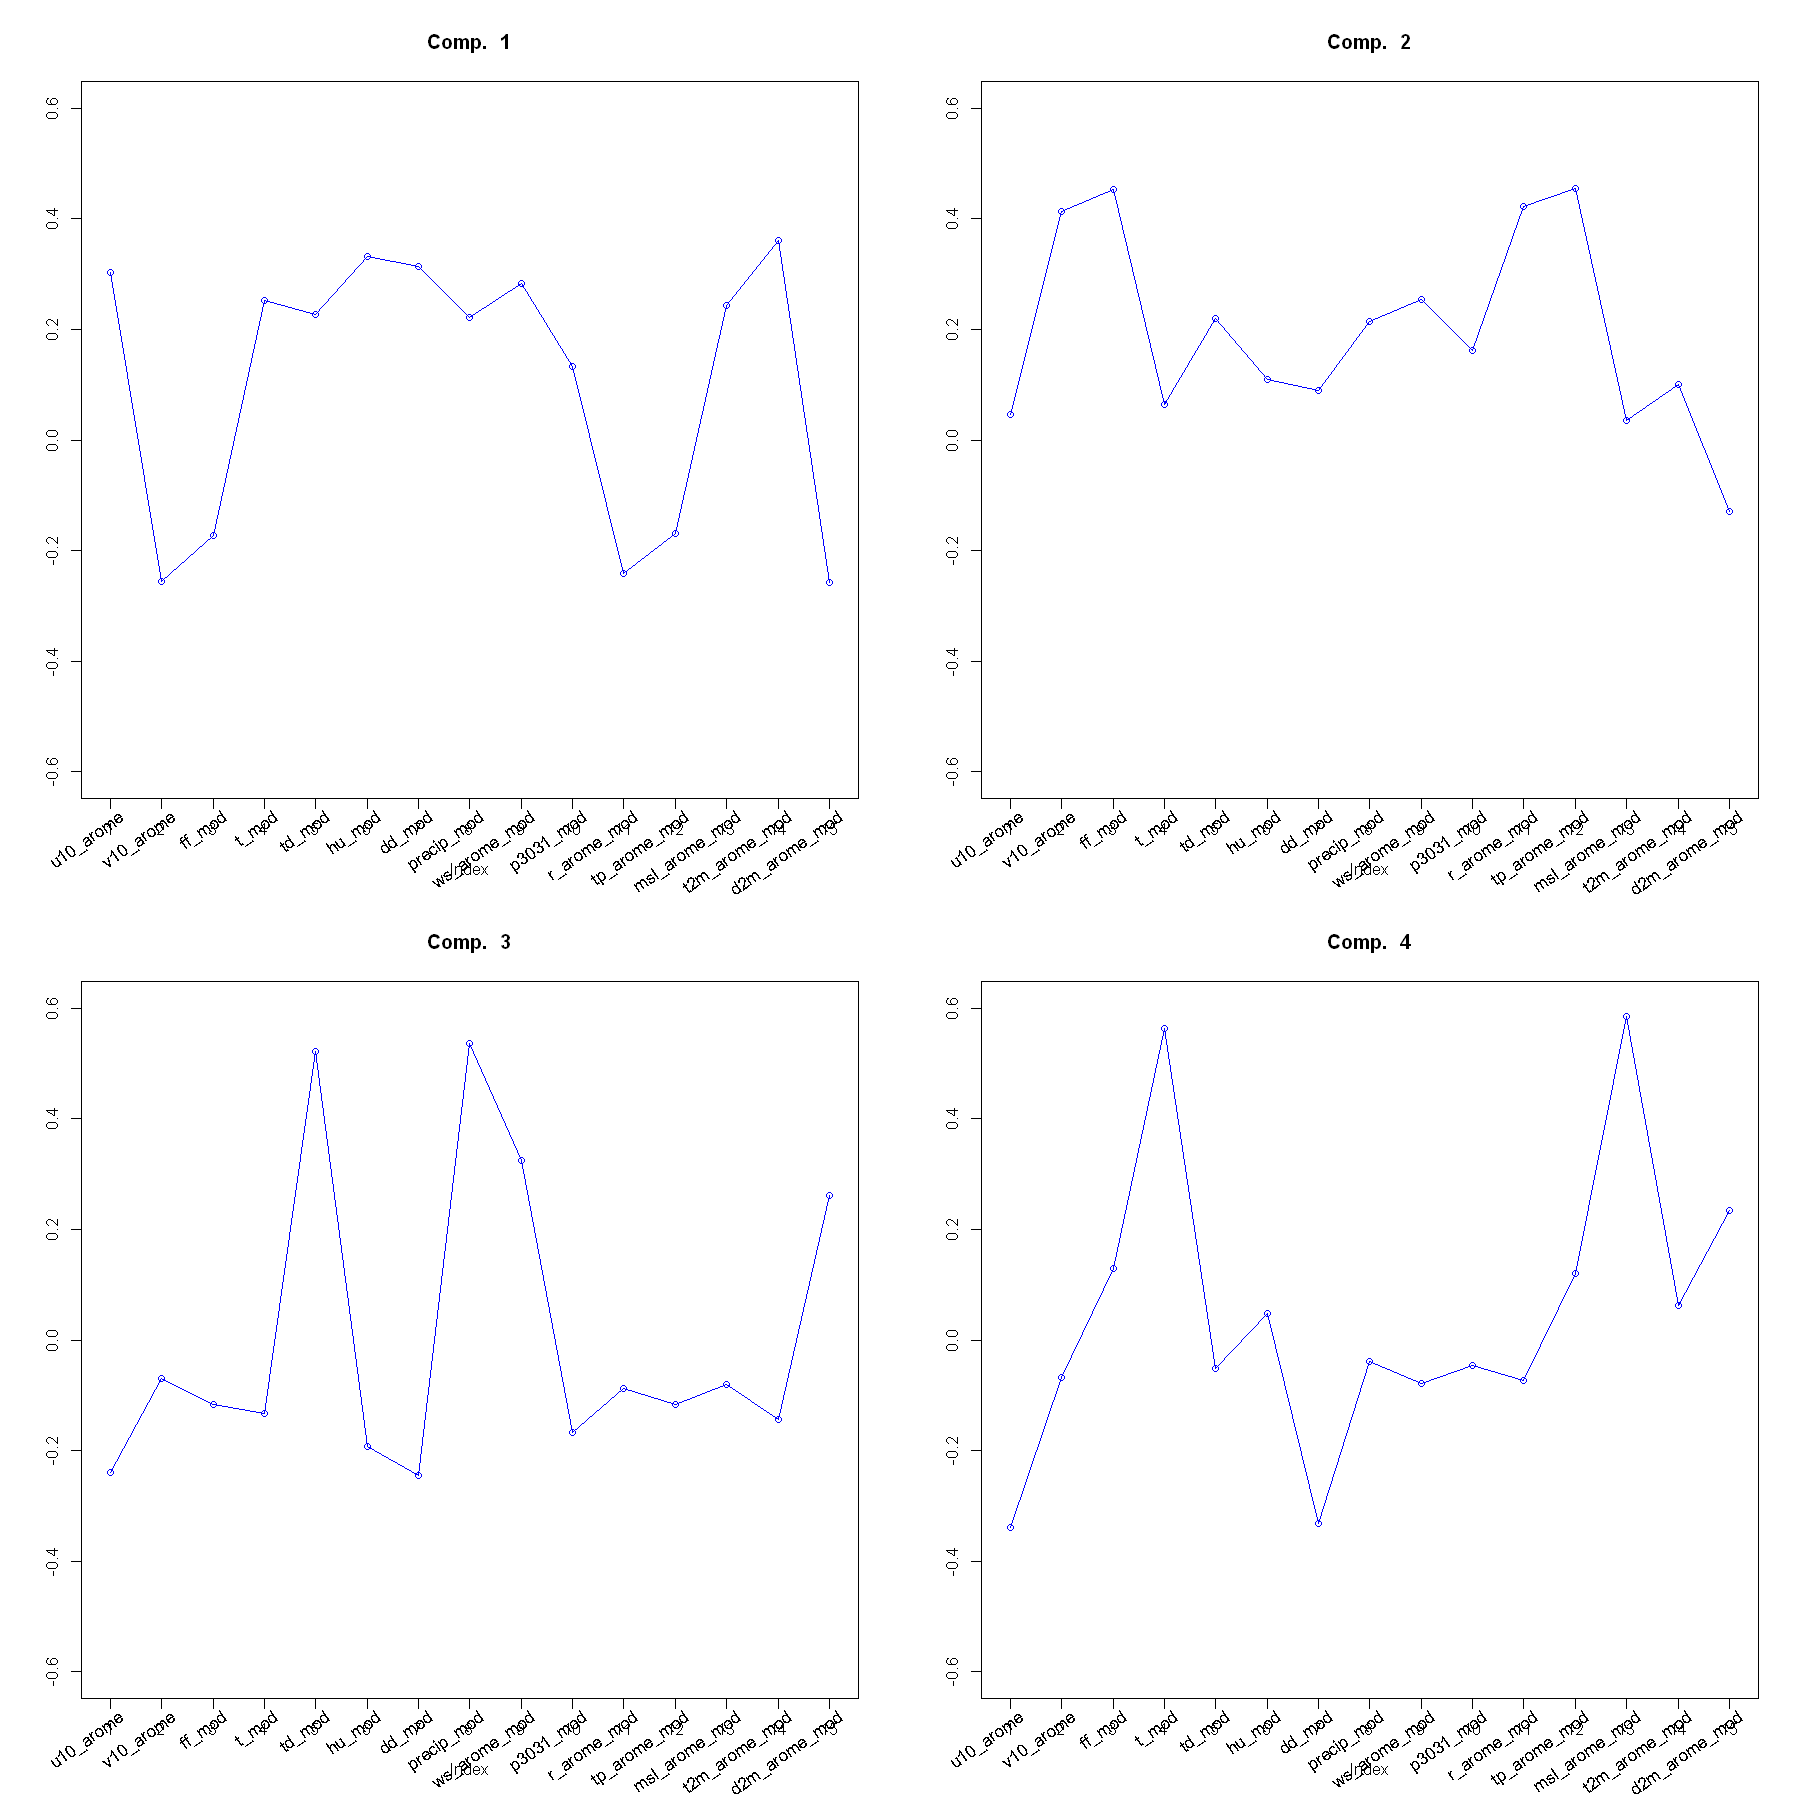

In [27]:
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow = c(2,2))
x=c("u10_arome","v10_arome","ff_mod","t_mod","td_mod","hu_mod","dd_mod","precip_mod","ws_arome_mod", "p3031_mod","r_arome_mod","tp_arome_mod","msl_arome_mod","t2m_arome_mod","d2m_arome_mod") 
#print((acp$svd$V[, i]))
print((x))
for (i in 1:4){
    plot(acp$svd$V[, i], type = "o", main = paste("Comp. ", i), lab = c(10, 5, 0), ylab = "",
         ylim = c(-0.6, 0.6), col = "blue")
    tck <- axis(1)
    labels <- x
    text(tck, par("usr")[3], labels=labels, srt=35, xpd=TRUE, adj=1:16, cex=1)
    tck2 <- axis(2)
    }

L'objectif est donc de d√©finir une surface s√©parant les deux classes. 

**Q** Une discrimination lin√©aire (hyperplan) semble-t-elle possible? 

Ce n'est pas utile ici mais une classification non supervis√©e est facile √† obtenir. Par exemple en 2 classes, par l'algorithme k-means. Donne t-elle la m√™me information ?

In [28]:
summary(meteo_mod)
print(meteo_mod[, c(4:6)])

       date         ff_mod          t_mod           td_mod     
 juillet : 62   Min.   :0.147   Min.   :16.42   Min.   :16.34  
 mars    : 62   1st Qu.:1.054   1st Qu.:16.73   1st Qu.:16.66  
 janvier : 61   Median :1.350   Median :16.83   Median :16.77  
 juin    : 59   Mean   :1.331   Mean   :16.84   Mean   :16.76  
 novembre: 59   3rd Qu.:1.604   3rd Qu.:16.96   3rd Qu.:16.87  
 mai     : 58   Max.   :2.526   Max.   :17.31   Max.   :17.06  
 (Other) :327                                                  
       hu             dd_mod         precip_mod      ws_arome_mod     
 Min.   : 46.75   Min.   : 5.737   Min.   :0.0000   Min.   :-0.03309  
 1st Qu.: 80.53   1st Qu.:12.599   1st Qu.:0.0000   1st Qu.: 0.96394  
 Median : 86.40   Median :14.927   Median :0.7368   Median : 1.23641  
 Mean   : 85.56   Mean   :14.044   Mean   :0.8420   Mean   : 1.23322  
 3rd Qu.: 92.06   3rd Qu.:16.145   3rd Qu.:1.3751   3rd Qu.: 1.52228  
 Max.   :100.00   Max.   :18.521   Max.   :3.2554   Max.   : 2

      td_mod        hu    dd_mod
1   16.89015  78.78333 15.708278
2   16.53549  81.70000 16.134848
3   16.93291  87.62083 16.094771
4   16.73965  76.58750 14.715355
5   16.56892  81.39167 16.897978
6   16.58733  86.20417 11.869077
8   16.57723  82.69167  6.861730
9   16.79328  82.96667 15.234282
10  16.62145  97.43750  8.689074
11  16.85004  88.47083 14.658615
12  16.92430  84.11667 15.573749
13  16.87548  79.87917 16.064972
14  16.59473  92.45833 14.808500
15  16.68597  82.87917 12.843611
16  16.55104  82.56667 17.196172
17  16.79355  97.07500 13.803683
18  16.75926  91.97083 15.599145
19  16.82811  81.52083 17.201017
20  16.89515  81.92917 16.997549
21  16.64101  92.37083 14.517231
22  16.84390  85.75833  9.886860
23  16.76195  87.77917  7.103403
24  16.60911  71.22500 13.252358
26  16.82400  82.09167 17.710637
27  16.99093  90.09167 13.934370
28  16.87956  89.43750 15.786334
30  16.60892  95.45833 10.305743
31  16.65051  79.34583 16.054594
32  16.60375  89.95417 16.411378
33  16.555


Attachement du package : 'gridExtra'


L'objet suivant est masqu√© depuis 'package:randomForest':

    combine




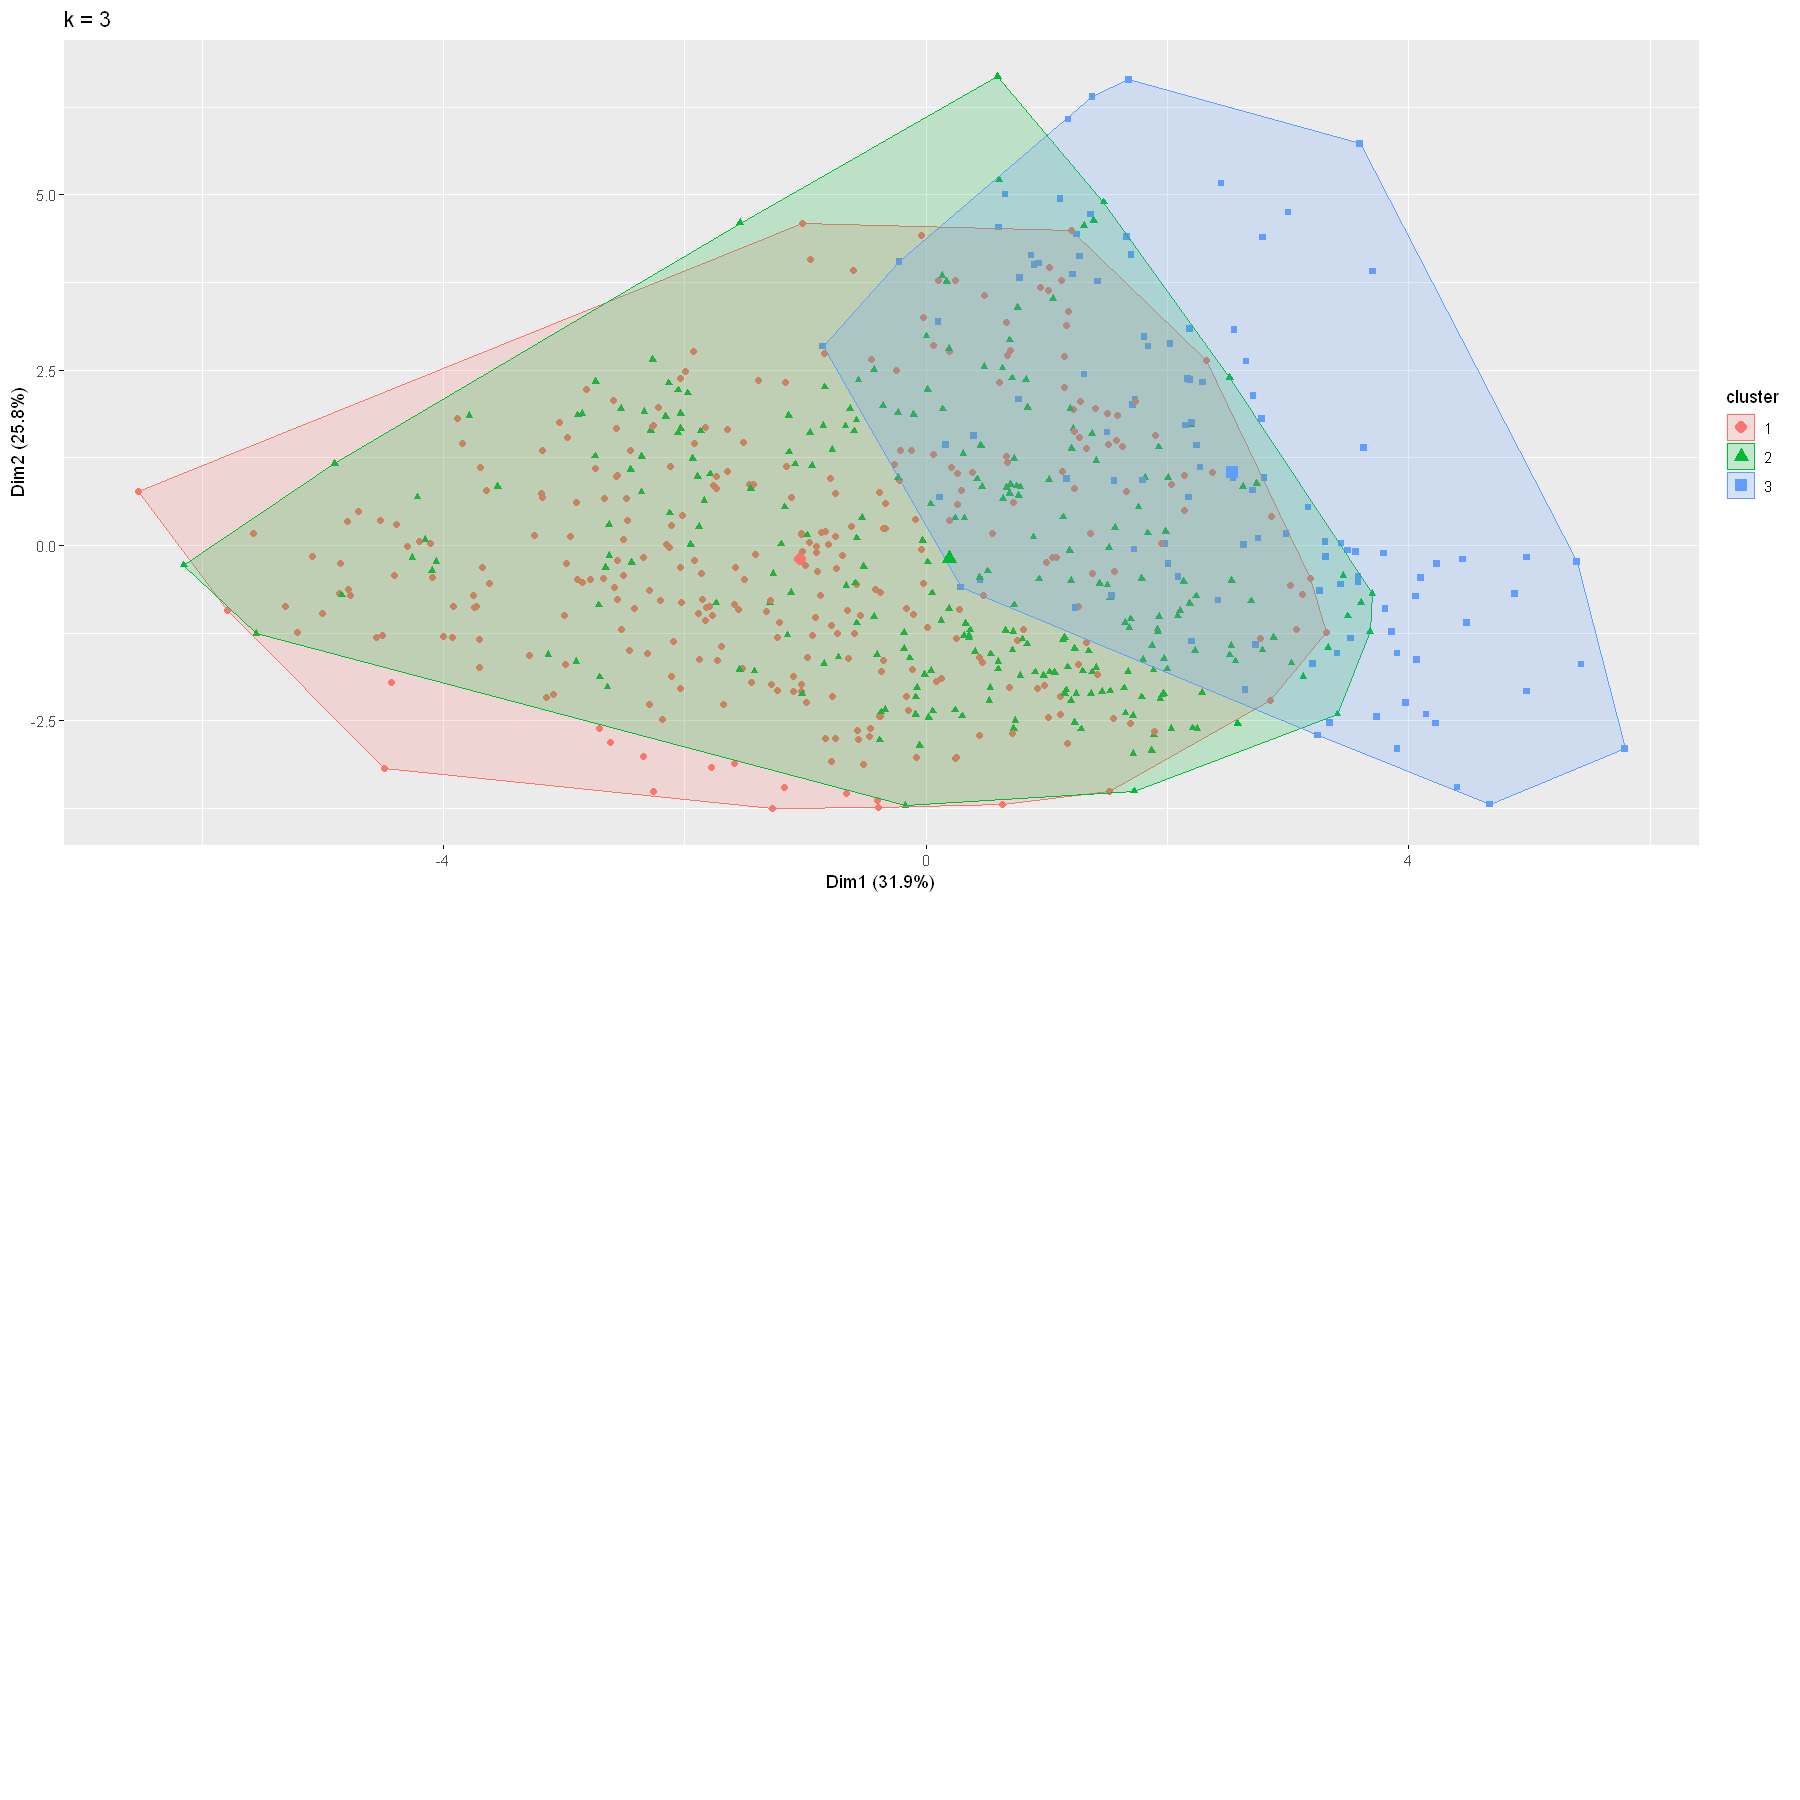

In [29]:
k3 <- kmeans( meteo_mod[, c(2:16)], centers = 3)

# plots to compare
p1 <- fviz_cluster(k3, geom = "point", data = meteo_mod[, c(2:16)]) + ggtitle("k = 3")
library(gridExtra)
grid.arrange(p1, nrow = 2)

## Protocole de comparaison

### Strat√©gie

La recherche  d'une meilleure m√©thode de pr√©vision suit le protocole suivant.

1. √âtape descriptive pr√©liminaire uni et multidimensionnelle visant √† rep√©rer les incoh√©rences, les variables non significatives ou de distribution exotique, les individus non concern√©s ou atypiques... et √† √©tudier les structures des donn√©es. Ce peut √™tre aussi la longue √©tape de construction de variables, attributs ou *features* sp√©cifiques des donn√©es. 
2. Proc√©der √† un tirage al√©atoire d'un √©chantillon *test* qui ne sera utilis√© que lors de la *derni√®re √©tape* de comparaison des m√©thodes.
3. La partie restante est l'√©chantillon d'*apprentissage* pour l'estimation des param√®tres des mod√®les.
4. Pour chacune des m√©thodes, optimiser la complexit√© des mod√®les en minimisant une estimation "sans biais" de l'erreur de pr√©vision, par exemple par [*validation crois√©e*](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf):
    - Variables et interactions √† prendre en compte dans la r√©gression lin√©aire ou logistique;
    - variables et m√©thode pour l'analyse discriminante;
    - nombre de feuilles dans l'arbre de r√©gression ou de classification;
    - architecture (nombre de neurones, p√©nalisation) du perceptron;
    - algorithme d'agr√©gation, 
    - noyau et p√©nalisation des SVMs.
5.  Comparaison des qualit√©s de pr√©vision sur la base du taux de mal class√©s pour le seul √©chantillon test qui est rest√© √† l'√©cart de tout effort ou "acharnement" pour l'optimisation des mod√®les.

**Remarques**
* En cas d'√©chantillon relativement "petit" il est recommand√© d'it√©rer la proc√©dure de d√©coupage apprentissage / test, afin de r√©duire la variance (moyenne) des estimations des erreurs de pr√©vision.

**Q** Comment appelle-t-on cette proc√©dure sp√©cifique de validation crois√©e?

Cette proc√©dure de validation crois√©e est la K-fold cross validation.

* *Attention*: ne pas "tricher" en modifiant le mod√®le obtenu lors de l'√©tape pr√©c√©dente afin d'am√©liorer le r√©sultat sur l'√©chantillon test!
* Le crit√®re utilis√© d√©pend du probl√®me : erreur quadratique, taux de mauvais classement, entropie, AUC (aire sous la courbe ROC), indice de Pierce, *log loss function*...

### Extraction des √©chantillons

Les commandes ci-dessous r√©alisent l'extraction du sous-ensemble des donn√©es d'apprentissage et de test. 

Utiliser trois chiffres au hasard, et **remplacer** "111" ci-dessous, comme initialisation du g√©n√©rateur de nombres al√©atoires. Attention, chaque participant tire un √©chantillon diff√©rent ; il est donc "normal" de ne pas obtenir les m√™mes mod√®les, les m√™mes r√©sultats.

**Commentaire :** La construction d'un √©chantillon d'entra√Ænement et d'un √©chantillon de test qui ne contiennent pas les m√™mes donn√©es est une √©tape essentielle vis-√†-vis de la performance. L'√©chantillon d'entra√Ænement va servir √† entra√Æner le mod√®le et √† s√©lectionner celui qui permet de minimiser l'erreur g√©n√©ralis√©e. Ensuite le mod√®le s√©lectionn√© sera test√© sur l'√©chantillon de test qui permet d'√©valuer son risque. Il est essentiel que dans ces deux √©tapes les algorithmes ne travaillent pas sur les m√™mes donn√©es. En effet, si l'√©chantillon de test et d'entra√Ænement comportent des donn√©es communes, cela va conduire √† une sous-estimation de l'erreur g√©n√©ralis√©e. 

In [30]:
set.seed(111) # initialisation du g√©n√©rateur
# Extraction des √©chantillons
test.ratio <- .2   # part de l'√©chantillon test
npop <- nrow(meteo_mod) # nombre de lignes dans les donn√©es
nvar <- ncol(meteo_mod) # nombre de colonnes
# taille de l'√©chantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'√©chantillon test
testi <- sample(1:npop, ntest)
# indices de l'√©chantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

Construction des √©chantillons pour la r√©gression: pr√©vision de la concentration en ozone.

 <FONT COLOR="Blue"> Les variables explicatives de notre mod√®le $X= (X^1,..,X^p)$ sont les ¬´ param√®tres m√©t√©orologiques observ√©s le jour j¬ª et les ¬´ pr√©visions m√©t√©os du jour suivant par le mod√®le arome¬ª. </font>

 <FONT COLOR="Blue"> Les variables √† expliquer $Y$ sont : **rain_class** pour la classification ($Y \in \left\{ 1..K
\right\} $) et **rain** pour la regression ($Y \in \mathbb{R}$). </font>

<FONT COLOR="Blue"> Dans le code suivant, on construit les √©chantillons pour la **r√©gression**. On enl√®ve donc de meteo_mod([appri,]) la variable explicative  **Y = rain_class** et on conserve uniquement la variable explicative **Y = rain** </font>

In [31]:
# construction de l'√©chantillon d'apprentissage
datappr <- meteo_mod[appri,-18] #on enl√®ve rain_class pour la r√©gression
# construction de l'√©chantillon test
datestr <- meteo_mod[testi,-18] 
# v√©rification
str(datappr)
str(datestr)
#summary(datappr) 

'data.frame':	550 obs. of  17 variables:
 $ date           : Factor w/ 12 levels "ao√ªt","avril",..: 7 9 6 8 4 3 9 7 4 12 ...
 $ ff_mod         : num  1.372 1.319 1.186 0.557 1.744 ...
 $ t_mod          : num  17 16.6 17 16.9 16.7 ...
 $ td_mod         : num  16.9 16.5 16.9 16.7 16.6 ...
 $ hu             : num  78.8 81.7 87.6 76.6 81.4 ...
 $ dd_mod         : num  15.7 16.1 16.1 14.7 16.9 ...
 $ precip_mod     : num  0 1.063 0.585 0 1.17 ...
 $ ws_arome_mod   : num  1.298 1.203 1.173 0.543 1.487 ...
 $ p3031_arome_mod: num  15.6 17.5 16 11.8 16.9 ...
 $ u10_arome      : num  3.039 2.464 2.964 -0.261 3.94 ...
 $ v10_arome      : num  1.416 -1.899 0.986 -1.398 -1.458 ...
 $ t2m_arome_mod  : num  6.61 6.51 6.62 6.58 6.52 ...
 $ d2m_arome_mod  : num  16.9 16.5 16.9 16.7 16.6 ...
 $ r_arome_mod    : num  8.89 9.29 9.07 8.68 8.97 ...
 $ tp_arome_mod   : num  1.33 2.2 1.66 0.98 2.4 ...
 $ msl_arome_mod  : num  11.5 11.5 11.5 11.5 11.5 ...
 $ rain_mod       : num  0.585 1.613 0 0 0 ...
'data.

Construction des √©chantillons pour la discrimination: pr√©vision de d√©passement.

 <FONT COLOR="Blue"> Dans le code suivant, on construit les √©chantillons pour la **classification**. On enl√®ve donc de meteo_mod([appri,]) la variable explicative  **Y = rain** et on conserve uniquement la variable explicative **Y = rain_class**   </font>

In [32]:
# construction de l'√©chantillon d'apprentissage
datappq <- meteo_mod[appri,-17] #on enl√®ve rain pour la classification
# construction de l'√©chantillon test 
datestq <- meteo_mod[testi,-17] 

# v√©rification
str(datappq)
str(datestq)
#summary(datappq)

'data.frame':	550 obs. of  17 variables:
 $ date           : Factor w/ 12 levels "ao√ªt","avril",..: 7 9 6 8 4 3 9 7 4 12 ...
 $ ff_mod         : num  1.372 1.319 1.186 0.557 1.744 ...
 $ t_mod          : num  17 16.6 17 16.9 16.7 ...
 $ td_mod         : num  16.9 16.5 16.9 16.7 16.6 ...
 $ hu             : num  78.8 81.7 87.6 76.6 81.4 ...
 $ dd_mod         : num  15.7 16.1 16.1 14.7 16.9 ...
 $ precip_mod     : num  0 1.063 0.585 0 1.17 ...
 $ ws_arome_mod   : num  1.298 1.203 1.173 0.543 1.487 ...
 $ p3031_arome_mod: num  15.6 17.5 16 11.8 16.9 ...
 $ u10_arome      : num  3.039 2.464 2.964 -0.261 3.94 ...
 $ v10_arome      : num  1.416 -1.899 0.986 -1.398 -1.458 ...
 $ t2m_arome_mod  : num  6.61 6.51 6.62 6.58 6.52 ...
 $ d2m_arome_mod  : num  16.9 16.5 16.9 16.7 16.6 ...
 $ r_arome_mod    : num  8.89 9.29 9.07 8.68 8.97 ...
 $ tp_arome_mod   : num  1.33 2.2 1.66 0.98 2.4 ...
 $ msl_arome_mod  : num  11.5 11.5 11.5 11.5 11.5 ...
 $ rain_class     : Factor w/ 3 levels "high_rain","l

Enfin, avant de passer aux diff√©rents algorithmes, d√©finissons une fonction tra√ßant le graphe des r√©sidus avec des couleurs et des √©chelles fixes sur les axes. 

<FONT COLOR="Blue"> On modifie xlim et ylim de la fonction plot.res pour ne pas que le graphique suivant soit trop ramass√© </font>

In [33]:
options(repr.plot.width = 8, repr.plot.height = 4)
# D√©finition d'une fonction pour un graphe color√© et des √©chelles fixes sur les
# axes
plot.res <- function(x, y, titre = "titre",lim_x = c(-0.5, 3),lim_y = c(-2, 3))  {
    plot(x, y, col = "blue", xlim = lim_x , ylim = lim_y , ylab = "R√©sidus", 
        xlab = "Valeurs pr√©dites", main = titre, pch = 20)
    # points(x2, y, col='red')
    abline(h = 0, col = "green")
}

## [Pr√©vision par mod√®le gaussien](http://wikistat.fr/pdf/st-m-app-select.pdf)

Le premier mod√®le √† tester est un simple mod√®le de r√©gression lin√©aire mais, comme certaines variables sont qualitatives, il s'agit d'une analyse de covariance. D'autre part, on s'int√©resse √† savoir si des interactions sont √† prendre en compte. Le mod√®le devient alors polynomial d'ordre 2 ou quadratique.

### Mod√®le lin√©aire

#### Sans s√©lection de variables

Le mod√®le de r√©gression lin√©aire simple int√©gre des variables qualitatives; c'est dans ce cas une *analyse de covariance*  estim√©e par la fonction `aov` mieux adapt√©e √† ce mod√®le.

<FONT COLOR="Blue"> On va effectuer de la regression. Donc on utilise l'√©chantillon d'apprentissage **datappr** et l'√©chantillon de test **datestr** </font>

In [34]:
head(datappr)

date     ff_mod    t_mod    td_mod   hu       dd_mod   precip_mod
1 juin     1.3724490 17.01202 16.89015 78.78333 15.70828 0.0000000 
2 mars     1.3189742 16.62456 16.53549 81.70000 16.13485 1.0626586 
3 juillet  1.1859361 16.99615 16.93291 87.62083 16.09477 0.5848035 
4 mai      0.5567546 16.86086 16.73965 76.58750 14.71535 0.0000000 
5 f√©vrier  1.7437503 16.65917 16.56892 81.39167 16.89798 1.1696071 
6 d√©cembre 0.5596158 16.65393 16.58733 86.20417 11.86908 0.5848035 
  ws_arome_mod p3031_arome_mod u10_arome  v10_arome  t2m_arome_mod
1 1.2984967    15.63008         3.0385028  1.4163599 6.613260     
2 1.2025145    17.48316         2.4638858 -1.8989708 6.509325     
3 1.1732186    16.00132         2.9638715  0.9856267 6.616270     
4 0.5428623    11.80243        -0.2606926 -1.3976028 6.578736     
5 1.4870470    16.89908         3.9400556 -1.4576058 6.524575     
6 0.5771552    12.56309         0.1446032  0.6620992 6.505274     
  d2m_arome_mod r_arome_mod tp_arome_mod msl_arome_mod rain_mod 
1 16.88700      8.890320    1.3253936    11.52952      0.5848035
2 16.54305      9.291480    2.2018882    11.51875      1.6134286
3 16.92587      9.071992    1.6609688    11.52765      0.0000000
4 16.74417      8.682403    0.9796742    11.53492      0.0000000
5 16.57078      8.968561    2.4045675    11.53680      0.0000000
6 16.52546      9.233563    0.5905781    11.54698      0.5848035

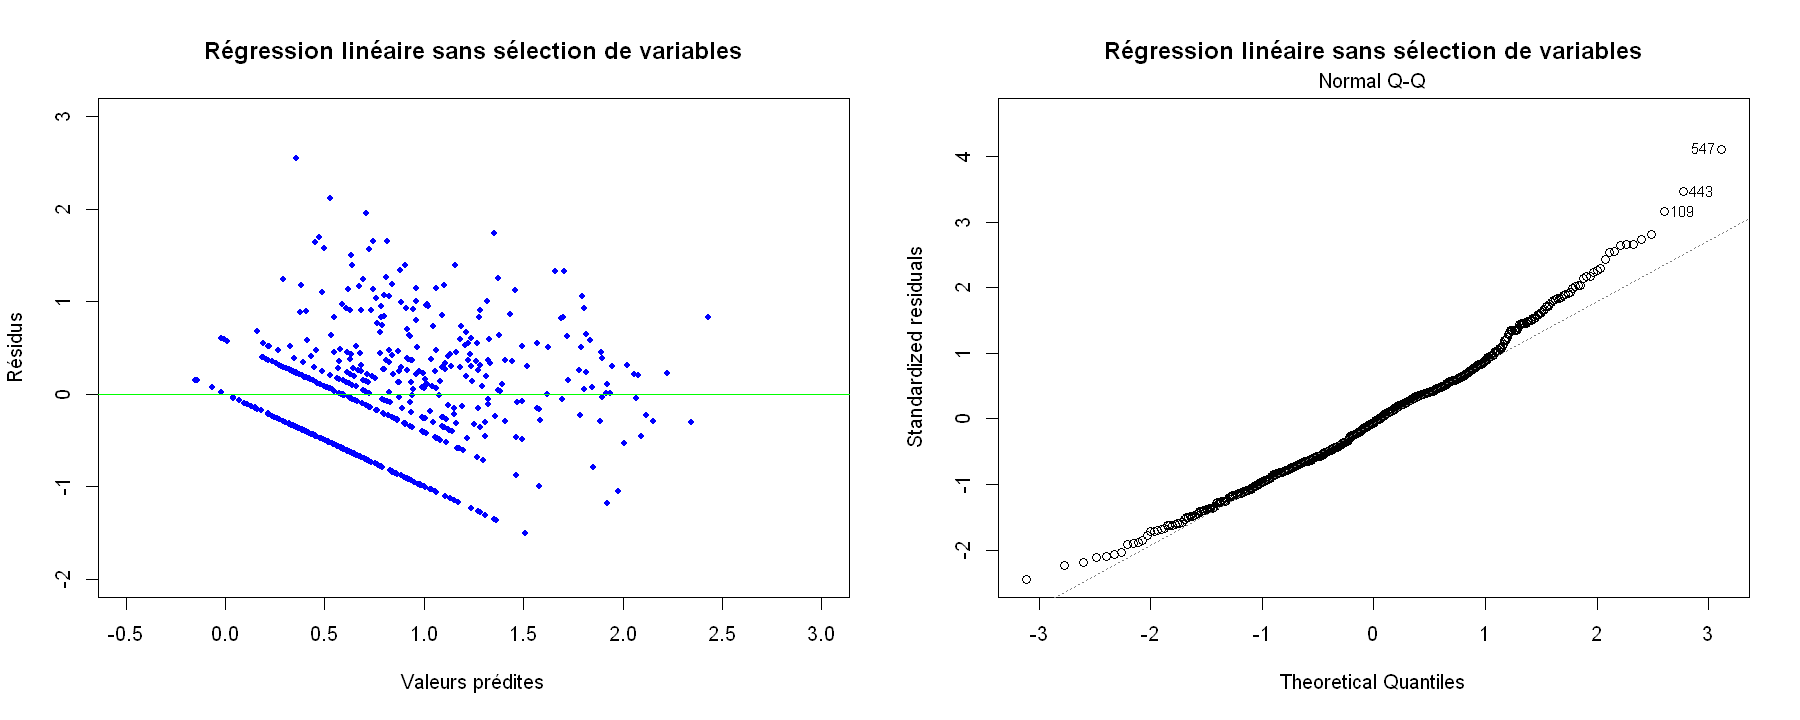

In [35]:
options(repr.plot.width = 15, repr.plot.height = 6)

# estimation du mod√®le sans interaction
reg.lm = aov(rain_mod ~ . , data = datappr) #lm au lieu de aov fonctionne aussi

# Extraction des r√©sidus et des valeurs ajust√©es de ce mod√®le
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

# Graphe des r√©sidus. 
par(mfrow = c(1,2))
plot.res(fit.lm,res.lm,"R√©gression lin√©aire sans s√©lection de variables") #fonction plot.res d√©finie + haut
plot(reg.lm,which=c(2),label.size=2, main = "R√©gression lin√©aire sans s√©lection de variables") #QQ-plot

##autre m√©thode : 
#par(mfrow = c(1,2))
#plot(reg.lm,which=c(1,2),label.size=2, main = "R√©gression lin√©aire de rain_mod sans s√©lection de variables")

**Q** Que dire de la distribution de ces r√©sidus? 



**Q** La forme du nuage renseigne sur les hypoth√®ses de lin√©arit√© du mod√®le et d'homosc√©dasticit√©. Que dire de la validit√© de ce mod√®le?

<FONT COLOR="Blue"> **graphe 1** : 
- <FONT COLOR="Blue"> Les r√©sidus ne sont pas dispers√©s de fa√ßon √©quivalente. Cela signifie que la variance d√©pend de Y et n'est pas constante (h√©t√©rosc√©dasticit√©). 
- <FONT COLOR="Blue"> On obverse une forme particuli√®re (au moins 3 droites parall√®les) dans le nuage donc il y a toujours une tendance ce qui sugg√®re que les r√©sidus ne sont pas ind√©pendants entre eux. 
- <FONT COLOR="Blue"> Il y beaucoup d'outliers 

<FONT COLOR="Blue"> Lorsqu'il y a une droite cela signifie que sur plusieurs donn√©es on a la m√™me valeur pour la quantit√© de pluie r√©elle. En effet les r√©sidus sont obtenus de la mani√®re suivante $\hat \epsilon = Y - \hat Y$ donc si Y est constante, alors on observe une droite. Par exemple, la premi√®re droite  $\hat \epsilon =  - \hat Y $ passe par l'origine du rep√®re donc $Y = 0$ c'est √† dire qu'il n'y a pas de pluie. En effet, on observe dans les donn√©es qu'il y a beaucoup de jours pour lesquels la pluie est nulle.
 

<FONT COLOR="Blue"> **graphe 2** : 
On voit que les r√©sidus ne sont pas gaussiens car les points s'√©loignent rapidement de la droite (d√©crochement). </font>

<FONT COLOR="Blue"> **Conclusion** : Les hypoth√®ses de la r√©gression lineaire ne sont pas v√©rifi√©es. Nous ne pouvons donc pas l'appliquer pour expliquer nos donn√©es.      
</font>    

Appr√©cier n√©anmoins sa significativit√© par la commande suivante.

In [36]:
summary(reg.lm)

                 Df Sum Sq Mean Sq F value   Pr(>F)    
date             11  16.09   1.463   3.665 4.96e-05 ***
ff_mod            1  15.24  15.240  38.173 1.30e-09 ***
t_mod             1   0.40   0.401   1.003  0.31694    
td_mod            1   6.15   6.148  15.399 9.87e-05 ***
hu                1   0.01   0.008   0.021  0.88512    
dd_mod            1   7.59   7.594  19.022 1.56e-05 ***
precip_mod        1  27.38  27.380  68.581 1.03e-15 ***
ws_arome_mod      1   1.26   1.262   3.161  0.07600 .  
p3031_arome_mod   1   0.26   0.259   0.649  0.42076    
u10_arome         1   4.24   4.243  10.628  0.00119 ** 
v10_arome         1  11.27  11.270  28.230 1.60e-07 ***
t2m_arome_mod     1   3.21   3.209   8.039  0.00476 ** 
d2m_arome_mod     1   0.04   0.044   0.111  0.73868    
r_arome_mod       1   2.41   2.412   6.043  0.01429 *  
tp_arome_mod      1   0.22   0.220   0.550  0.45865    
msl_arome_mod     1  18.51  18.507  46.355 2.71e-11 ***
Residuals       523 208.80   0.399              

In [37]:
coef(reg.lm)

(Intercept)       dateavril    dated√©cembre     datef√©vrier     datejanvier 
  199.500658639    -0.114689282     0.276583062     0.013304787     0.069654329 
    datejuillet        datejuin         datemai        datemars    datenovembre 
   -0.012262388     0.108335748     0.094490787     0.005720965     0.211102951 
    dateoctobre   dateseptembre          ff_mod           t_mod          td_mod 
    0.066284327     0.024306154     0.397295511   -14.338719791    11.236797265 
             hu          dd_mod      precip_mod    ws_arome_mod p3031_arome_mod 
   -0.062136258     0.021839268     0.182357546    -0.594518510    -0.022355268 
      u10_arome       v10_arome   t2m_arome_mod   d2m_arome_mod     r_arome_mod 
    0.061437216     0.057906882    57.693387212   -12.806258229     1.274318253 
   tp_arome_mod   msl_arome_mod 
   -0.046523287   -27.445148920

**Q** Ce premier mod√®le est compar√© avec celui de la seule pr√©vision d√©terministe. Qu'en conclure?

<FONT COLOR = "blue"> Le mod√®le d√©terministe est ici donn√© par le mod√®le AROME. Nous allons comparer **rain** (devenue **rain_mod** apr√®s modification) repr√©sentant la quantit√© totale de pr√©cipitation le jour suivant √† **tp_arome**  (devenue **tp_arome_mod** apr√®s modification) repr√©sentant la quantit√© totale de pr√©cipitation le jour suivant d'apr√®s le mod√®le AROME.
    
<FONT COLOR = "blue"> Pour le premier plot, on trace en ordonn√©e les r√©sidus du mod√®le d√©terministe : *datappr[, "tp_arome_mod"] - datappr[, "rain_mod"]* (valeurs pr√©dites par le mod√®le d√©terministe - sorties observ√©es = $\hat Y - Y = \hat \epsilon$) en fonction des valeurs pr√©dites par le mod√®le d√©terministe en abscisse : *datappr[, "tp_arome_mod"]* ($\hat Y = X \hat \theta$). 
    
<FONT COLOR = "blue"> Pour le deuxi√®me plot, on trace les r√©sidus obtenus avec notre mod√®le statistique contenant toutes les variables explicatives.    

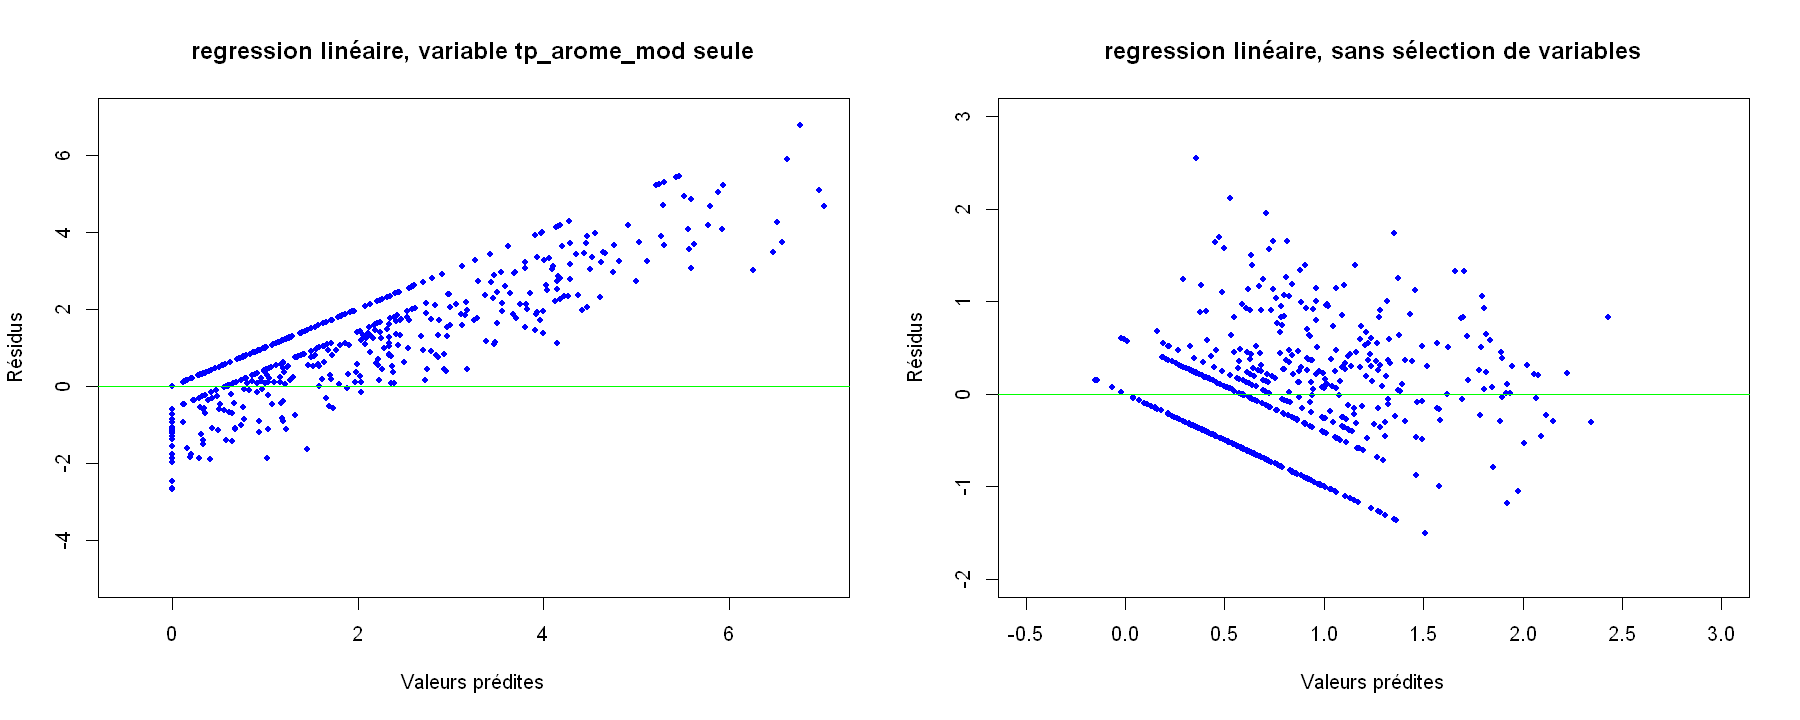

In [38]:
# Graphe des r√©sidus du mod√®le d√©terministe MOCAGE
par(mfrow = c(1, 2))
plot.res(datappr[, "tp_arome_mod"],
         datappr[, "tp_arome_mod"] - datappr[, "rain_mod"] , "regression lin√©aire, variable tp_arome_mod seule",
        lim_x = c(-0.5,7),lim_y = c(-5,7))
plot.res(fit.lm, res.lm, "regression lin√©aire, sans s√©lection de variables")
par(mfrow = c(1, 1))

<FONT COLOR = "blue"> On observe que les deux graphes ont une forte tendance (droites parall√®les observables) et les les r√©sidus ne sont pas dispers√©s de fa√ßon √©quivalente (h√©t√©rosc√©dasticit√©). Dans les deux cas, le mod√®le de r√©gression lin√©aire n'est pas adapt√©. Cependant, le deuxi√®me graphe correspondant au mod√®le statistique avec toutes les variables est un peu meilleur car il est davantage centr√© autour de z√©ro et il ne pr√©sente pas le fort biais du premier graphe. 

#### S√©lection de variable par r√©gularisation L1 (LASSO)

<FONT COLOR = "blue"> Pour la regression lasso, on ne conserve que les variables quantitatives. On met dans x la variable √† expliquer **rain_mod** et dans y toutes les variables sauf la variable qualitative **date** et la variable √† expliquer **rain_mod**. 
    
<FONT COLOR = "red"> je n'arrive pas √† grossir la taille des lables sur les trac√©s pour + de visibilit√©

 [1] "1  -  dateao√ªt"         "2  -  dateavril"        "3  -  dated√©cembre"    
 [4] "4  -  datef√©vrier"      "5  -  datejanvier"      "6  -  datejuillet"     
 [7] "7  -  datejuin"         "8  -  datemai"          "9  -  datemars"        
[10] "10  -  datenovembre"    "11  -  dateoctobre"     "12  -  dateseptembre"  
[13] "13  -  ff_mod"          "14  -  t_mod"           "15  -  td_mod"         
[16] "16  -  hu"              "17  -  dd_mod"          "18  -  precip_mod"     
[19] "19  -  ws_arome_mod"    "20  -  p3031_arome_mod" "21  -  u10_arome"      
[22] "22  -  v10_arome"       "23  -  t2m_arome_mod"   "24  -  d2m_arome_mod"  
[25] "25  -  r_arome_mod"     "26  -  tp_arome_mod"    "27  -  msl_arome_mod"  


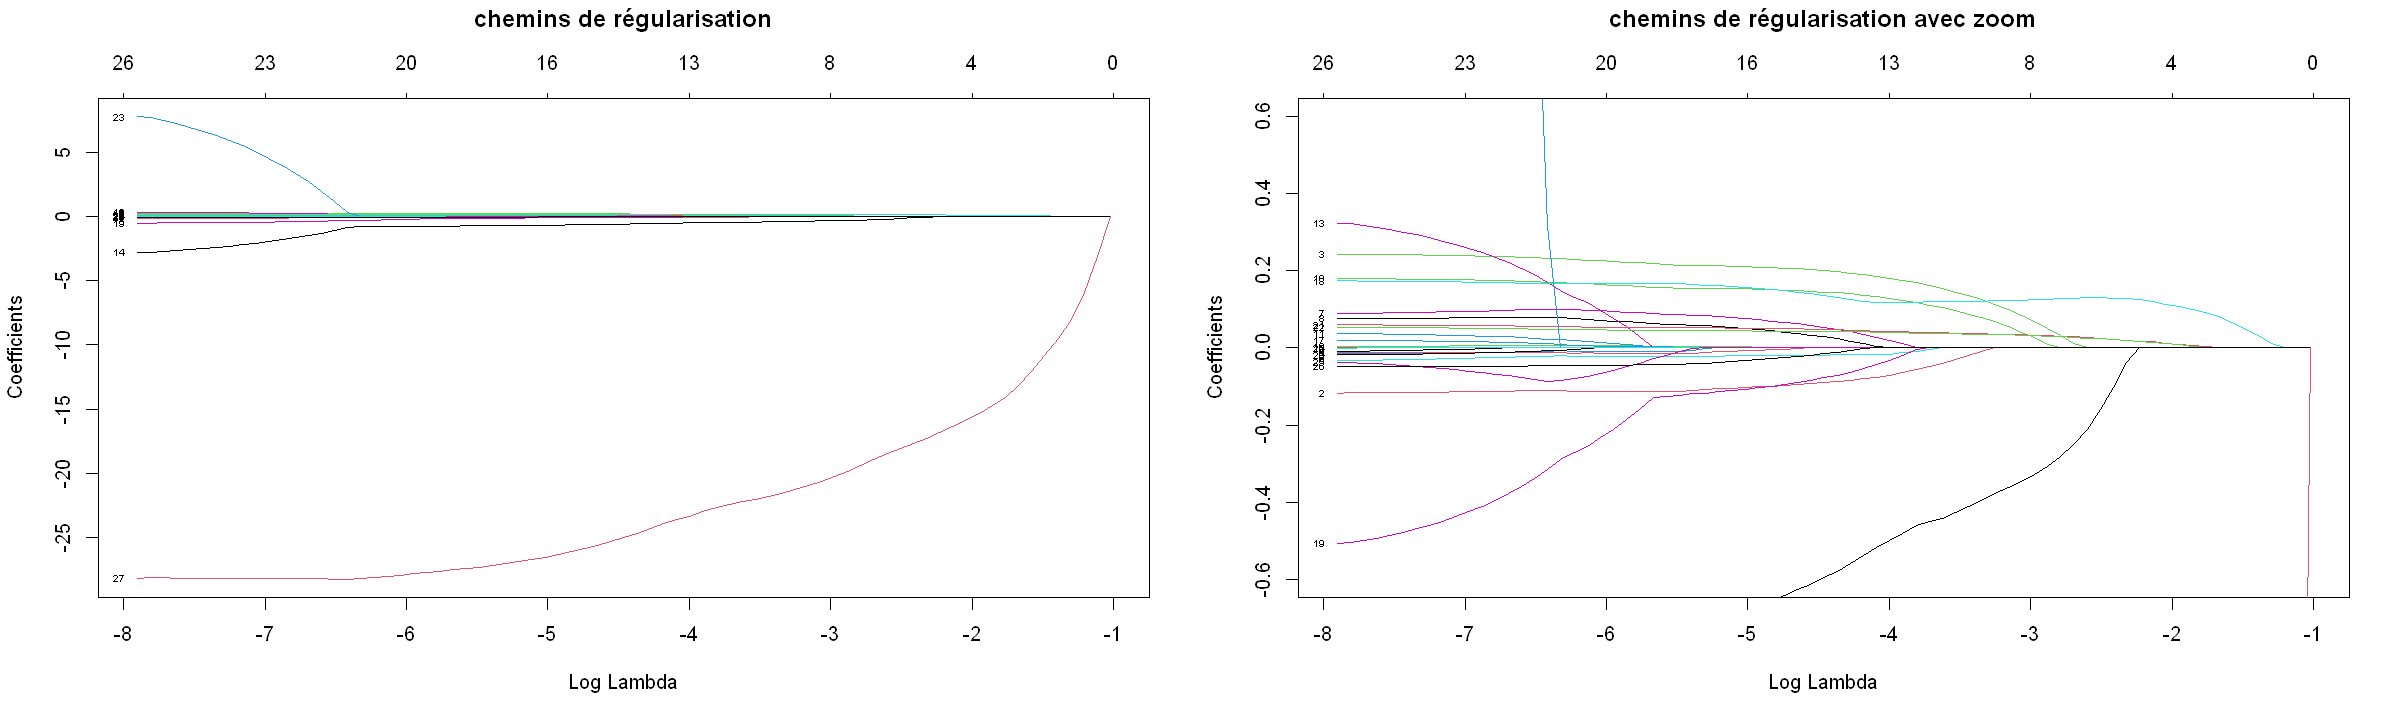

In [39]:
# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 17], #rain_mod : variable √† expliquer
                           x = as.matrix(datappr[, -c(1, 17)])) #on retire date (qualitative) et rain_mod (variable √† expliquer)

# avec toutes les variables, cr√©er d'abord la matrice d'exp√©riences 
# avec 'model.matrix' (penser √† retirer l'intercept du mod√®le)                          
x.mat <- model.matrix(rain_mod ~ . - 1, data = datappr) #-1 : on enl√®ve l'intercept car dans la regression de Lasso on ne p√©nalise pas l'intercept
                                                        #sinon on aurait des solutions d√©pendantes de la position d'origine
reg.lasso <- glmnet(y = datappr$rain_mod, x = x.mat)

options(repr.plot.width = 20, repr.plot.height = 6)
par(mfrow = c(1, 2))
plot(reg.lasso, xvar = "lambda", label = TRUE)#premier plot global
title("chemins de r√©gularisation", adj = 0.5, line = 3) 

plot(reg.lasso, xvar = "lambda", label = TRUE,ylim = c(-0.6,0.6)) #deuxi√®me plot, zoom
title("chemins de r√©gularisation avec zoom", adj = 0.5, line = 3) 

#legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))  #enl√®ve la l√©gende qui sort du graphe car trop grande
print(paste(1:ncol(x.mat), " - ", colnames(x.mat))) #on rajoute la l√©gende hors des graphes

In [40]:
head(x.mat[,c(1:12)])

dateao√ªt dateavril dated√©cembre datef√©vrier datejanvier datejuillet datejuin
1 0        0         0            0           0           0           1       
2 0        0         0            0           0           0           0       
3 0        0         0            0           0           1           0       
4 0        0         0            0           0           0           0       
5 0        0         0            1           0           0           0       
6 0        0         1            0           0           0           0       
  datemai datemars datenovembre dateoctobre dateseptembre
1 0       0        0            0           0            
2 0       1        0            0           0            
3 0       0        0            0           0            
4 1       0        0            0           0            
5 0       0        0            0           0            
6 0       0        0            0           0

**Q** Que fait la commande model.matrix ? Comment sont g√©r√©es les variables cat√©gorielles ?

<FONT COLOR = "blue"> La commande **model.matrix** cr√©e une matrice dans laquelle les variables **qualitatives** sont s√©par√©es par modalit√©s, et pour garder un mod√®le r√©gulier on supprime la premi√®re modalit√© des variables qualitatives (ce qui revient √† les mettre dans l'intercept). Les colonnes de modalit√©s ne contiennent plus que des 0 et des 1 selon si la modalit√© consid√©r√©e est pr√©sente sur l'√©l√©ment observ√©. Cela permet de transformer les variables **qualitatives** en variables **quantitatives** (c'est √† dire avec des indicatrices)

<FONT COLOR = "blue"> Attention : pour les variables qualitatives deux cas √† traiter diff√©remment :

- <FONT COLOR = "blue"> si il y a un intercept : on est oblig√© de mettre √† 0 une modalit√© pour chaque variable qualitative (pour √©viter le surajustement et √ßa n'enl√®ve pas d'information car on peut retrouver l'indicatrice de la modalit√© enlev√©e en regardant la modalit√© de toutes les autres modalit√©s)
       
- <FONT COLOR = "blue"> si il n'y a pas d'intercept : on est oblig√© de mettre pour toutes les variables qualitatives une modalit√© √† 0 sauf pour une des variables qualitatives (pour pas que le mod√®le ne soit surparam√©tr√© et que l'on soit plus dans le cas r√©gulier).

 
**Q** Que repr√©sentent les courbes ci-dessus, appel√©es "chemins de r√©gularisation"?

<FONT COLOR = "blue"> Ce graphique repr√©sente les chemins de r√©gularisation. $\lambda$ est le pram√®tre de p√©nalisation dans la regression LASSO. 
On trace pour chaque valeur de $log (\lambda)$ en abscisse, l'estimation des param√®tres de notre mod√®le contenus dans le vecteur $\hat \theta$. Chaque courbe est une variable de $\hat \theta$. Lorsque la courbe touche 0, le coefficient correspondant dans $\hat \theta$ s'annule. 

<FONT COLOR = "blue"> Plus $\lambda$ augmente et plus les param√®tres du vecteur $\hat \theta$ vont √™tre estim√©s √† 0 (pour que le terme de p√©nalisation $l_1$ reste constant). Ainsi, plus $\lambda$ augmente et plus on a de coefficients nuls dans $\hat \theta$ donc plus notre estimateur $\hat \theta$ devient sparse. 

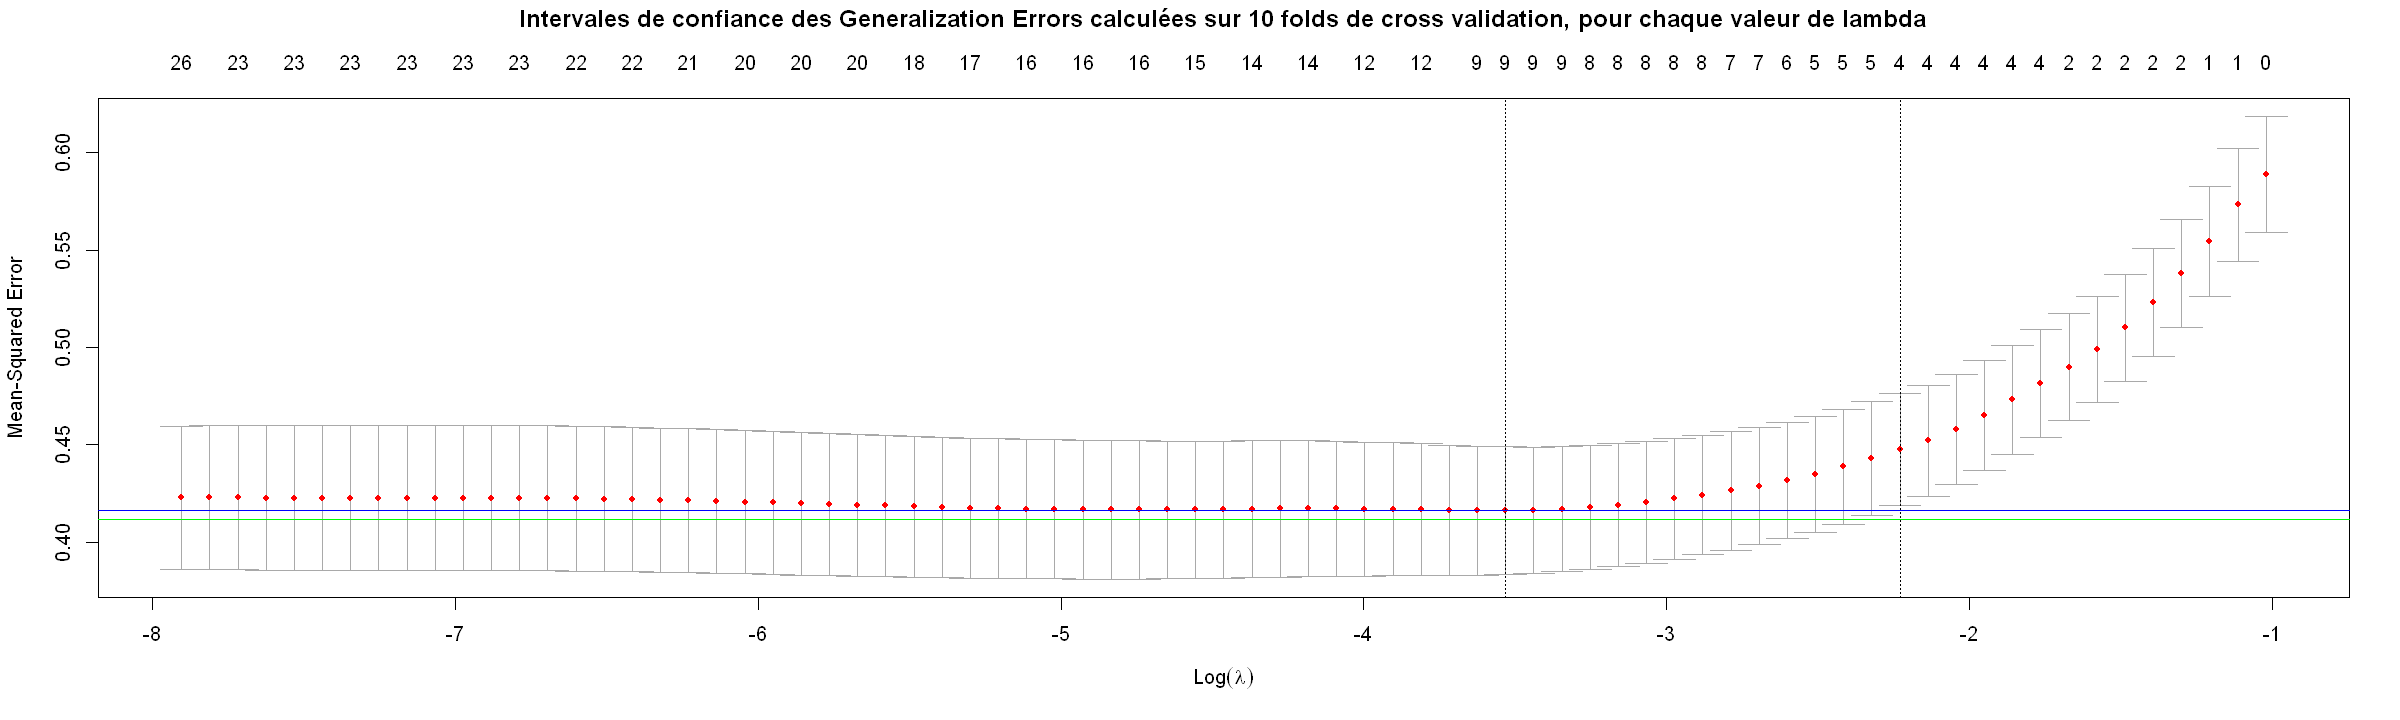

In [41]:
# choix du param√®tre de r√©gularisation par validation crois√©e
reg.lasso.cv <- cv.glmnet(y = datappr[, 17], x = x.mat) #cv.glmnet : k-fold cross-validation pour glmnet
plot(reg.lasso.cv) 
title("Intervales de confiance des Generalization Errors calcul√©es sur 10 folds de cross validation, pour chaque valeur de lambda", adj = 0.5, line = 3) 

#reg.lasso.cv$cvm : moyennes des intervalles de confiance  
# =  moyenne des generalization errors Rp(f) = points rouges

abline(h=min(reg.lasso.cv$cvm), col="blue")

#on trace la tangente horizontale associ√©e au min des moyennes des generalization errors Rp(f)
abline(h=min(reg.lasso.cv$cvm)-std.error(reg.lasso.cv$cvm), col="green") 

#std.error = calcule l'√©cart type de la moyenne 

#lambda.1se : largest value of lambda such that error is within 1 standard error of the minimum.

In [42]:
help(cv.glmnet)

**Q** Que repr√©sente la courbe rouge ? Et la bande qui est autour ? 

<FONT COLOR = "blue"> Pour diff√©rentes valeurs de $log (\lambda)$, le graphique ci-dessus repr√©sente les intervalles de confiance des **generalization error = $R_P(f)$** des 10 folds de la k-fold cross validation. Les points rouges repr√©sentent la moyenne des intervalles de confiance donc la moyenne des **generalization error** crois√©e sur les 10 folds. Les intervalles en gris sont les bords de l'intervalle de confiance qui fluctue autour de la moyenne. (1 Intervalle de Confiance  = 1 generalization error crois√©e des 10 folds pour 1 valeur de $\lambda$)


**Q** Comment sont obtenues les valeurs de log(lambda) correspondant aux lignes verticales en pointill√© ?
    
- <FONT COLOR = "blue"> 1√®re ligne en pointill√© (bleue) = La valeur de $\lambda$ pour laquelle la moyenne est la plus petite.

- <FONT COLOR = "blue"> 2√®me ligne en pointill√© (verte) = la valeur de $\lambda$ telle que l'erreur reste en dessous du minimum + un √©cart type => ce n'est pas l'erreur minimale mais elle reste raisonnable.
    
<FONT COLOR = "red"> quand je regarde la valeur de $\lambda_{1se}$ en tapant "reg.lasso.cv" et la valeur de "min(reg.lasso.cv$cvm)-std.error(reg.lasso.cv$cvm)" qui correspond √† la courbe verte, je ne trouve pas la m√™me chose... √† quoi correspond la courbe verte ?
    
<FONT COLOR = "blue"> Comment choisir $\lambda$ ? 
    
- <FONT COLOR = "blue"> On choisit $\lambda_{min}$ si on veut diminuer la **generalization error** donc si on veut pr√©dire en diminuant l'erreur de notre mod√®le. Il s'agit du $\lambda$ pour lequel la valeur de la moyenne des **generalization error** sur les 10 folds est la plus faible. 
    
- <FONT COLOR = "blue"> On choisit $\lambda_{1se}$ si l'objectif est de pr√©dire correctement (**generalization error** plut√¥t faible) tout en diminuant le nombre de variable de notre mod√®le. Il s'agit du plus grand $\lambda$ tel que la valeur minimale de la moyenne appartienne encore √† l'intervalle de confiance <FONT COLOR = "red"> - quel intervalle de confiance ? - </font>(on prend le $\lambda$ le plus grand tel que la droite bleue passe dans l'IC). *Remarque* : $\lambda_{1se}$ donne la plus grande valeur de $\lambda$ tel que la generalization error soit √† une distance de 1 erreur standard de l'erreur minimale. Rappel : erreur standard : std(x) = sd(x)/sqrt(length(x)). 

In [43]:
# valeur estim√©e
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 7))
# mod√®le correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.107581"

28 x 1 sparse Matrix of class "dgCMatrix"
                          s1
(Intercept)     194.57522342
dateao√ªt          .         
dateavril         .         
dated√©cembre      .         
datef√©vrier       .         
datejanvier       .         
datejuillet       .         
datejuin          .         
datemai           .         
datemars          .         
datenovembre      .         
dateoctobre       .         
dateseptembre     .         
ff_mod            .         
t_mod             .         
td_mod            .         
hu                .         
dd_mod            .         
precip_mod        0.12524433
ws_arome_mod      .         
p3031_arome_mod   .         
u10_arome         0.01810893
v10_arome         0.01630587
t2m_arome_mod     .         
d2m_arome_mod     .         
r_arome_mod       .         
tp_arome_mod      .         
msl_arome_mod   -16.81738811

In [44]:
# valeur estim√©e
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 7))
# mod√®le correspondant
coef(reg.lasso.cv, s = "lambda.min")

[1] "CV estimate of lambda : 0.0292468"

28 x 1 sparse Matrix of class "dgCMatrix"
                           s1
(Intercept)     261.675684594
dateao√ªt          .          
dateavril        -0.030651083
dated√©cembre      0.145230489
datef√©vrier       .          
datejanvier       .          
datejuillet       .          
datejuin          .          
datemai           .          
datemars          .          
datenovembre      0.096321470
dateoctobre       .          
dateseptembre     .          
ff_mod            .          
t_mod            -0.427798811
td_mod            .          
hu                0.001238905
dd_mod            .          
precip_mod        0.120741636
ws_arome_mod      .          
p3031_arome_mod   .          
u10_arome         0.038570493
v10_arome         0.037019030
t2m_arome_mod     .          
d2m_arome_mod     .          
r_arome_mod       .          
tp_arome_mod      .          
msl_arome_mod   -22.026434523

**Q** Combien restent-ils de coefficients non nuls. V√©rifier sur les chemins de r√©gularisation.

**Q** M√™me question en choisissant l'autre valeur de lambda retenue par glmnet, i.e. "reg.lasso.cv$lambda.min"

- <FONT COLOR = "blue"> Avec $\lambda_{min}$, il y a 9 param√®tres non nuls (plus l'intercept) donc 9 variables non nulles dans notre mod√®le. 

- <FONT COLOR = "blue"> Avec $\lambda_{1se}$, il y a 4 param√®tres non nuls (plus l'intercept) donc 4 variables non nulles dans notre mod√®le. On voit que l'on a grandement diminu√© le nombre de variables de notre mod√®le. La regression LASSO permet donc de faire de la s√©lection de variables.
    
<FONT COLOR = "blue"> *Remarque* : On peut aussi directement taper "reg.lasso.cv" pour avoir quelques infos sur $\lambda_{min}$ et $\lambda_{1se}$

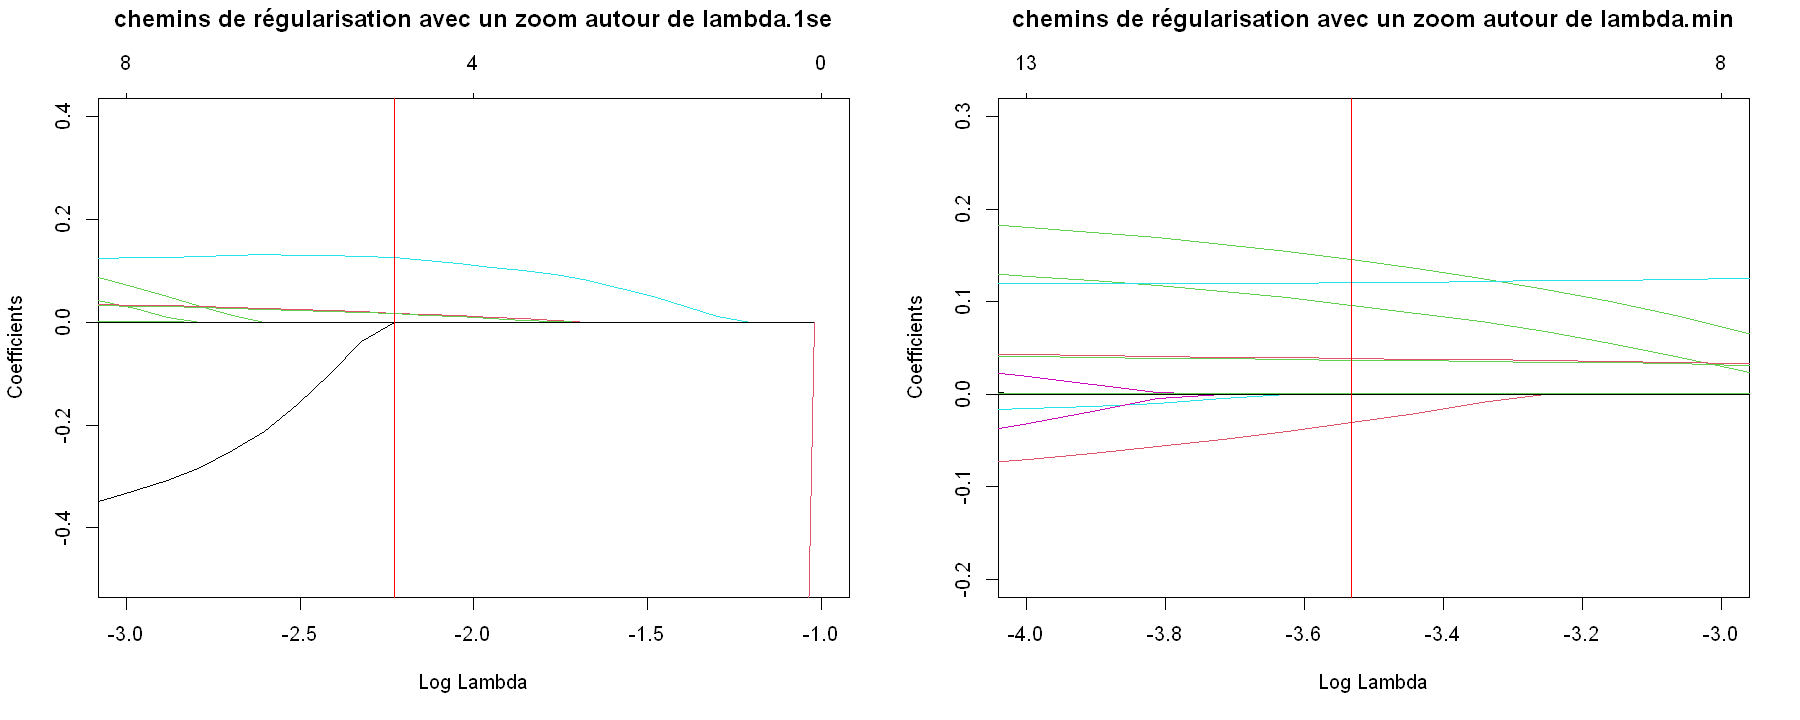

In [45]:
# NEW : 
options(repr.plot.width = 15, repr.plot.height = 6)
par(mfrow = c(1,2))
plot(reg.lasso, xvar = "lambda", label = TRUE,ylim=c(-0.5,0.4),xlim=c(-3,-1))
title("chemins de r√©gularisation avec un zoom autour de lambda.1se", adj = 0.5, line = 3) 
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

plot(reg.lasso, xvar = "lambda", label = TRUE,ylim=c(-0.2,0.3),xlim=c(-4,-3))
abline(v=log(reg.lasso.cv$lambda.min),col="red")
title("chemins de r√©gularisation avec un zoom autour de lambda.min", adj = 0.5, line = 3) 

<FONT COLOR = "blue"> En tra√ßant les chemins de r√©gularisation plus en d√©tail autour de $\lambda_{1se}$ et  $\lambda_{min}$ on v√©rifie bien qu'avec $\lambda_{1se}$ 4 variables sont non nulles tandis qu'avec $\lambda_{min}$ 9 variables sont non nulles.

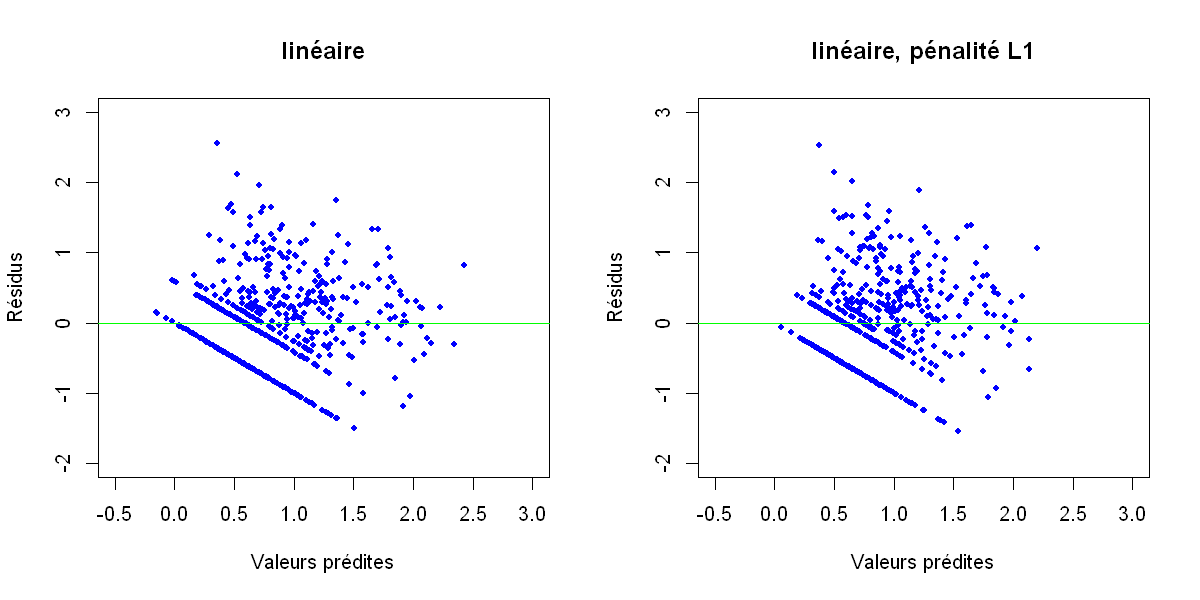

In [46]:
# Extraction des valeurs ajust√©es et des r√©sidus
fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$rain_mod - fit.lasso
# Graphe des r√©sidus
options(repr.plot.width = 10, repr.plot.height = 5)
par(mfrow = c(1, 2))
plot.res(fit.lm, res.lm, "lin√©aire")
plot.res(fit.lasso, res.lasso, "lin√©aire, p√©nalit√© L1")

<FONT COLOR = "blue"> On remarque un graphe plus ramass√© avec la gression lasso (p√©nalit√© L1). La dispersion des donn√©es sur l'axe des ordon√©es semble identique tandis que la dispersion sur l'axe des abscisses est moins importante avec la p√©nalit√© L1. 

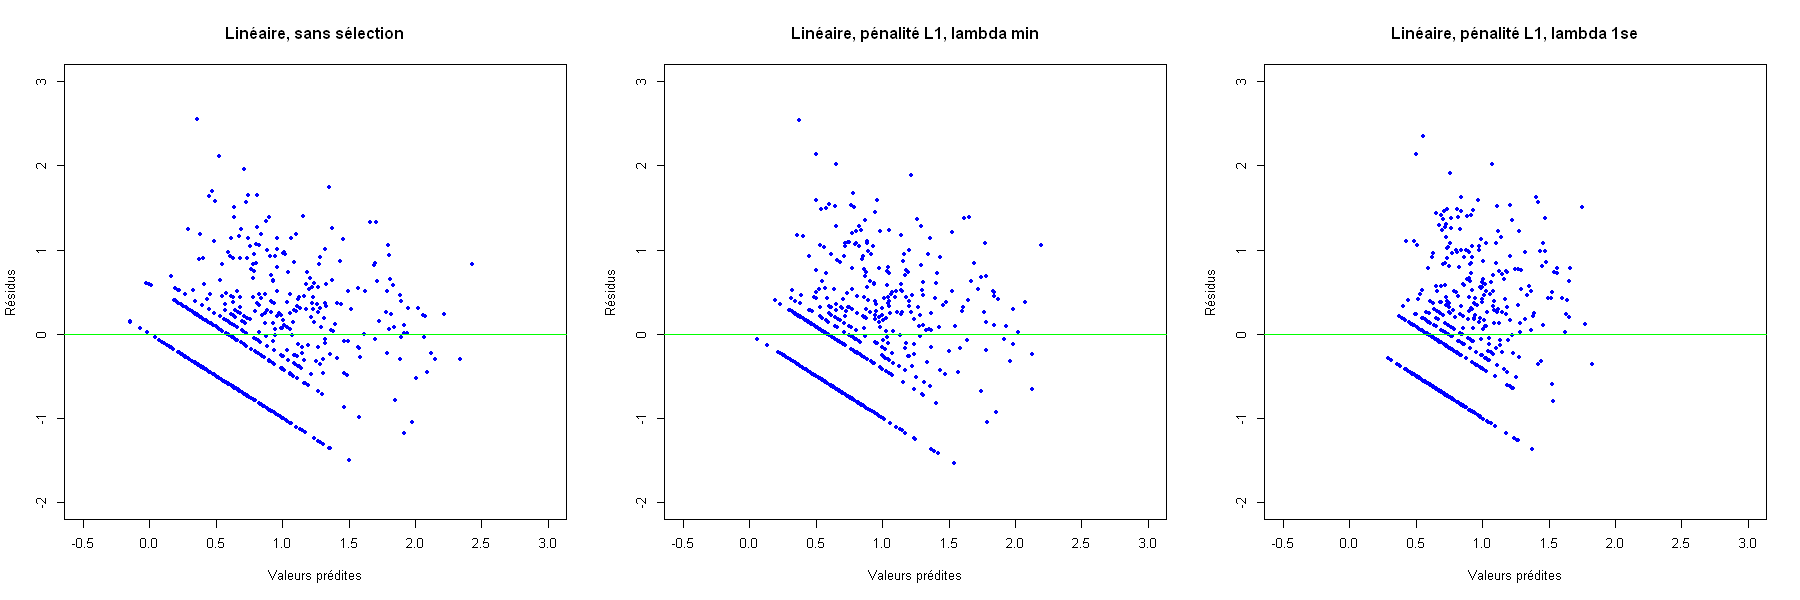

In [47]:
# Extraction des valeurs ajust√©es et des r√©sidus

fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$rain_mod - fit.lasso

fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat) # NEW
res.lasso.1se <- datappr$rain_mod - fit.lasso.1se # NEW

# Graphe des r√©sidus
options(repr.plot.width = 15, repr.plot.height = 5)
par(mfrow = c(1, 3))
plot.res(fit.lm, res.lm, "Lin√©aire, sans s√©lection")
plot.res(fit.lasso, res.lasso, "Lin√©aire, p√©nalit√© L1, lambda min")
plot.res(fit.lasso.1se, res.lasso.1se, "Lin√©aire, p√©nalit√© L1, lambda 1se") # NEW

**Q** Commenter. 

<FONT COLOR = "blue"> On observe que moins il y a de variables en jeu et plus le graphe des r√©sidu a une petite variance selon l'axe des abscisses (de gauche √† droite : le premier graphe contient toutes les variables soit 18, le deuxi√®me avec $\lambda_{min}$ contient 16 variables et le dernier avec $\lambda_{1se}$ en contient 4). 
</font> 
    
**Q** Calculer le crit√®re MSE (moyenne des carr√©s des r√©sidus) pour les deux mod√®les. Pourquoi celui obtenu par LASSO est-il moins bon ? Quel crit√®re LASSO minimise t-il ?


#### Erreur de regression

In [48]:
# MSE sur l'√©chantillon d'apprentissage
#-----------------------------------------------------------
paste("Mod√®le lin√©aire sans s√©letion:",mean(res.lm^2)) #res = r√©sidus
paste("LASSO avec lambda.min:",mean(res.lasso^2))
paste("LASSO avec lambda.1se:",mean(res.lasso.1se^2))

[1] "Mod√®le lin√©aire sans s√©letion: 0.379635774430501"

[1] "LASSO avec lambda.min: 0.397262615137189"

[1] "LASSO avec lambda.1se: 0.435072426301562"

In [49]:
#erreur de g√©n√©ralisation  = MSE sur l'√©chantillon de test
#-----------------------------------------------------------
#nouvelle x.mat mais avec l'echantillon de test :
x.mat.pred <- model.matrix(rain_mod ~ . - 1, data = datestr) 
#pr√©diction mod√®le lin√©aire simple avec √©chantillon de test :
fit.lm.pred <- predict(reg.lm, newdata = datestr) #fit = valeurs ajust√©es
#pr√©diction mod√®le lin√©aire lasso lambda.min avec √©chantillon de test :
fit.lasso.pred <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat.pred)
#pr√©diction mod√®le lin√©aire lasso lambda.1se avec √©chantillon de test :
fit.lasso.1se.pred <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat.pred)

paste("Mod√®le lin√©aire sans s√©letion:", sum((fit.lm.pred-datestr[,"rain_mod"])^2)/nrow(datestr))
paste("LASSO avec lambda.min:",sum((fit.lasso.pred-datestr[,"rain_mod"])^2)/nrow(datestr) )
paste("LASSO avec lambda.1se:", sum((fit.lasso.1se.pred-datestr[,"rain_mod"])^2)/nrow(datestr))

[1] "Mod√®le lin√©aire sans s√©letion: 0.425146232832489"

[1] "LASSO avec lambda.min: 0.428457464443355"

[1] "LASSO avec lambda.1se: 0.446425836164524"

<FONT COLOR = "blue"> Le crit√®re MSE obtenu par LASSO est moins bon car c'est un sous mod√®le, donc l'erreur commise est forc√©ment plus importante. Cependant, ce n'est pas tr√®s important car on souhaite surtout minimiser la **generalization error** alors que la MSE correspond √† l'erreur d'apprentissage (il faut tout de m√™me que cette erreur reste raisonnable).
La regression classique minimise $\lVert Y-X\theta \rVert$ tandis que la regression LASSO minimise cette quantit√© + une p√©nalisation L1. Il est donc normal que la MSE soit plus importante pour LASSO. 
</font> 
 
**Q** Estimer l'erreur de g√©n√©ralisation du mod√®le de r√©gression lin√©aire simple sans s√©lection de variables par validation crois√©e. Comparer avec celle du LASSO. Qu'observez-vous?

In [50]:
# NEW
V=10  #10 folds pour la cross-validation
nV=floor(nrow(datappr)/V) #nombre d'√©l√©ments que contient chaque fold
S=sample(1:nrow(datappr),replace=FALSE) #tirage sans remise d'une valeur entre 1 et nrow(datappr)
# ie : tous les nombres de 1 √† nrow(datappr) sont pr√©sents 1 seule fois dans S, avec un ordre al√©atoire
error.CV = c()
for(v in 1:V)
{ # Rq : les deux derni√®res obs sont tjs dans l'√©chantillon d'apprentissage...
    datappr.learn=datappr[-c(S[(nV*(v-1)):(nV*v)]),] #on enl√®ve le set de validation du set d'apprentissage
    datappr.valid=datappr[c(S[(nV*(v-1)):(nV*v)]),] #set de validation
    error.CV=c(error.CV,mean((datappr.valid$rain_mod-predict(aov(rain_mod ~ ., data=datappr.learn),newdata=datappr.valid))^2))
}

#error.CV = generalization error calcul√©e sur le set d'entrainement et √©valu√©e sur le set de validation 
#qui repr√©sente des nouvelles donn√©es
mean(error.CV)
print(reg.lasso.cv)

[1] 0.4214479


Call:  cv.glmnet(x = x.mat, y = datappr[, 17]) 

Measure: Mean-Squared Error 

     Lambda Index Measure      SE Nonzero
min 0.02925    28  0.4161 0.03284       9
1se 0.10758    14  0.4474 0.02884       4


<FONT COLOR = "blue"> La generalization error du mod√®le de r√©gression lin√©aire simple sans s√©lection de variables calul√©e par validation crois√©e vaut 0.422999867522327. La generalization error du mod√®le de r√©gression LASSO vaut 0.4136 avec $\lambda_{min}$ et 0.4412 avec $\lambda_{1se}$. Ainsi, la generalization error est plus faible avec la regression LASSO avec $\lambda_{min}$ et plus importante avec la regression LASSO $\lambda_{1se}$. L'avantage de la LASSO $\lambda_{1se}$ est que le nombre de variables est fortement r√©duit, m√™me si sa generalization error est plus importante. 

<font color = "blue"> Table de confusion pour la r√©gression. On tranforme la variable pr√©dite sur l'√©chantillon de test en variable qualitative : 
- <font color = "blue"> $\hat Y = 0$
- <font color = "blue"> $0 < \hat Y \le 2$
- <font color = "blue"> $\hat Y \ge 2$

#### Erreur de classification (matrice de confusion)

<font color = "blue"> La fonction suivante permet de tranformer la variable quantitaive rain en une variable qualitative avec 3 modalit√©s. Comme nous avons appliqu√© la transformation $(.)^{1/3}$ √† rain nous appliquons aussi cette tranformation sur les seuils. 

In [51]:
RegToClassif <- function (pred){
    "Cette fonction permet de transformer la variable quantitative pred
    en une variable qualitative en 3 modalit√©s avec les seuils 0 et 2**(1/3)"
    n = length(pred)
    result = matrix(, nrow = n, ncol = 0)
    for (i in 1:n ){
        if (pred[i] < 0) {
            result [i] = "no_rain" 
        }
        if ((pred[i] >= 0) & (pred[i] <= 2**(1/3))){
            result [i] = "low_rain"            
        } 
        if (pred[i] > 2**(1/3)) {
            result [i] = "high_rain"           
        }        
    } 
    return (as.factor(result))
}

<FONT COlOR = "blue"> On peut calculer la puret√© qui est un indice pour comparer la performance de la classification.

In [52]:
purity <- function (table){
    "Cette fonction calcule l'indice de puret√© d'une table de confusion. 
    Plus la valeur de la puret√© est haute et meilleure est la pr√©diction."
    n = dim(table)[1]
    p = 0 
     for (i in 1:n) {
         #p = p + max(table[i,])}
         p = p + table[i,i]}
    return(p/sum(table))}

<FONT COlOR = "blue"> Nous transformons les variables de la regression en classes avec la fonction RegToClassif

In [53]:
fit.lm.pred.C = table(RegToClassif(fit.lm.pred), datestq[, "rain_class"])
fit.lasso.pred.C = table(RegToClassif(fit.lasso.pred), datestq[, "rain_class"])
fit.lasso.1se.pred.C = table(RegToClassif(fit.lasso.1se.pred), datestq[, "rain_class"])

print("--- Table de contingence Mod√®le lin√©aire sans s√©letion")
fit.lm.pred.C 
print("--- Table de contingence LASSO avec lambda.min")
fit.lasso.pred.C
print("--- Table de contingence LASSO avec lambda.1se")
fit.lasso.1se.pred.C 

paste("Purity Mod√®le lin√©aire sans s√©letion:", purity(fit.lm.pred.C))
paste("Purity LASSO avec lambda.min:",purity(fit.lasso.pred.C))
paste("Purity LASSO avec lambda.1se:", purity(fit.lasso.1se.pred.C))

[1] "--- Table de contingence Mod√®le lin√©aire sans s√©letion"


           
            high_rain low_rain no_rain
  high_rain        13        6       1
  low_rain         22       57      36
  no_rain           1        0       2

[1] "--- Table de contingence LASSO avec lambda.min"


           
            high_rain low_rain no_rain
  high_rain        11        6       1
  low_rain         25       57      38

[1] "--- Table de contingence LASSO avec lambda.1se"


           
            high_rain low_rain no_rain
  high_rain         8        4       1
  low_rain         28       59      38

[1] "Purity Mod√®le lin√©aire sans s√©letion: 0.521739130434783"

[1] "Purity LASSO avec lambda.min: 0.492753623188406"

[1] "Purity LASSO avec lambda.1se: 0.485507246376812"

### Mod√®le quadratique

L'√©tude suivante met en oeuvre toutes les interactions d'ordre 2 entre les variables. Il s'agit donc d'un mod√®le de r√©gression quadratique. Il est estim√© avec la fonction glm qui permet une s√©lection automatique de mod√®le. La m√©thode descendante est utilis√©e mais celle pas-√†-pas pourrait √©galement l'√™tre. Ce type de proc√©dure n'est pas impl√©ment√©e en python.

#### S√©lection de variables par crit√®re AIC

S√©lection descendante: √† chaque √©tape, chaque mod√®le est compar√© √† tous les sous-mod√®les possibles obtenus par suppression d'une des interactions ou une des variables, √† condition qu'elle ne soit pas pr√©sente dans une interaction. La variable s√©lectionn√©e et supprim√©e est celle qui fait d√©cro√Ære le crit√®re consid√©r√© : AIC ou *Aka√Øke Information Criterion*. 

**Q** Quel autre crit√®re, √©quivalent √† AIC dans le cas gaussien et de variance r√©siduelle connue, est utilis√©e en r√©gression lin√©aire? 


<FONT COLOR = "blue">  Le crit√®re BIC, qui p√©nalise plus fortement les mod√®les complexes (ie : avec le plus de variables) et favorise donc les mod√®les avec peu de variables par rapport au cirt√®re AIC.

### <FONT COLOR = "green">  Attention ! La cellule suivante est longue √† faire tourner :

In [54]:
# Estimation du mod√®le de toute interaction d'ordre 2
reg.glm <- glm(rain_mod ~ .^2, data = datappr)
# Recherche du meilleur mod√®le au sens 
# du crit√®re d'Aka√Øke par m√©thode descendante
reg.glm.step <- step(reg.glm, direction = "backward")

Start:  AIC=1149.48
rain_mod ~ (date + ff_mod + t_mod + td_mod + hu + dd_mod + precip_mod + 
    ws_arome_mod + p3031_arome_mod + u10_arome + v10_arome + 
    t2m_arome_mod + d2m_arome_mod + r_arome_mod + tp_arome_mod + 
    msl_arome_mod)^2

                                Df Deviance    AIC
- date:ws_arome_mod             11   89.844 1138.3
- date:ff_mod                   11   90.261 1140.9
- date:v10_arome                11   90.286 1141.0
- date:hu                       11   90.354 1141.4
- date:u10_arome                11   90.586 1142.8
- date:t_mod                    11   90.796 1144.1
- date:td_mod                   11   90.917 1144.8
- precip_mod:u10_arome           1   88.091 1147.5
- t_mod:ws_arome_mod             1   88.091 1147.5
- hu:dd_mod                      1   88.091 1147.5
- dd_mod:d2m_arome_mod           1   88.091 1147.5
- v10_arome:tp_arome_mod         1   88.091 1147.5
- hu:ws_arome_mod                1   88.091 1147.5
- d2m_arome_mod:msl_arome_mod    1   88.092

In [55]:
# Coefficients du mod√®le
anova(reg.glm.step, test = "F")

Df  Deviance     Resid. Df Resid. Dev
NULL                          NA            NA 549       323.0925  
date                          11  1.609474e+01 538       306.9977  
ff_mod                         1  1.523984e+01 537       291.7579  
t_mod                          1  4.006120e-01 536       291.3573  
td_mod                         1  6.147860e+00 535       285.2094  
hu                             1  8.341463e-03 534       285.2011  
dd_mod                         1  7.594239e+00 533       277.6068  
precip_mod                     1  2.737992e+01 532       250.2269  
ws_arome_mod                   1  1.261970e+00 531       248.9649  
p3031_arome_mod                1  2.591878e-01 530       248.7057  
u10_arome                      1  4.243157e+00 529       244.4626  
v10_arome                      1  1.127034e+01 528       233.1922  
t2m_arome_mod                  1  3.209336e+00 527       229.9829  
d2m_arome_mod                  1  4.447976e-02 526       229.9384  
r_arome_mod                    1  2.412494e+00 525       227.5259  
tp_arome_mod                   1  2.195820e-01 524       227.3064  
msl_arome_mod                  1  1.850668e+01 523       208.7997  
date:ff_mod                   11  5.841326e+00 512       202.9584  
date:t_mod                    11  4.088716e+00 501       198.8696  
date:td_mod                   11  4.999408e+00 490       193.8702  
date:precip_mod               11  7.849077e+00 479       186.0212  
date:p3031_arome_mod          11  4.888558e+00 468       181.1326  
date:t2m_arome_mod            11  6.128317e+00 457       175.0043  
date:d2m_arome_mod            11  3.028988e+00 446       171.9753  
date:r_arome_mod              11  6.781698e+00 435       165.1936  
date:tp_arome_mod             11  5.510729e+00 424       159.6829  
ff_mod:t_mod                   1  3.460280e-01 423       159.3368  
ff_mod:td_mod                  1  8.296479e-04 422       159.3360  
ff_mod:precip_mod              1  1.096005e+00 421       158.2400  
ff_mod:ws_arome_mod            1  4.287987e-01 420       157.8112  
...                           ... ...          ...       ...       
hu:d2m_arome_mod              1   0.843635031  396       147.2698  
hu:r_arome_mod                1   0.001961342  395       147.2678  
hu:msl_arome_mod              1   3.531455316  394       143.7363  
dd_mod:u10_arome              1   0.017506048  393       143.7188  
dd_mod:r_arome_mod            1   0.291571249  392       143.4273  
precip_mod:ws_arome_mod       1   0.622343000  391       142.8049  
precip_mod:t2m_arome_mod      1   0.323869565  390       142.4811  
precip_mod:d2m_arome_mod      1   0.295512123  389       142.1855  
precip_mod:r_arome_mod        1   0.787430717  388       141.3981  
precip_mod:tp_arome_mod       1   0.108096834  387       141.2900  
precip_mod:msl_arome_mod      1   1.553322668  386       139.7367  
ws_arome_mod:u10_arome        1   1.548494817  385       138.1882  
ws_arome_mod:d2m_arome_mod    1   0.072793498  384       138.1154  
ws_arome_mod:tp_arome_mod     1   1.584208712  383       136.5312  
ws_arome_mod:msl_arome_mod    1   0.882315447  382       135.6489  
p3031_arome_mod:u10_arome     1   4.738540788  381       130.9103  
p3031_arome_mod:t2m_arome_mod 1   1.537999603  380       129.3723  
p3031_arome_mod:d2m_arome_mod 1   0.158481472  379       129.2139  
p3031_arome_mod:msl_arome_mod 1   0.951440105  378       128.2624  
u10_arome:v10_arome           1   2.182474382  377       126.0799  
u10_arome:t2m_arome_mod       1   0.004264857  376       126.0757  
u10_arome:d2m_arome_mod       1   2.522553652  375       123.5531  
u10_arome:r_arome_mod         1   2.816804510  374       120.7363  
v10_arome:msl_arome_mod       1   4.585070863  373       116.1513  
t2m_arome_mod:d2m_arome_mod   1   1.937234065  372       114.2140  
t2m_arome_mod:r_arome_mod     1   4.135529471  371       110.0785  
t2m_arome_mod:tp_arome_mod    1   0.405560533  370       109.6729  
t2m_arome_mod:msl_

#### S√©lection de variable par r√©gularisation L1 (LASSO)

In [56]:
# Comparer avec un mod√®le quadratique avec p√©nalit√© L1
x.mat2 <- model.matrix(rain_mod ~ .^2 - 1, data = datappr)
reg.lasso2.cv <- cv.glmnet(y = datappr[, "rain_mod"], x = x.mat2)
coef(reg.lasso2.cv, s = "lambda.1se")

298 x 1 sparse Matrix of class "dgCMatrix"
                                         s1
(Intercept)                    1.980313e+02
dateao√ªt                       .           
dateavril                      .           
dated√©cembre                   .           
datef√©vrier                    .           
datejanvier                    .           
datejuillet                    .           
datejuin                       .           
datemai                        .           
datemars                       .           
datenovembre                   .           
dateoctobre                    .           
dateseptembre                  .           
ff_mod                         .           
t_mod                          .           
td_mod                         .           
hu                             .           
dd_mod                         .           
precip_mod                     .           
ws_arome_mod                   .           
p3031_arome_mod               

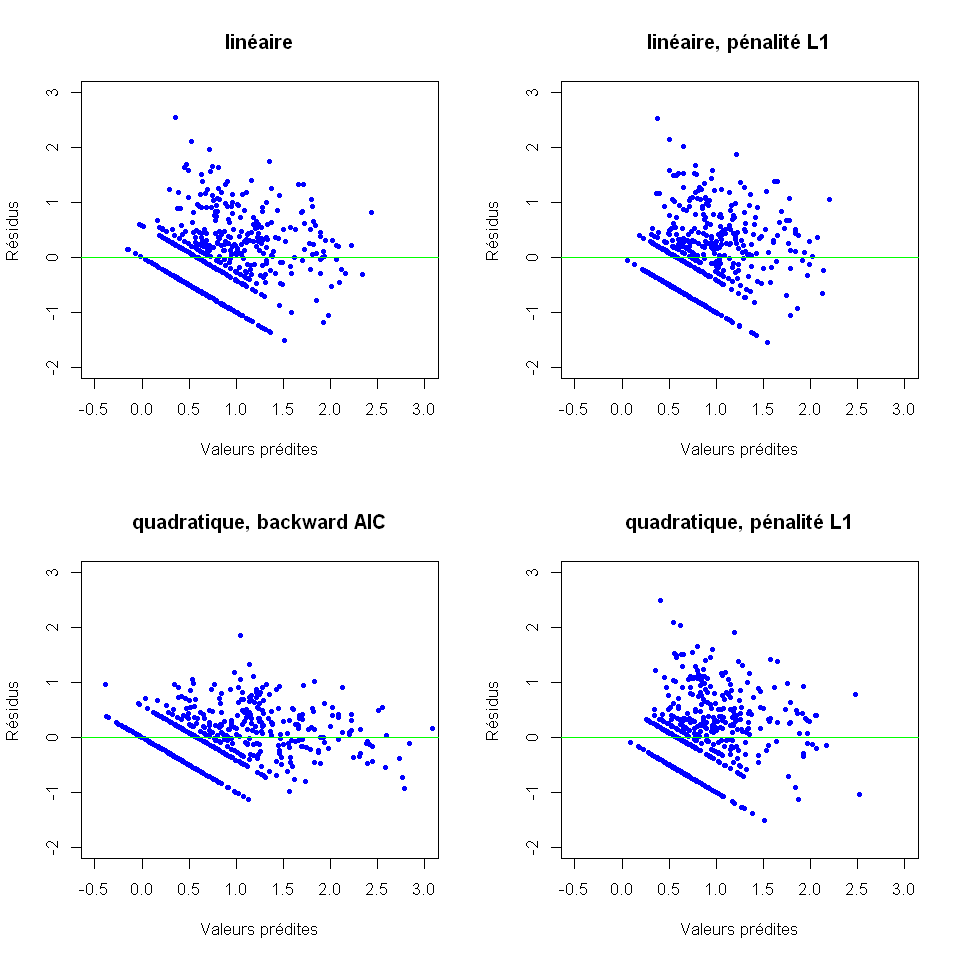

In [57]:
# Extraction des valeurs ajust√©es et des r√©sidus
fit.glm.step <- reg.glm.step$fitted.values
res.glm.step <- reg.glm.step$residuals
fit.lasso2 <- predict(reg.lasso2.cv, s = "lambda.min", newx = x.mat2)
res.lasso2 <- datappr$rain_mod  - fit.lasso2

# Graphe des r√©sidus
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow = c(2, 2))
plot.res(fit.lm, res.lm, "lin√©aire")
plot.res(fit.lasso, res.lasso, "lin√©aire, p√©nalit√© L1")
plot.res(fit.glm.step, res.glm.step, "quadratique, backward AIC")
plot.res(fit.lasso2, res.lasso2, "quadratique, p√©nalit√© L1")

 On remarque que la pr√©sence de certains interactions ou variables sont pertinentes au sens du crit√®re d'Aka√Øke mais pas significative au sens du test de Fisher. Cette pr√©sence dans le mod√®le pourrait √™tre plus finement analys√©e en consid√©rant une estimation de l'erreur par validation crois√©e. L'id√©e serait de retirer une √† une les variables ou interactions les moins significatives pour voir comment se comporte la validation crois√©e. D'autre part, si la proc√©dure pas-√†-pas conduit √† un mod√®le diff√©rent, l'estimation de l'erreur par validation crois√©e permet √©galement d'optimiser le choix.
 
Ces raffinements ne s'av√®rent pas efficaces sur ces donn√©es. Le mod√®le obtenu par minimisaiton du crit√®re AIC est conserv√©.

### Pr√©vision de l'√©chantillon test

Le mod√®le "optimal" obtenu par la m√©thode stepwise est utilis√© pour pr√©dire l'√©chantillon test et estimer ainsi, sans biais, une erreur de pr√©vision. Deux erreurs sont estim√©es ; la premi√®re est celle quadratique pour la r√©gression tandis que la deuxi√®me est issue de la matrice de confusion qui croise les d√©passements de seuils pr√©dits avec ceux effectivement observ√©s. 

#### Erreur de r√©gression

In [58]:
# MSE sur l'√©chantillon d'apprentissage
#---------------------------------------------------
paste("Mod√®le quadratique sans s√©letion:", mean(reg.glm$residuals^2)) #res = r√©didus
paste("Mod√®le quadratique s√©lection AIC:",mean(res.glm.step^2))
paste("Mod√®le quadratique s√©lection LASSO lambda_min:", mean(res.lasso2^2))

[1] "Mod√®le quadratique sans s√©letion: 0.160164707963044"

[1] "Mod√®le quadratique s√©lection AIC: 0.196772327840522"

[1] "Mod√®le quadratique s√©lection LASSO lambda_min: 0.385824884893422"

In [59]:
#erreur de g√©n√©ralisation  = MSE sur l'√©chantillon de test
#-----------------------------------------------------------
#nouvelle x.mat mais avec l'echantillon de test :
x.mat2.pred <- model.matrix(rain_mod ~ .^2 - 1, data = datestr)
#pr√©diction mod√®le quadratique simple (sans  s√©lection de variables) avec √©chantillon de test :
fit.glm.pred <- predict(reg.glm, newdata = datestr) #fit = valeurs ajust√©es
#pr√©diction mod√®le quadratique s√©lection backward AIC avec √©chantillon de test :
fit.glm.step.pred <- predict(reg.glm.step, newdata = datestr) 
#pr√©diction mod√®le quadratique lasso lambda.min avec √©chantillon de test :
fit.glm.lasso.pred <- predict(reg.lasso2.cv, newx = x.mat2.pred)

# Erreur quadratique moyenne de pr√©vision (MSE)
paste("Mod√®le quadratique sans s√©letion:", sum((fit.glm.pred - datestr[, "rain_mod"])^2) / nrow(datestr))
paste("Mod√®le quadratique s√©lection AIC:",sum((fit.glm.step.pred - datestr[, "rain_mod"])^2) / nrow(datestr))
paste("Mod√®le quadratique s√©lection LASSO lambda_min:",sum((fit.glm.lasso.pred - datestr[, "rain_mod"])^2) / nrow(datestr))

[1] "Mod√®le quadratique sans s√©letion: 0.958622293803285"

[1] "Mod√®le quadratique s√©lection AIC: 0.749314504723508"

[1] "Mod√®le quadratique s√©lection LASSO lambda_min: 0.440824429770285"

In [60]:
# Erreur quadratique par AROME
sum((datestr[,"tp_arome_mod"] - datestr[,"rain_mod"])^2) / nrow(datestr)

[1] 4.107378

<FONT COLOR = "blue"> L'erreur quadrarique est beaucoup plus grande pour le mod√®le AROME. Cela montre que le mod√®le statistique am√©liore bien la pr√©diction. 

#### Erreur de classification (matrice de confusion)

<FONT COLOR = "blue"> Passage de la regression √† la classification :

In [61]:
fit.glm.pred.C = table(RegToClassif(fit.glm.pred), datestq[, "rain_class"])
fit.glm.step.pred.C = table(RegToClassif(fit.glm.step.pred), datestq[, "rain_class"])
fit.glm.lasso.pred.C = table(RegToClassif(fit.glm.lasso.pred), datestq[, "rain_class"])

print("--- Table de contingence Mod√®le quadratique sans s√©letion")
fit.glm.pred.C 
print("--- Table de contingence Mod√®le quadratique s√©lection AIC")
fit.glm.step.pred.C
print("--- Table de contingence Mod√®le quadratique s√©lection LASSO lambda_min")
fit.glm.lasso.pred.C 

paste("Purity Mod√®le quadratique sans s√©letion:", purity(fit.glm.pred.C))
paste("Purity Mod√®le quadratique s√©lection AIC:",purity(fit.glm.step.pred.C))
paste("Purity Mod√®le quadratique s√©lection LASSO lambda_min:", purity(fit.glm.lasso.pred.C))

[1] "--- Table de contingence Mod√®le quadratique sans s√©letion"


           
            high_rain low_rain no_rain
  high_rain        17       15       9
  low_rain         17       42      17
  no_rain           2        6      13

[1] "--- Table de contingence Mod√®le quadratique s√©lection AIC"


           
            high_rain low_rain no_rain
  high_rain        16       13       6
  low_rain         18       45      24
  no_rain           2        5       9

[1] "--- Table de contingence Mod√®le quadratique s√©lection LASSO lambda_min"


           
            high_rain low_rain no_rain
  high_rain         8        4       1
  low_rain         28       59      38

[1] "Purity Mod√®le quadratique sans s√©letion: 0.521739130434783"

[1] "Purity Mod√®le quadratique s√©lection AIC: 0.507246376811594"

[1] "Purity Mod√®le quadratique s√©lection LASSO lambda_min: 0.485507246376812"

In [182]:
# Erreur de discrimiation pour AROME
pred.arome.C = table(RegToClassif(datestq[,"tp_arome_mod"]),datestq[, "rain_class"])
paste("Purity mod√®le arome en classification:", purity(pred.arome.C))
paste ("F1-Score mod√®le arome en classification:",F1_Score(RegToClassif(datestq[,"tp_arome_mod"]),datestq[, "rain_class"]))
pred.arome.C

[1] "Purity mod√®le arome en classification: 0.434782608695652"

[1] "F1-Score mod√®le arome en classification: 0.522522522522523"

           
            high_rain low_rain no_rain
  high_rain        29       32      14
  low_rain          7       31      25

## [Pr√©vision par mod√®le binomial](http://wikistat.fr/pdf/st-m-app-rlogit.pdf)

Plut√¥t que de pr√©voir la concentration puis le d√©passement, on peut se poser la question de savoir s'il ne serait pas pertinent de pr√©voir directement la pr√©sence ou l'absence d'un d√©passement. La variable √† mod√©liser √©tant binaire, c'est la r√©gression logistique qui va √™tre employ√©e. Comme pour la r√©gression, diff√©rentes strat√©gies de choix de mod√®le peuvent √™tre utilis√©es et compar√©es avant d'estimer l'erreur de pr√©vision sur l'√©chantillon test.

### R√©gression logistique sans interaction

<FONT COLOR = "blue"> La variable √† expliquer est ici **rain_class** qui est *qualitative* et poss√®de 3 modalit√©s. Ce n'est donc pas une variable binaire. Pour expliquer une variable *qualitative*, on utilise la **r√©gression logistique**. Or, comme la variable n'est pas binaire, il faut utiliser la **regression logistique multiclasses** qui estime un mod√®le par classe: une classe contre les autres. 
On utilise alors la fonction **multinom** du package **nnet** qui ne n√©cessite pas que les donn√©es soient reshape au contraire d'autres packages qui font aussi de la regression multinomiale. 
    
<FONT COLOR = "blue"> *Documentation regression logistique multiclasse*: https://stats.oarc.ucla.edu/r/dae/multinomial-logistic-regression/

In [62]:
#On choisit la modalit√© de rain_class que nous souhaitons utiliser comme r√©f√©rence en utilisant relevel
#relevel r√©ordonne les niveaux d'un facteur de sorte que le niveau sp√©cifi√© par ref soit le premier 
datappq$rain_class <- relevel(datappq$rain_class, ref = "high_rain") 

#rq : ici high_rain √©tait d√©j√† la premi√®re modalit√© mais utile dans d'autres cas
#rq : utiliser datappq$rain_class2 <- relevel(datappq$rain_class, ref = "high_rain") pour ne pas modifier les data 
#mais cr√©e une colonne suppl√©mentaire dans datappq.

In [63]:
#multinom n'inclut pas le calcul des p-valeurs pour les coefficients de r√©gression
#on les calcule en utilisant les tests de Wald (ici les tests z).

# estimation du mod√®le complet
log.lm <- multinom(rain_class ~ . , data = datappq,trace = FALSE)

In [64]:
summary(log.lm)

Call:
multinom(formula = rain_class ~ ., data = datappq, trace = FALSE)

Coefficients:
         (Intercept) dateavril dated√©cembre datef√©vrier datejanvier datejuillet
low_rain    -291.799 0.1828411   -0.6000509   0.1846116  -1.3178178  -0.2776646
no_rain     -132.490 0.5636089   -0.9806437   0.6767098   0.0503748  -0.1213859
           datejuin    datemai   datemars datenovembre dateoctobre
low_rain -0.1892691  0.2089057 -0.3134838   -1.0912696 0.057825462
no_rain  -0.3456192 -0.3382612  0.5034654   -0.6161332 0.003086649
         dateseptembre     ff_mod     t_mod     td_mod        hu      dd_mod
low_rain   -0.02113274 -0.6552865  85.66698  -86.80911 0.5102139  0.07128176
no_rain    -0.11128825 -1.2483252 118.01552 -102.61279 0.6039818 -0.09247725
         precip_mod ws_arome_mod p3031_arome_mod   u10_arome  v10_arome
low_rain -0.3640035    0.9146812     -0.20056575 -0.09091273 -0.1078304
no_rain  -0.8415732    2.0490674      0.04804126 -0.27966316 -0.2327718
         t2m_arome_mod 

In [65]:
#significativit√© des param√®tres
#fait le calcul √† la main des p-valeurs :
z <- summary(log.lm)$coefficients/summary(log.lm)$standard.errors #statistique de Test observ√©e (Student)
#utilise la fonction de r√©patition pour le calcul de la p-valeur :
#p <- 2*(1 - pnorm(abs(z), 0, 1)); p

deg_f = nrow(datappq)-1 #n-1 degr√©s de libert√©
p <- 2*(1- pt(abs(z), deg_f)); p

(Intercept) dateavril dated√©cembre datef√©vrier datejanvier datejuillet
low_rain 0           0.8227870 0.4965925    0.8289867   0.1543700   0.6692648  
no_rain  0           0.5171151 0.3272565    0.4735634   0.9592122   0.8616535  
         datejuin  datemai   datemars  datenovembre ... precip_mod 
low_rain 0.7639777 0.7502687 0.6972311 0.1604043    ... 0.190922567
no_rain  0.6261667 0.6463067 0.5606647 0.4642843    ... 0.007103257
         ws_arome_mod p3031_arome_mod u10_arome  v10_arome   t2m_arome_mod
low_rain 0.4631054    0.2575655       0.39844149 0.083107310 0            
no_rain  0.1345303    0.7955748       0.02469396 0.000655281 0            
         d2m_arome_mod r_arome_mod tp_arome_mod msl_arome_mod
low_rain 0             0           0.09790644   0            
no_rain  0             0           0.10080696   0

<FONT COLOR = "blue"> Concernant le calcul des p-valeurs : On fait un test de student de nullit√© des param√®tres $H_0 : \theta_i = 0 ~/~ H_1 : \theta_i \ne 0$. Si on se place dans le cas asymptotique (pour n assez grand) la loi de Student CV vers la loi Normale donc on peut utiliser `p <- 2*(1- pt(abs(z), deg_f))` pour la loi de student ou `p <- 2*(1- pnorm(abs(z), deg_f))]` pour la loi Normale. 

In [66]:
# Recherche d'un mod√®le optimal au sens d'Aka√Øke
log.lm.step<- step(log.lm, direction = "backward",trace = FALSE)

trying - date 
trying - ff_mod 
trying - t_mod 
trying - td_mod 
trying - hu 
trying - dd_mod 
trying - precip_mod 
trying - ws_arome_mod 
trying - p3031_arome_mod 
trying - u10_arome 
trying - v10_arome 
trying - t2m_arome_mod 
trying - d2m_arome_mod 
trying - r_arome_mod 
trying - tp_arome_mod 
trying - msl_arome_mod 
trying - ff_mod 
trying - t_mod 
trying - td_mod 
trying - hu 
trying - dd_mod 
trying - precip_mod 
trying - ws_arome_mod 
trying - p3031_arome_mod 
trying - u10_arome 
trying - v10_arome 
trying - t2m_arome_mod 
trying - d2m_arome_mod 
trying - r_arome_mod 
trying - tp_arome_mod 
trying - msl_arome_mod 
trying - t_mod 
trying - td_mod 
trying - hu 
trying - dd_mod 
trying - precip_mod 
trying - ws_arome_mod 
trying - p3031_arome_mod 
trying - u10_arome 
trying - v10_arome 
trying - t2m_arome_mod 
trying - d2m_arome_mod 
trying - r_arome_mod 
trying - tp_arome_mod 
trying - msl_arome_mod 
trying - t_mod 
trying - td_mod 
trying - hu 
trying - precip_mod 
trying - ws_ar

In [67]:
summary(log.lm.step)

Call:
multinom(formula = rain_class ~ t_mod + td_mod + hu + precip_mod + 
    ws_arome_mod + p3031_arome_mod + u10_arome + v10_arome + 
    t2m_arome_mod + d2m_arome_mod + r_arome_mod + tp_arome_mod + 
    msl_arome_mod, data = datappq, trace = FALSE)

Coefficients:
         (Intercept)    t_mod    td_mod        hu precip_mod ws_arome_mod
low_rain   -255.2382 52.07683 -51.84422 0.3015547 -0.3222384    0.2811991
no_rain     -98.6577 84.61613 -69.24379 0.4071720 -0.9581697    0.8277464
         p3031_arome_mod   u10_arome  v10_arome t2m_arome_mod d2m_arome_mod
low_rain     -0.15854084 -0.09235061 -0.1110995     -350.4098      96.42051
no_rain      -0.07419556 -0.24294925 -0.2126419     -433.5197     101.77966
         r_arome_mod tp_arome_mod msl_arome_mod
low_rain   -9.961075    0.1778376      86.91969
no_rain   -11.053518    0.2562815      90.61585

Std. Errors:
         (Intercept)    t_mod   td_mod         hu precip_mod ws_arome_mod
low_rain   0.1392365 2.251446 1.720615 0.03894140  

<FONT COlOR = "blue"> Avec le crit√®re AIC, les variables **date**,**ff_mod** et **dd_mod** ont √©t√© enlev√©es. 

In [68]:
# Mod√®le obtenu : 
z.step <- summary(log.lm.step)$coefficients/summary(log.lm.step)$standard.errors #statistique de test observ√©e
deg_f = nrow(datappq)-1 #n-1 degr√©s de libert√©
p.step <- 2*(1- pt(abs(z.step), deg_f)); p.step #calcul des p-valeurs √† la main avec la fonction de r√©partition 

(Intercept) t_mod td_mod hu           precip_mod  ws_arome_mod
low_rain 0           0     0      4.662937e-14 0.227763251 0.51496988  
no_rain  0           0     0      0.000000e+00 0.001434811 0.06726256  
         p3031_arome_mod u10_arome  v10_arome    t2m_arome_mod d2m_arome_mod
low_rain 0.05725294      0.37305108 0.0511764172 0             0            
no_rain  0.40415141      0.04019452 0.0006079851 0             0            
         r_arome_mod tp_arome_mod msl_arome_mod
low_rain 0           0.15217152   0            
no_rain  0           0.07069887   0

<FONT COlOR = "blue"> On calcule alors les valeurs pr√©dites $\hat Y$ de notre mod√®le simplifi√© par le crit√®re AIC. Pour chaque individu on a les 3 probabilit√©s d'obtenir les modalit√©s **high_rain, low_rain, no_rain**. On d√©cide d'attribuer √† chaque individu la modalit√© ayant la plus forte probabilit√©. 

In [69]:
head(log.lm.step$fitted.values) #valeurs pr√©dites par le mod√®le.
Y_hat = matrix(, nrow = nrow(datappq), ncol = 0)#initialisation matrice vide

#On associe √† Y_hat la modalit√© ayant la plus grande proba :
#(Je n'ai pas r√©ussi √† faire cette fonction sans boucle)
for (i in 1:nrow(datappq)){
    Y_hat [i] = names(which.max(log.lm.step$fitted.values[i,])) 
}
head(Y_hat)

high_rain  low_rain  no_rain  
1 0.16740713 0.4402911 0.3923018
2 0.73443919 0.1332840 0.1322768
3 0.18995941 0.5949270 0.2151136
4 0.06805979 0.5299883 0.4019519
5 0.29235292 0.4249881 0.2826590
6 0.06992985 0.3639257 0.5661445

[1] "low_rain"  "high_rain" "low_rain"  "low_rain"  "low_rain"  "no_rain"

<FONT COlOR = "blue"> En fait la fonction ci-dessous fait exatement la m√™me chose : 

In [186]:
#remplacer "class" par "probs" si on veut les probas d'appartenance √† chaque classe.
# pr√©diction sur l'√©chantillon d'apprentissage
pred.appr <- predict(log.lm.step, newdata = datappq, type = "class") 
 #pr√©diction sur l'√©chantillon de test 
pred.test <- predict(log.lm.step, newdata = datestq, type = "class") 

In [187]:
# matrice de confusion de l'√©chantillon d'apprentissage et erreur apparente
T.log.lm.appr = table(pred.appr, datappq[, "rain_class"])
T.log.lm.appr

           
pred.appr   high_rain low_rain no_rain
  high_rain        86       32      15
  low_rain         55      153      74
  no_rain          11       44      80

<FONT COlOR = "blue"> Pour la matrice de confusion, les lignes repr√©sentent la classe pr√©dite et les colonnes la classe r√©elle. </font> 
  
<FONT COlOR = "blue"> Commentaire : 

- <FONT COlOR = "blue"> Pour la pr√©diction de no_rain on voit que le mod√®le n'est pas tr√®s bon : il se trompe une fois sur deux et pr√©dit low_rain au lieu de no_rain. 
    
- <FONT COlOR = "blue"> Pour la pr√©diction de low_rain le mod√®le a l'air un peu meilleur, dans environ 67% des cas il fournit la bonne pr√©diction. 
    
- <FONT COlOR = "blue"> Pour la pr√©diction de high_rain le mod√®le se trompe aussi presque une fois sur deux et semble faire en particulier des errreurs en pr√©disant low_rain au lieu de high_rain.
  
<FONT COlOR = "blue"> **Attention** : il s'agit de la matrice de confusion pour l'√©chantillon **d'apprentissage**    

In [188]:
# matrice de confusion de l'√©chantillon de test 
T.log.lm.test = table(pred.test, datestq[, "rain_class"])
T.log.lm.test

           
pred.test   high_rain low_rain no_rain
  high_rain        18       11       3
  low_rain         17       35      16
  no_rain           1       17      20

In [73]:
paste("Purity regression logistique sans int√©raction sur √©chantillon apprentissage : ",purity(T.log.lm.appr))
paste("Purity regression logistique sans int√©raction sur √©chantillon test : ",purity(T.log.lm.test))

[1] "Purity regression logistique sans int√©raction sur √©chantillon apprentissage :  0.58"

[1] "Purity regression logistique sans int√©raction sur √©chantillon test :  0.528985507246377"

In [189]:
paste("F1-score regression logistique sans int√©raction sur √©chantillon test : ",F1_Score(pred.test, datestq[, "rain_class"]))

[1] "F1-score regression logistique sans int√©raction sur √©chantillon test :  0.529411764705882"

### R√©gression logistique avec interactions

Avec autant de variables et d'interactions donc de param√®tres, l'estimation du mod√®le complet de r√©gression logistique  rencontre des soucis et affiche des *warnings* car certaines probabilit√© trop bien ajust√©s (0 ou 1) provoquent des divisions par 0. Ici une proc√©dure *forward* ou  mieux *stepwise* de s√©lection des variables et interactions  conduit √† des r√©sultats raisonnables. Une m√©thode avec p√©nalisation L1 peut aussi √™tre utilis√©e.

In [74]:
# r√©gression avec le mod√®le minimum
log.qm <-  multinom(rain_class ~ 1, data = datappq,trace = FALSE)

log.qm.step1 <- step(log.qm, direction = "both",
    scope = list(lower = ~1, upper = ~(date + ff_mod + t_mod + td_mod + hu 
    + dd_mod + ws_arome_mod + p3031_arome_mod + u10_arome + v10_arome 
    + t2m_arome_mod + d2m_arome_mod + r_arome_mod + tp_arome_mod + msl_arome_mod)^2),trace = FALSE)
#fait une s√©lection de variables par minimisation de l'AIC en partant du mod√®le constant
#ajoute apr√®s a chaque fois une variable qui permet de moins faire augmenter l'aic
#en les choisissant parmi les variables pass√©es en param√®tres de scope. 

trying + date 
trying + ff_mod 
trying + t_mod 
trying + td_mod 
trying + hu 
trying + dd_mod 
trying + ws_arome_mod 
trying + p3031_arome_mod 
trying + u10_arome 
trying + v10_arome 
trying + t2m_arome_mod 
trying + d2m_arome_mod 
trying + r_arome_mod 
trying + tp_arome_mod 
trying + msl_arome_mod 
trying - msl_arome_mod 
trying + date 
trying + ff_mod 
trying + t_mod 
trying + td_mod 
trying + hu 
trying + dd_mod 
trying + ws_arome_mod 
trying + p3031_arome_mod 
trying + u10_arome 
trying + v10_arome 
trying + t2m_arome_mod 
trying + d2m_arome_mod 
trying + r_arome_mod 
trying + tp_arome_mod 
trying - msl_arome_mod 
trying - u10_arome 
trying + date 
trying + ff_mod 
trying + t_mod 
trying + td_mod 
trying + hu 
trying + dd_mod 
trying + ws_arome_mod 
trying + p3031_arome_mod 
trying + v10_arome 
trying + t2m_arome_mod 
trying + d2m_arome_mod 
trying + r_arome_mod 
trying + tp_arome_mod 
trying + u10_arome:msl_arome_mod 
trying - msl_arome_mod 
trying - u10_arome 
trying - t_mod 
try

In [75]:
summary(log.qm.step1)

Call:
multinom(formula = rain_class ~ msl_arome_mod + u10_arome + t_mod + 
    hu + v10_arome + ws_arome_mod + p3031_arome_mod, data = datappq, 
    trace = FALSE)

Coefficients:
         (Intercept) msl_arome_mod   u10_arome    t_mod           hu  v10_arome
low_rain   -1115.807      91.03067 -0.07076127 4.043951  0.009368392 -0.1192497
no_rain    -1297.617     108.64542 -0.25020991 2.903990 -0.034750407 -0.1744819
         ws_arome_mod p3031_arome_mod
low_rain    0.5301426     -0.16391580
no_rain     0.7579790     -0.07469876

Std. Errors:
         (Intercept) msl_arome_mod u10_arome     t_mod         hu  v10_arome
low_rain   0.1203634      1.409228 0.1025613 0.9358040 0.01716911 0.05527672
no_rain    0.1252676      1.472449 0.1143971 0.9778498 0.01800798 0.05905196
         ws_arome_mod p3031_arome_mod
low_rain    0.3942749      0.08296667
no_rain     0.4089925      0.08732499

Residual Deviance: 994.7694 
AIC: 1026.769 

In [76]:
# p-valeurs : 
z.step1 <- summary(log.qm.step1)$coefficients/summary(log.qm.step1)$standard.errors #statistique de test observ√©e
deg_f = nrow(datappq)-1 #n-1 degr√©s de libert√©
p.step1 <- 2*(1- pt(abs(z.step1), deg_f)); p.step1 #calcul des p-valeurs √† la main avec la fonction de r√©partition 

#anova(log.qm.step1, test = "Chisq")

(Intercept) msl_arome_mod u10_arome  t_mod        hu        
low_rain 0           0             0.49052280 1.841137e-05 0.58552556
no_rain  0           0             0.02914863 3.110496e-03 0.05415609
         v10_arome   ws_arome_mod p3031_arome_mod
low_rain 0.031413784 0.17930919   0.04869108     
no_rain  0.003263815 0.06437805   0.39269678

<FONT COLOR = "blue"> On voit ici que l'on a bien simplifi√© le mod√®le. Il ne reste plus que 7 variables sur 16. 

### Pr√©vision de l'√©chantillon test

#### Matrice de confusion

In [77]:
# Pr√©vision du mod√®le quadratique
pred.log <- predict(log.qm.step1, newdata = datestq, type = "class")
head(pred.log)

[1] low_rain  high_rain low_rain  high_rain no_rain   no_rain  
Levels: high_rain low_rain no_rain

In [78]:
# Matrice de confusion de l'√©chantillon TEST
table(pred.log, datestq[, "rain_class"])

           
pred.log    high_rain low_rain no_rain
  high_rain        16       10       4
  low_rain         18       40      20
  no_rain           2       13      15

In [190]:
paste("Purity regression logistique avec int√©raction sur √©chantillon test : ",purity(table(pred.log, datestq[, "rain_class"])))
paste("F1-Score regression logistique avec int√©raction sur √©chantillon test : ",F1_Score(pred.log, datestq[, "rain_class"]))

[1] "Purity regression logistique avec int√©raction sur √©chantillon test :  0.514492753623188"

[1] "F1-Score regression logistique avec int√©raction sur √©chantillon test :  0.484848484848485"

Comparer avec l'approche pr√©c√©dente. M√©moriser les r√©sultats obtenus pour comparer avec les autres m√©thodes.

- <FONT COLOR = "blue"> Pour la pr√©diction de no_rain on voit que le mod√®le n'est pas tr√®s bon : il se trompe une fois sur deux et pr√©dit low_rain au lieu de no_rain. 
    
- <FONT COLOR = "blue"> Pour la pr√©diction de low_rain le mod√®le a l'air un peu meilleur, dans environ 63% des cas il fournit la bonne pr√©diction.

- <FONT COLOR = "blue"> Pour la pr√©diction de high_rain le mod√®le se trompe un peu plus d'une fois sur deux en pr√©disant low_rain au lieu de high_rain. Cependant compar√© √† la matrice de confusion pr√©c√©dente on voit qu'il y a moins d'erreurs avec no_rain.
    
<FONT COLOR = "blue"> En conclusion on observe les m√™mes erreurs que sur la matrice de confusion pr√©c√©dente. Le mod√®le n'a pas vraiment √©t√© am√©lior√© except√© sur le fait qu'il fasse moins d'erreurs en pr√©disant no_rain quand on est dans le cas o√π en r√©alit√© on observe high_rain. 

#### Comparaison entre classification et r√©gression transform√©e en classification

<font color = "blue"> Nous allons comparer les indices de puret√© et le F1_score entre les m√©thode de regression lin√©aire et r√©gression quadratique transform√©es en classes et la regression logistique. 
 Ces r√©sultats sont calcul√©s pour l'√©chantillon de TEST.

In [80]:
#Comparaison puret√© sur l'√©chantillon de TEST
#--------------------------------------------------
paste("Purity Mod√®le lin√©aire sans s√©letion:", purity(fit.lm.pred.C))
paste("Purity LASSO avec lambda.min:",purity(fit.lasso.pred.C))
paste("Purity LASSO avec lambda.1se:", purity(fit.lasso.1se.pred.C))

paste("Purity Mod√®le quadratique sans s√©letion:", purity(fit.glm.pred.C))
paste("Purity Mod√®le quadratique s√©lection AIC:",purity(fit.glm.step.pred.C))
paste("Purity Mod√®le quadratique s√©lection LASSO lambda_min:", purity(fit.glm.lasso.pred.C))

paste("Purity regression logistique sans int√©raction sur √©chantillon test : ",purity(T.log.lm.test))
paste("Purity regression logistique avec int√©raction sur √©chantillon test : ",purity(table(pred.log, datestq[, "rain_class"])))

[1] "Purity Mod√®le lin√©aire sans s√©letion: 0.521739130434783"

[1] "Purity LASSO avec lambda.min: 0.492753623188406"

[1] "Purity LASSO avec lambda.1se: 0.485507246376812"

[1] "Purity Mod√®le quadratique sans s√©letion: 0.521739130434783"

[1] "Purity Mod√®le quadratique s√©lection AIC: 0.507246376811594"

[1] "Purity Mod√®le quadratique s√©lection LASSO lambda_min: 0.485507246376812"

[1] "Purity regression logistique sans int√©raction sur √©chantillon test :  0.528985507246377"

[1] "Purity regression logistique avec int√©raction sur √©chantillon test :  0.514492753623188"

In [81]:
#Comparaison du F1_score
#----------------------------------------------
paste("F1_Score Mod√®le lin√©aire sans s√©letion :",F1_Score(RegToClassif(fit.lm.pred),datestq[, "rain_class"])) 
paste("F1_Score LASSO avec lambda.min :",F1_Score(RegToClassif(fit.lasso.pred),datestq[, "rain_class"]))  
paste("F1_Score  LASSO avec lambda.1se :",F1_Score(RegToClassif(fit.lasso.1se.pred),datestq[, "rain_class"]))  

paste("F1_Score Mod√®le quadratique sans s√©letion :",F1_Score(RegToClassif(fit.glm.pred),datestq[, "rain_class"]))  
paste("F1_Score Mod√®le quadratique s√©lection :",F1_Score(RegToClassif(fit.glm.step.pred),datestq[, "rain_class"]))  
paste("F1_Score  Mod√®le quadratique s√©lection LASSO lambda_min :",F1_Score(RegToClassif(fit.glm.lasso.pred),datestq[, "rain_class"]))  

paste("F1_Score regression logistique sans int√©raction sur √©chantillon tes :",F1_Score(pred.test,datestq[, "rain_class"]))
paste("F1_Score regression logistique avec int√©raction sur √©chantillon test  :",F1_Score(pred.log,datestq[, "rain_class"]))

[1] "F1_Score Mod√®le lin√©aire sans s√©letion : 0.464285714285714"

[1] "F1_Score LASSO avec lambda.min : 0.407407407407407"

[1] "F1_Score  LASSO avec lambda.1se : 0.326530612244898"

[1] "F1_Score Mod√®le quadratique sans s√©letion : 0.441558441558441"

[1] "F1_Score Mod√®le quadratique s√©lection : 0.450704225352113"

[1] "F1_Score  Mod√®le quadratique s√©lection LASSO lambda_min : 0.326530612244898"

[1] "F1_Score regression logistique sans int√©raction sur √©chantillon tes : 0.529411764705882"

[1] "F1_Score regression logistique avec int√©raction sur √©chantillon test  : 0.484848484848485"

#### [Courbe ROC](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf)

Il est √©galement possible de construire une courbe ROC en association de la pr√©vision obtenue √† partir d'un mod√®le gaussien. En effet, la variation du seuil th√©orique de d√©passement (150) va faire varier les proportions respectives des taux de vrais et faux positifs. Cela revient encore √† faire varier le seuil d'une "proba" pour les valeurs de pr√©visions divis√©es par 300.

 <FONT COLOR = "Blue"> **Probl√®me** : La courbe ROC est utilis√© que pour la classification binaire et nous on a 3 classes. On ne l'impl√©mente pas ici. 

# <FONT COLOR="Red">√âpisode 2</font>

## [Analyse discriminante](http://wikistat.fr/pdf/st-m-app-add.pdf)

### Introduction

 L'objectif est de comparer les trois m√©thodes d'analyses discriminantes disponibles dans R: `lda` param√©trique lin√©aire (homosc√©dasticit√©), `qda` param√©trique quadratique (h√©t√©rosc√©dasticit√©) sous hypoth√®se gaussienne et celle non-param√©trique des $k$ plus proches voisins.
 
**Q** Quel crit√®re d'affectation est utilis√© en `lda`?

<FONT COLOR = "blue"> En **lda**, le crit√®re utilis√© est la r√®gle de Bayes. </font>

**Q** Que signifient les hypoth√®ses d'homo ou d'h√©t√©rosc√©dasticit√©?
<FONT COLOR = "blue">
- Hypoth√®se d'homosc√©dasticit√© : On suppose que les r√©sidus $\epsilon_i$ ont la m√™me variance. 
- A l'inverse l'h√©t√©rosc√©dasticit√© caract√©rise des r√©sidus qui n'ont pas la m√™me variance. Parmi les cas pathologiques on peut notamment citer la forme en trompette : lorsque l'on trace le nuage de points des r√©sidus on observe une forme de trompette qui signifie que la variance augmente selon l'entr√©e. </font>

**Q** Quelle fonction est estim√©e "non param√©triquement" par l'algorithme des $k$ plus proches voisins?

<FONT COLOR = "blue"> L'algorithme des $k$ plus proches voisins sert √† estimer la r√®gle de d√©termination. Etant donn√© un √©chantillon d'apprentissage $\{(X_1,Y_1),...,(X_n,Y_n)\}$, on veut pr√©dire la sortie Y associ√©e √† une nouvelle entr√©e x. On fixe un entier **k** et on d√©termine les $k$ plus proches voisins  de l'observation x, not√©s $\{X_{(1)},...,X_{(k)}\}$. 
- Dans le cas de la regression : x est pr√©dit par la moyenne des observations $\{Y_{(1)},...,Y_{(k)}\}$ correspondants aux $k$ plus proches voisins. 
- Dans le cas de la classification : x est pr√©dit par vote majoritaire, c'est-√†-dire qu'on lui attribue la classe majoritairement pr√©sente parmi les observations $\{Y_{(1)},...,Y_{(k)}\}$.
</font>    
*Attention*, ces techniques n'acceptent par principe que des variables explicatives ou pr√©dictives quantitatives. N√©anmoins, une variable qualitative √† deux modalit√©s, par exemple le type de jour, peut √™tre consid√©r√©e comme quantitative sous la forme d'une fonction indicatrice prenant ses valeurs dans $\{0, 1\}$ et, de fa√ßon plus "abusive", une variable ordinale est consid√©r√©e comme "r√©elle". Dans ce dernier cas, il ne faut pas tenter d'interpr√©ter les fonctions de discrimination, juste consid√©rer des erreurs de pr√©vision. La variable *Station* n'est pas prise en compte.

La biblioth√®que standard de R (`MASS`) pour l'analyse discriminante ne propose pas de proc√©dure automatique de choix de variable mais, dans cet exemple, les variables sont peu nombreuses.

### Estimation des mod√®les

In [82]:
# analyse discriminante lin√©aire
disc.lda=lda(datappq$rain_class~.,data=datappq[,-17])
# -17 : enlever la variable √† expliquer : rain_class

# analyse discriminante quadratique 
disc.qda=qda(datappq$rain_class~.,data=datappq[,-17]) 

# k plus proches voisins
disc.knn=knn(datappq[,c(-1,-17)],datappq[,c(-1,-17)],datappq$rain_class,k=10)
# -1 : enlever la variable qualitative date

Noter le manque d'homog√©n√©it√© des commandes de R issues de librairies diff√©rentes. L'indice de colonne n√©gatif ($-17$) permet de retirer la colonne contenant la variable √† pr√©dire de type facteur. Celle-ci est mentionn√©e en troisi√®me param√®tre pour les donn√©es d'apprentissage. La librairie [caret](http://topepo.github.io/caret/index.html) contourne ces difficult√©s en englobant toutes les librairies d'apprentissage et en homog√©n√©isant les appels pour l'estimation et la pr√©vision des mod√®les. 

### Estimation de l'erreur de pr√©vision par validation crois√©e

In [83]:
# erreur par validation crois√©e  en analyse discriminante lin√©aire
disc.lda=lda(datappq$rain_class~.,data=datappq[,-17],CV=T) 
#CV : leave-one-out cross-validation
# estimer le taux d'erreur √† partir de la matrice de confusion
table(datappq[,"rain_class"],disc.lda$class) 
#print(table/(sum))

           
            high_rain low_rain no_rain
  high_rain        82       53      17
  low_rain         28      153      48
  no_rain          17       77      75

<FONT COLOR = "blue"> **Analyse de la table de confusion :** Quand la variable observ√©e est : 
- **high_rain** : La pr√©diction est bonne dans 65% des cas
- **low_rain** : La pr√©diction est bonne dans 54% des cas, le mod√®le se trompe donc presque une fois sur deux.
- **no_rain** : La pr√©diction est bonne dans 53% des cas, le mod√®le se trompe donc presque une fois sur deux.
    
On en d√©duit que le mod√®le obtenu par la **lda** parvient relativement bien √† pr√©dire les fortes pluies, mais il est beaucoup moins bon sur la pr√©diction des pluies faibles ou inexistantes. On remarque que finalement les modalit√©s **low_rain** et **no_rain** sont assez confondues puisque c'est entre ces deux l√† que le mod√®le se trompe souvent pour la pr√©diction.
</font> 

In [84]:
# analyse discriminante quadratique
disc.qda=qda(datappq$rain_class~.,data=datappq[,-17],CV=T)  
table(datappq[,"rain_class"],disc.qda$class) 

           
            high_rain low_rain no_rain
  high_rain        88       44      20
  low_rain         47      132      50
  no_rain          32       77      60

<FONT COLOR = "blue"> **Analyse de la table de confusion :** Quand la variable observ√©e est : 
- **high_rain** : La pr√©diction est bonne dans 52% des cas
- **low_rain** : La pr√©diction est bonne dans 52% des cas
- **no_rain** : La pr√©diction est bonne dans 48% des cas
    
On en d√©duit que le mod√®le obtenu par l'analyse discriminante quadratique est mauvais car il se trompe toujours une fois sur deux. Sa pr√©diction n'est pas fiable. 
</font> 

Pour knn, le choix du nombre de voisins $k$ doit √™tre optimis√© par validation crois√©e mais la proc√©dure propos√©e par la biblioth√®que `class` est celle *leave-one-out*, donc trop co√ªteuse en calcul pour des gros fichiers. Il serait simple de la programmer mais une autre biblioth√®que (`e1071`) propose d√©j√† une batterie de fonctions de validation crois√©e pour de nombreuses techniques de discrimination. 

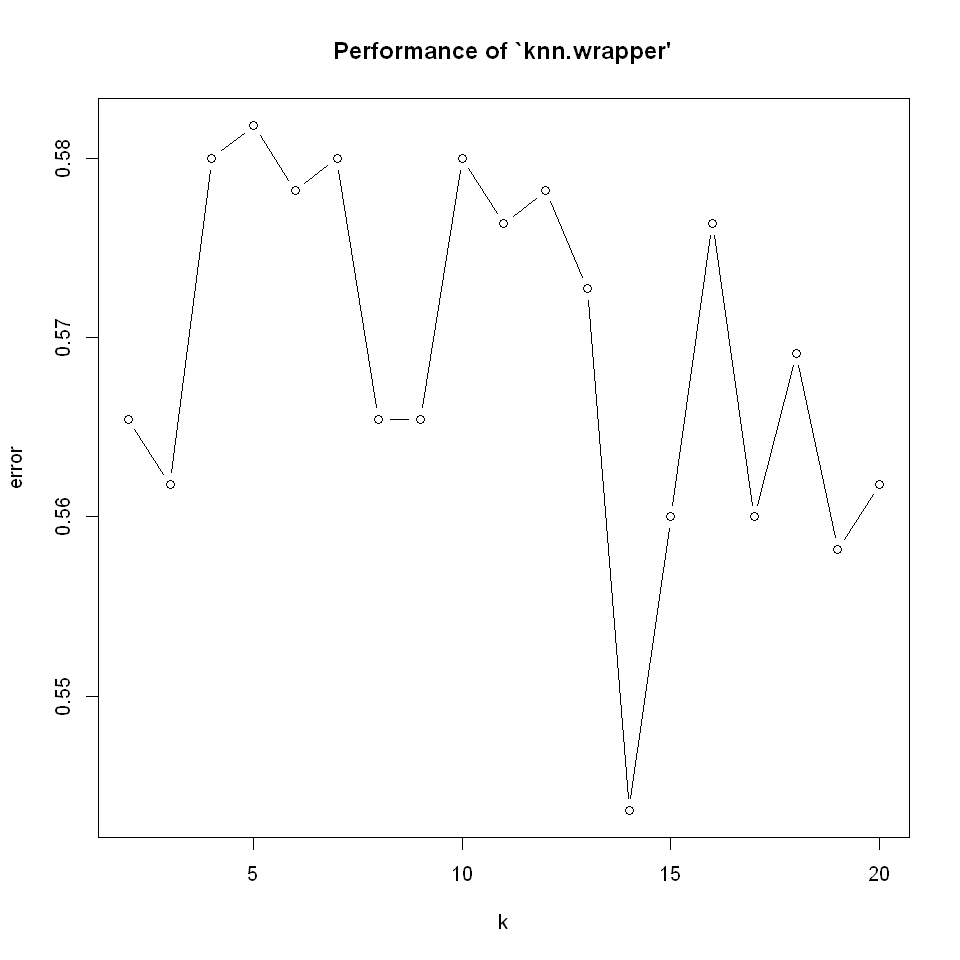

In [85]:
# k plus proches voisins: optimisation de k
plot(tune.knn(as.matrix(datappq[,c(-1,-17)]),as.factor(datappq[,17]),k=2:20))

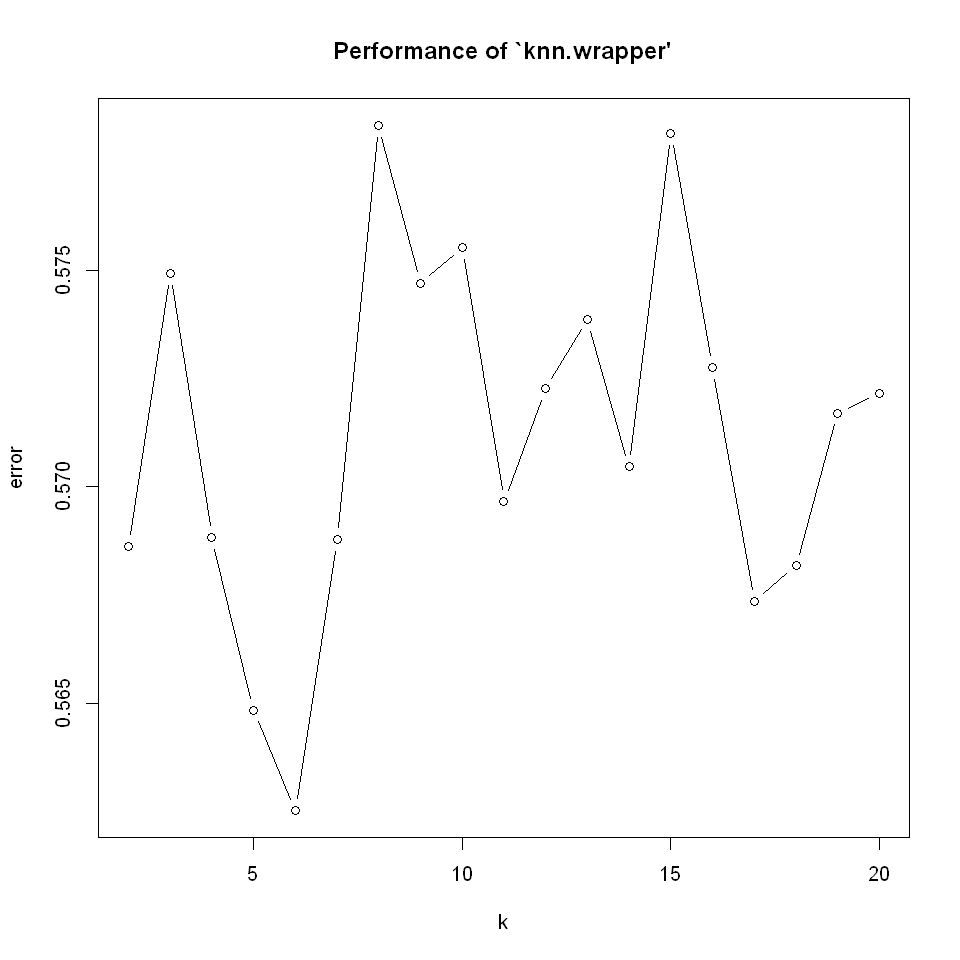

In [86]:
plot(tune.knn(as.matrix(datappq[,c(-1,-17)]),as.factor(datappq[,17]),k=2:20,tunecontrol=tune.control(sampling="boot")))

In [87]:
tune.control()

$random
[1] FALSE

$nrepeat
[1] 1

$repeat.aggregate
function (x, ...) 
UseMethod("mean")
<bytecode: 0x0000000011296fc0>
<environment: namespace:base>

$sampling
[1] "cross"

$sampling.aggregate
function (x, ...) 
UseMethod("mean")
<bytecode: 0x0000000011296fc0>
<environment: namespace:base>

$sampling.dispersion
function (x, na.rm = FALSE) 
sqrt(var(if (is.vector(x) || is.factor(x)) x else as.double(x), 
    na.rm = na.rm))
<bytecode: 0x000000000c3c0b20>
<environment: namespace:stats>

$cross
[1] 10

$fix
[1] 0.6666667

$nboot
[1] 10

$boot.size
[1] 0.9

$best.model
[1] TRUE

$performances
[1] TRUE

$error.fun
NULL

attr(,"class")
[1] "tune.control"

In [88]:
help(tune.knn)

In [89]:
help(kmeans)

**Q** Quelle proc√©dure de validation crois√©e est ex√©cut√©e par d√©faut par la fonction `tune`?

<FONT COLOR = "blue"> La m√©thode de validation crois√©e ex√©cut√©e par d√©faut est **10-fold cross validation** : on d√©coupe nos donn√©es en 10 folds et √† chaque it√©rations 9 folds serviront d'√©chantillon d'entra√Ænement et le dixi√®me servira d'√©chantillon de test. On fait 10 it√©rations. </font>

Lancer plusieurs ex√©cutions successives de cette "optimisation".

**Q** Pourquoi la valeur de $k$ optimale diff√®re √† chaque ex√©cution?

<FONT COLOR = "blue"> La valeur optimale de $k$ diff√®re √† chaque ex√©cution car les sets form√©s pour la cross validation ne sont jamais les m√™mes. Malgr√© le fait que k varie √† chaque ex√©xution, la pr√©diction obtenue ne varie pas beaucoup. On peut voir que la table de confusion change l√©g√®rement mais les r√©sultats obtenus restent dans le m√™me ordre de grandeur.
    
</font>

Comparer avec les erreurs pr√©c√©dentes estim√©es √©galement par validation crois√©e.

**Q** Quelle analyse discriminante retenir ? Pourquoi?

<FONT COLOR = "blue"> On va retenir l'analyse discriminante lin√©aire, car elle fournit de meilleures pr√©dictions. Comme le montre la table de confusion, l'analyse discriminante quadratique n'a pas fournit de bons r√©sultats. </font>

In [90]:
help(tune)

### Pr√©vision de l'√©chantillon test

#### Matices de confusion

Les commandes suivantes calculent la matrice de confusion pour la "meilleure" m√©thode d'analyse discriminante au sens de la validation crois√©e. Cette "meilleure" m√©thode peut √™tre ediff√©rente d'un participant √† l'autre.

In [91]:
disc.lda=lda(datappq$rain_class~.,data=datappq[,-17])  
table(predict(disc.lda,datestq[,-17])$class,datestq[,"rain_class"])

           
            high_rain low_rain no_rain
  high_rain        17       10       4
  low_rain         17       38      14
  no_rain           2       15      21

<FONT COLOR = "blue"> **LDA : Analyse de la table de confusion :** Quand la variable observ√©e est : 
- **high_rain** : La pr√©diction est bonne dans 47% des cas
- **low_rain** : La pr√©diction est bonne dans 60% des cas
- **no_rain** : La pr√©diction est bonne dans 53% des cas
    
On en d√©duit que le mod√®le obtenu par l'analyse discriminante lin√©aire obtient des r√©sultats raisonnables pour la validation crois√©e pour la pr√©diction de **low_rain**. En revanche, les pr√©dictions obtenues pour **high_rain** et **no_rain** ne sont pas bonnes, le mod√®le se trompe une fois sur deux. Dans les deux cas il pr√©dit la variable **low_rain** presque aussi souvent que **high_rain** et **no_rain**.
</font> 

A titre indicatif, voici l'estimation de l'erreur sur l'√©chantillon test pour la m√©thode des $k$ plus proches voisins.

In [92]:
disc.knn=knn(as.matrix(datappq[,c(-1,-17)]),as.matrix(datestq[,c(-1,-17)]),datappq$rain_class,k=15)
table(disc.knn,datestq$rain_class)

           
disc.knn    high_rain low_rain no_rain
  high_rain        21       16       7
  low_rain         12       32      17
  no_rain           3       15      15

<FONT COLOR = "blue"> **LDQ : Analyse de la table de confusion :** Quand la variable observ√©e est : 
- **high_rain** : La pr√©diction est bonne dans 52% des cas
- **low_rain** : La pr√©diction est bonne dans 52% des cas
- **no_rain** : La pr√©diction est bonne dans 43% des cas
    
On en d√©duit que le mod√®le obtenu par l'analyse discriminante quadratique obtient de mauvais r√©sultats. Il se trompe une fois sur deux lorsqu'il pr√©dit **high_rain** et **low_rain**, et m√™me plus d'une fois sur deux pour la pr√©diction de no_rain. Tout comme le mod√®le de la **lda**, il pr√©dit la variable low_rain presque aussi souvent que high_rain et no_rain quand ce sont ces classes l√† qui sont observ√©es. 
    
En comparaison, le mod√®le **lda** est finalement l√©g√®rement meilleur dans ses pr√©visions que le mod√®le **ldq**, m√™me s'il ne reste pas tr√®s bon.
</font> 

#### Courbes ROC
<FONT COLOR = "blue"> Dans le cas multinomial on ne peut pas tracer la courbe ROC. </font>

**Q** Une m√©thode est-elle uniform√©ment meilleure sur cet √©chantillon test ?

## [Arbre de d√©cision binaire](http://wikistat.fr/pdf/st-m-app-cart.pdf)

<font color = "blue"> La librairie  `rpart` est celle la plus couramment utilis√©e pour la construction d'arbres de d√©cision. Deux types d'arbres peuvent √™tre estim√©s selon que la variable √† mod√©liser est la quantit√© totale de pr√©cipitation le jour suivant **rain_mod** ou la cat√©gorie de pr√©cipitations  **rain_class** (no_rain, low_rain, high_rain). </font>

<font color = "blue"> Diff√©rents param√®tres  contr√¥lent l'ex√©cution de l'algorithme: la p√©nalisation  minimale (`cp`) pour la construction de l'arbre maximal, le nombre minimal d'observation par noeud, le nombre de validations crois√©es (par d√©faut 10)... </font>

**NB.** Une s√©quence de valeurs de la p√©nalisation `cp` est associ√©e √† une s√©quence d'arbres embo√Æt√©s.


### Estimation et √©lagage de l'arbre de r√©gression
**Q** Quel crit√®re est optimis√© lors de la cr√©ation d'un noeud? de l'arbre?

<font color = "blue"> Nous d√©butons par la r√©gression et donc $Y = $ **rain_mod**. Pour commencer, nous tra√ßons un arbre complet (avec tr√®s peu d'√©lagage).

In [93]:
tree.reg=rpart(rain_mod~.,data=datappr,control=rpart.control(cp=0.001))
## La commande ci-dessous fournit un descriptif de l'arbre obtenu
# summary(tree.reg)  
## mais un graphe est  pr√©f√©rable

In [94]:
help(rpart.control)

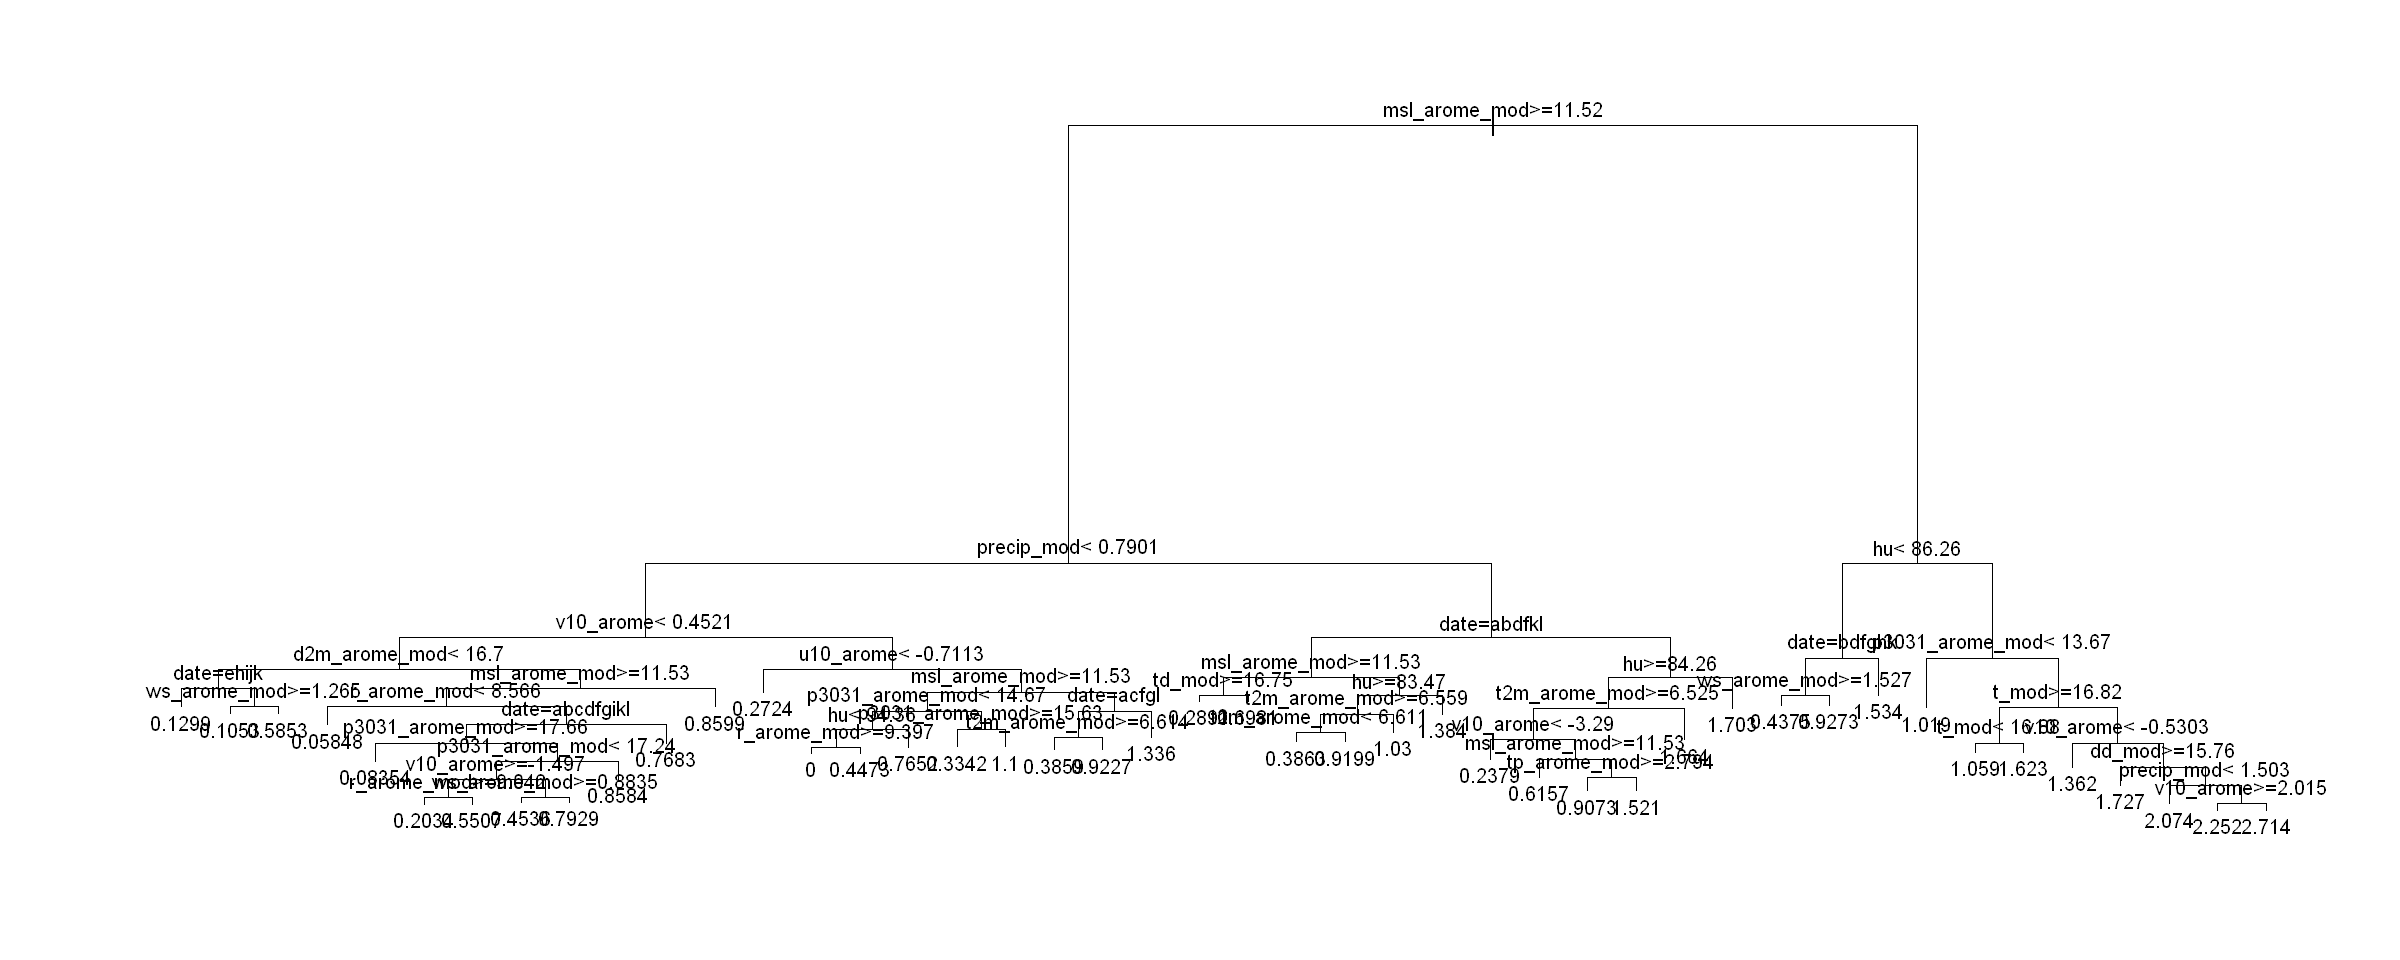

In [95]:
options(repr.plot.width = 20, repr.plot.height = 8)
plot(tree.reg)
text(tree.reg)

<font color = "blue"> A chaque feuille de l'arbre, nous cherchons √† minimiser le crit√®re suivant : $$ Crit(A)=D(A)+\gamma\times |A| ~~~~~~~~~(\gamma > 0)$$
o√π 
- <font color = "blue">$D(A) = \sum_{\kappa=1}^{|A|} D_{\kappa} $ est la somme des h√©t√©rog√©n√©it√©s des feuilles de chaque arbre 
- <font color = "blue">$ D_{\kappa}$ est l'h√©t√©rog√©n√©it√© du noeud terminal ${\kappa}$
- <font color = "blue">$|A|$ est le nombre de feuilles de l'arbre
- <font color = "blue">$\gamma$ est la force du terme de p√©nalisation

<font color = "blue"> Plus $\gamma$ augmente et plus l'arbre obtenu est √©lagu√©. La s√©quence de Breeman fonctionne de la fa√ßon suivante : 
    
- <font color = "blue">  ETAPE 1 : Calcul de l'arbre maximal. Pour ce faire, √† chaque noeud, on divise selon une variable et un seuil qui est choisi tel que le d√©coupage maximise la d√©croissance en h√©t√©rog√©n√©it√©. (on veut minimiser l'h√©t√©rog√©n√©it√© √† chaque noeud). 
    
    
- <font color = "blue"> ETAPE 2 : On √©lague l'arbre maximal :
    -  <font color = "blue">  Si $\gamma$ = 0, $A_{max}$ (l'arbre maximal) minimise $Crit(A)$ car $D(A_{max}) = 0$
    - <font color = "blue"> Si $\gamma$ augmente, la division de l'arbre pour laquelle l'am√©lioration en h√©t√©rog√©n√©it√© est $\le \gamma$ est annul√©e. 
    - <font color = "blue"> Dans ce cas, on "coupe" les feuilles issues de cette division (√©lagage)
    - <font color = "blue"> Le noeud p√®re devient un noeud terminal
    - <font color = "blue"> L'arbre maximal que nous avions √† l'√©tape pr√©c√©dente not√© $A_{\kappa}$ devient $A_{\kappa - 1}$, un sous arbre de l'arbre maximal.

    <font color = "blue"> Apr√®s it√©ration de cet algorithme, nous avons une s√©quence d'abres imbriqu√©s :  $A_{max} \supset A_{\kappa} \supset A_{\kappa-1} \supset ... \supset A_1$


<font color = "blue"> Dans la fonction ci-dessus, `cp` est le complexity parameter. Tout split dont la d√©rcoissance en h√©t√©rog√©n√©it√© n'est pas d'au moins la valeur `cp`, n'est pas r√©alis√© (donc √©lagu√©). Donc si `cp` est tr√®s petit, on √©lague peu, plus `cp` est grand plus on √©lague l'arbre donc moins l'arbre est complexe. Ici cp=0.001, donc il y a tr√®s peu d'√©lagage. 

L'arbre est illisible et pr√©sente trop de feuilles pour une bonne pr√©vision (sur-apprentissage), il est n√©cessaire d'en r√©duire le nombre par √©lagage. Les commandes suivantes calculent les pr√©visions obtenues par  validation crois√©e *10-fold* pour chaque arbre √©lagu√© suivant les valeurs successives du coefficient de complexit√©. La s√©quence de ces valeurs est implicitement celle fournit par `rpart`. 

In [96]:
xmat=xpred.rpart(tree.reg)
xerr=(xmat-datappr[,"rain_mod"])^2
CVerr=apply(xerr,2,sum) # on applique la somme (FUN=sum) sur les colonnes (MARGIN=2) de la matrice xerr
CVerr  # Cross validation error en fonction de cp

0.607998052 0.100710832 0.041528774 0.030044328 0.022022785 0.019084654 
   324.4862    257.2831    261.2534    255.6511    263.5379    267.6815 
0.017910277 0.016563422 0.015630544 0.015461385 0.013605119 0.011598625 
   272.9400    271.4802    271.4324    272.5769    272.2309    274.4557 
0.010356356 0.009518048 0.009116423 0.008454692 0.007912578 0.007195509 
   285.8868    288.6327    290.5931    291.9414    290.5750    291.3011 
0.006654933 0.006323393 0.005851478 0.005280783 0.004770955 0.004495016 
   289.9818    293.8401    299.8223    294.6857    300.2259    299.4626 
0.004375695 0.004312680 0.004258869 0.003852130 0.003485672 0.003263333 
   298.5680    300.2644    300.5450    302.3058    300.6484    298.6978 
0.002938512 0.002758556 0.002612365 0.002323493 0.001462081 
   304.8769    307.1211    307.2144    307.7510    309.6664

<font color = "blue"> La liste ci-dessus pr√©sente pour chaque valeur du coefficient de complexit√©, l'erreur calcul√©e par validation crois√©e 10 folds (CV) associ√©e. Ex : 0.607998052 (=cp) associ√©e √† 324.098489614118 (erreur de CV) pour le premier √©l√©ment de la liste affich√©e. 
    
<font color = "blue"> On rapelle que l'erreur de Cross-Validation (CV) permet d'estimer **l'erreur de g√©n√©ralisation** qui est un indicateur de la performance de notre algorithme. On souhaite donc avoir une valeur de CV la plus faible possible.

In [97]:
help(xpred.rpart)

<font color = "blue"> On cherche la valeur de `cp` correspondant √† la plus petite erreur CV afin de l'utiliser pour construite un arbre am√©lior√©.

In [98]:
as.numeric(attributes(which.min(CVerr))$names)

[1] 0.03004433

In [99]:
#red√©finition de l'abre de r√©gression avec la valeur de cp optimale
tree.reg=rpart(rain_mod~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))

La librairie `partykit` propose une construction graphique de l'arbre:

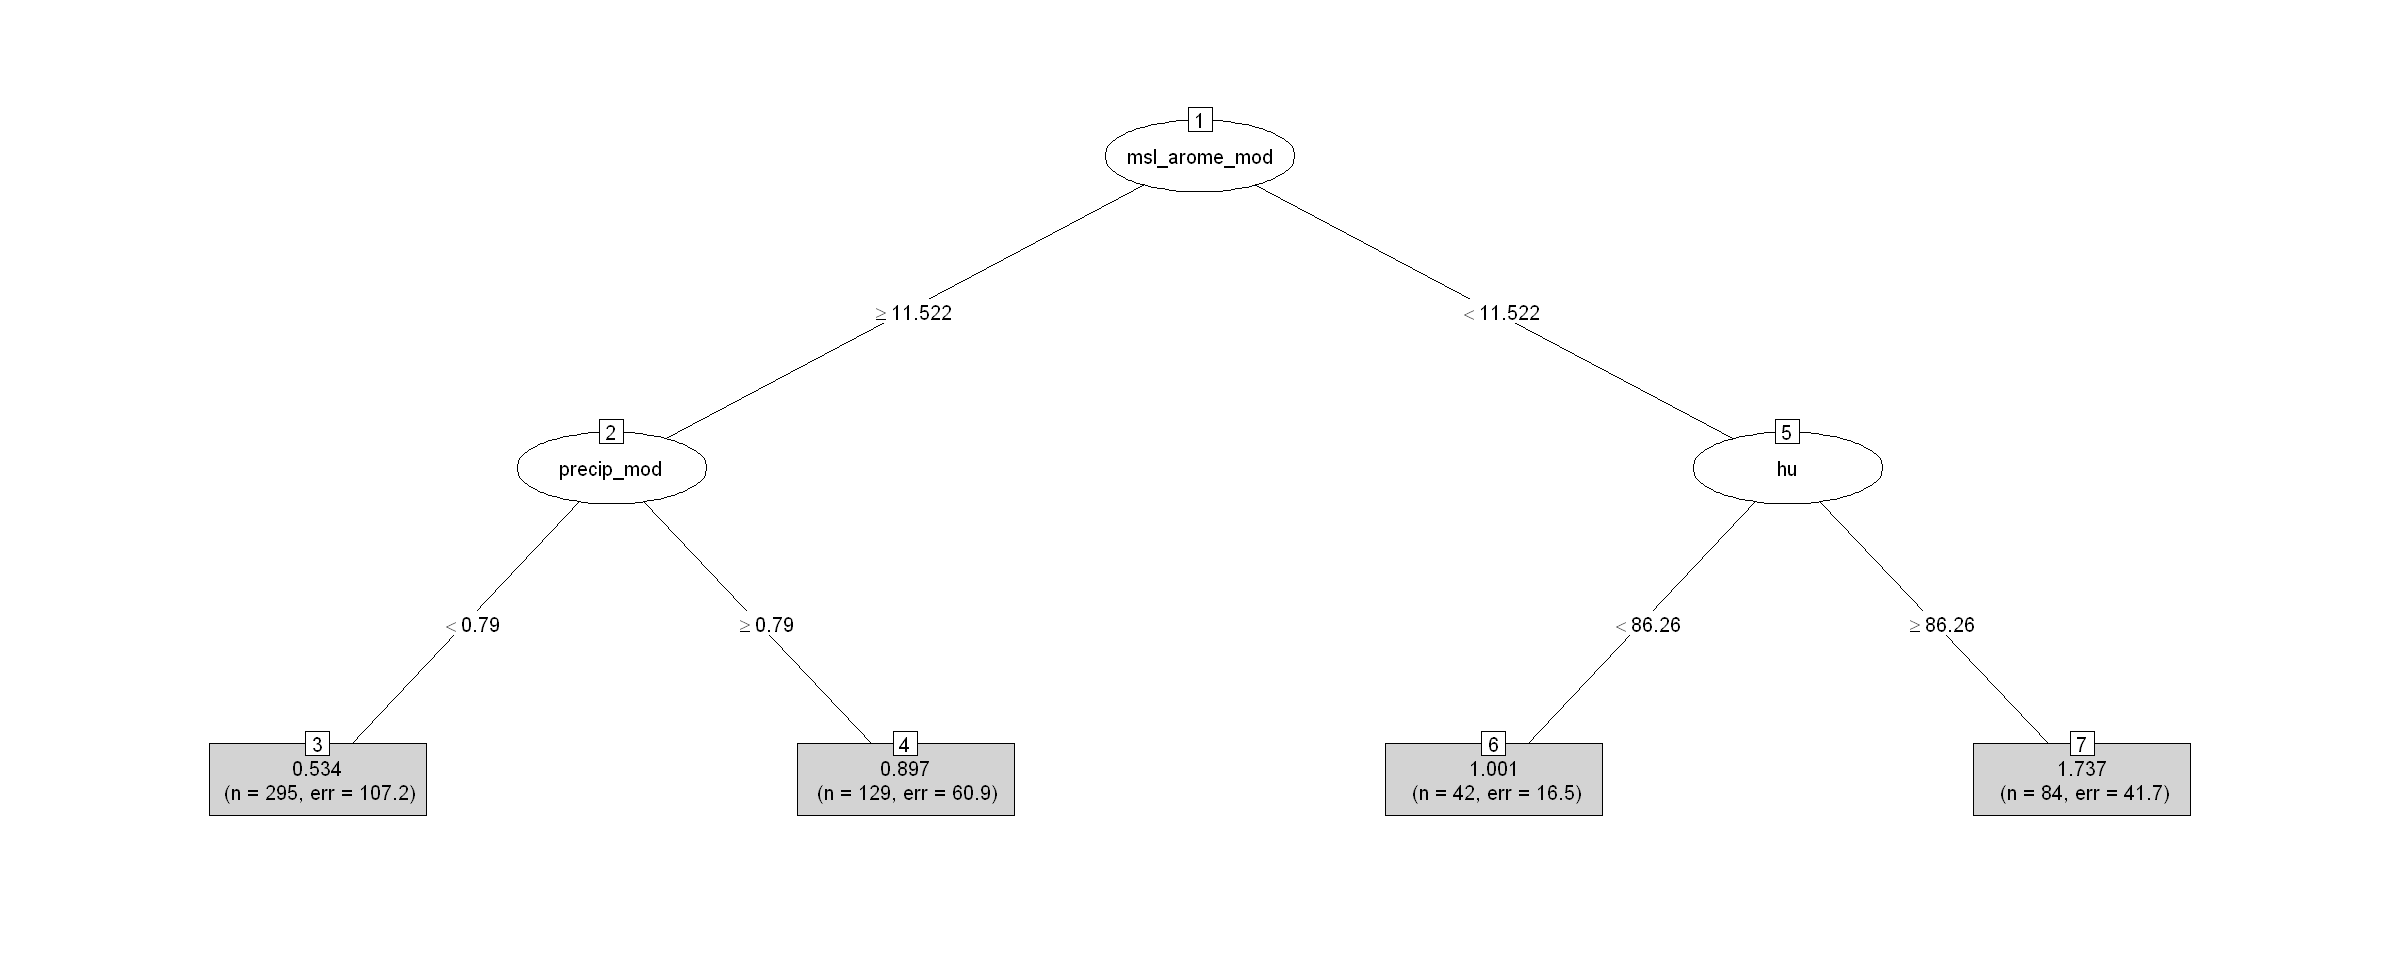

In [100]:
plot(as.party(tree.reg), type="simple")

<font color = "blue"> Nous pouvons remarquer que l'abre est bien plus √©lagu√© que pr√©c√©demment. En effet, pour le premier arbre nous avions cp = 0.001 ce qui est plus petit cp = 0.030044322 pour l'abre ci-dessus. </font> 

La fen√™tre est trop petite pour repr√©senter les distributions (histogramme) de la variable cible (concentration en ozone) dans chaque feuille. 

**Q** Quelle est la variable qui contribue le plus √† l'interpr√©tation?


<font color = "blue"> Les variables permettant la d√©cision sont : 
- <font color = "blue"> msl_arome_mod: pression atmosph√©rique du jour J+1 pr√©dite par le mod√®le AROME
- <font color = "blue"> precip_mod : quantit√© totale des pr√©cipitation du jour J
- <font color = "blue"> hu : l'humidit√© du jour J. 

<font color = "blue"> La variable qui contribue le plus √† l'interpr√©tation est la pression atmosph√©rique du jour J+1 pr√©dite par AROME msl_arome_mod.    
    
<font color = "blue"> Ceci semble logique car nous souhaitons pr√©dire **rain_mod** qui est la quantit√© totale des pr√©cipitations au jour J+1. Le plus souvent, le temps est √† la pluie lorsque la pression atmosph√©rique est basse ce qui peut expliquer que ce soit la premi√®re variable de l'arbre.

Graphe des r√©sidus

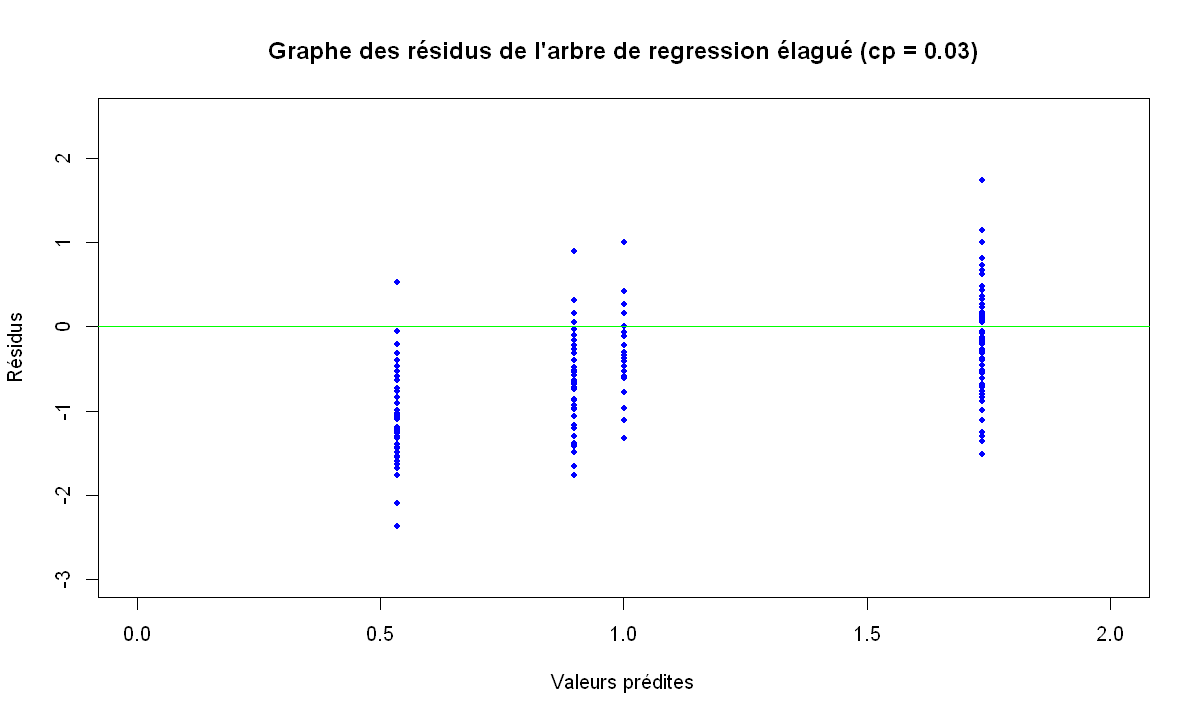

In [101]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"rain_mod"]

options(repr.plot.width = 10, repr.plot.height = 6)
plot.res(x = fit.tree,y = res.tree, titre = "Graphe des r√©sidus de l'arbre de regression √©lagu√© (cp = 0.03)"
         ,lim_x = c(0, 2),lim_y = c(-3, 2.5))

**Q** A quoi est due la structure particuli√®re de ce graphe?

<font color = "blue"> Notre arbre optimal pr√©sente 4 feuilles. La valeur pr√©dite pour chaque feuille est constante et correspond √† la moyenne des observations $Y_i$ tomb√©es dans la feuille. Il y a autant de pr√©diction que de feuilles d'arbres. Pour pr√©dire la valeur d'une nouvelle observation, il suffit de faire passer cette observation dans l'abre et de lui assigner la valeur de la feuille dans laquelle l'observation est tomb√©e. 
Cette pr√©diction constante par morceaux explique la forme stri√©e du graphe (en abscisse chaque valeur correspond √† la valeur d'un noeud). 

### Estimation et √©lagage d'un arbre de discrimination

<font color = "blue"> Nous poursuivons par la classification (ou discrimination) et donc $Y = $ **rain_class**. Pour commencer, nous tra√ßons un arbre complet (avec tr√®s peu d'√©lagage).

Dans le cas d'une discrimination, le crit√®re par d√©faut est l'indice de concentration de Gini ; il est possible de pr√©ciser un autre crit√®re (split="information") ainsi que des poids sur les observations, une matrice de co√ªts de mauvais classement ainsi que des probabilit√©s *a priori* (?rpart pour plus de d√©tails).

**Q** Quel autre crit√®re d'h√©t√©rog√©n√©it√© est utilis√©?

<font color = "blue"> Un autre crit√®re qui peut etre utilis√© est la cross entropy. Cette valeur est minimale si seule une classe de Y est pr√©sente et maximale si toutes les classes sont pr√©sentes. On vise donc √† minimiser ce crit√®re dans le cas de la classification.

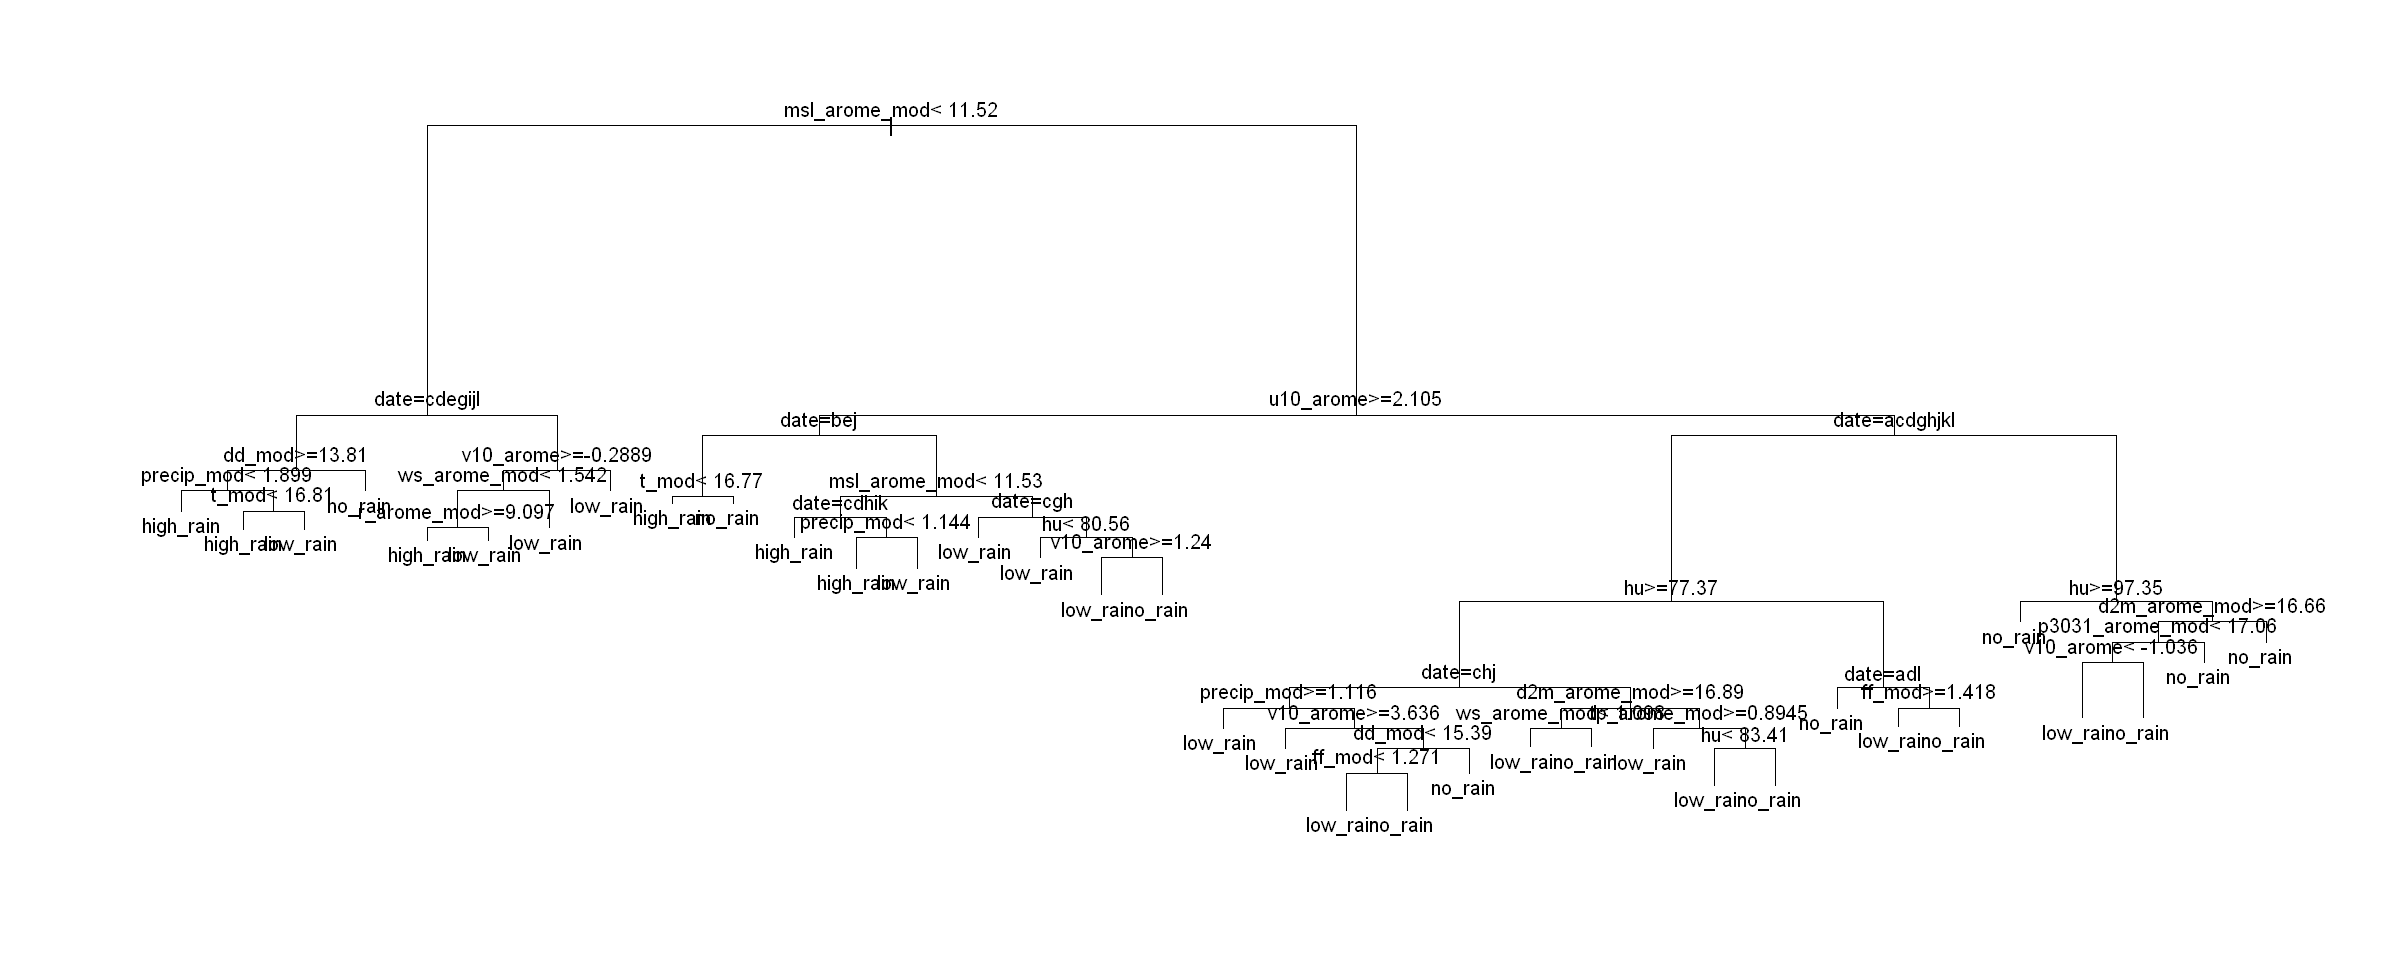

In [102]:
options(repr.plot.width = 20, repr.plot.height = 8)
tree.dis=rpart(rain_class~.,data=datappq,parms=list(split="information"),cp=0.001)
plot(tree.dis) 
text(tree.dis)  

La m√™me proc√©dure d'√©lagage par validation crois√©e est mise en place mais avec un expression diff√©rente de l'erreur de pr√©vision: taux de mal class√©s plut√¥t qu'erreur quadratique.

In [103]:
xmat = xpred.rpart(tree.dis)
# Comparaison des valeurs pr√©dite et observ√©e
A = datappq$rain_class
levels(A) <- c(1,2,3) #renome les levels de A pour que √ßa corresponde aux levels de xmat
xerr = A != xmat
# Calcul  des estimations des taux d'erreur
CVerr=apply(xerr, 2, sum)/nrow(xerr)
CVerr

0.573208723 0.078471288 0.036196106 0.029553997 0.016187391 0.008436177 
  0.5836364   0.5109091   0.5472727   0.5381818   0.5163636   0.4836364 
0.007440009 0.006729741 0.005395797 0.003815405 0.001765011 
  0.4818182   0.4981818   0.5000000   0.5000000   0.4945455

In [104]:
as.numeric(attributes(which.min(CVerr))$names)

[1] 0.007440009

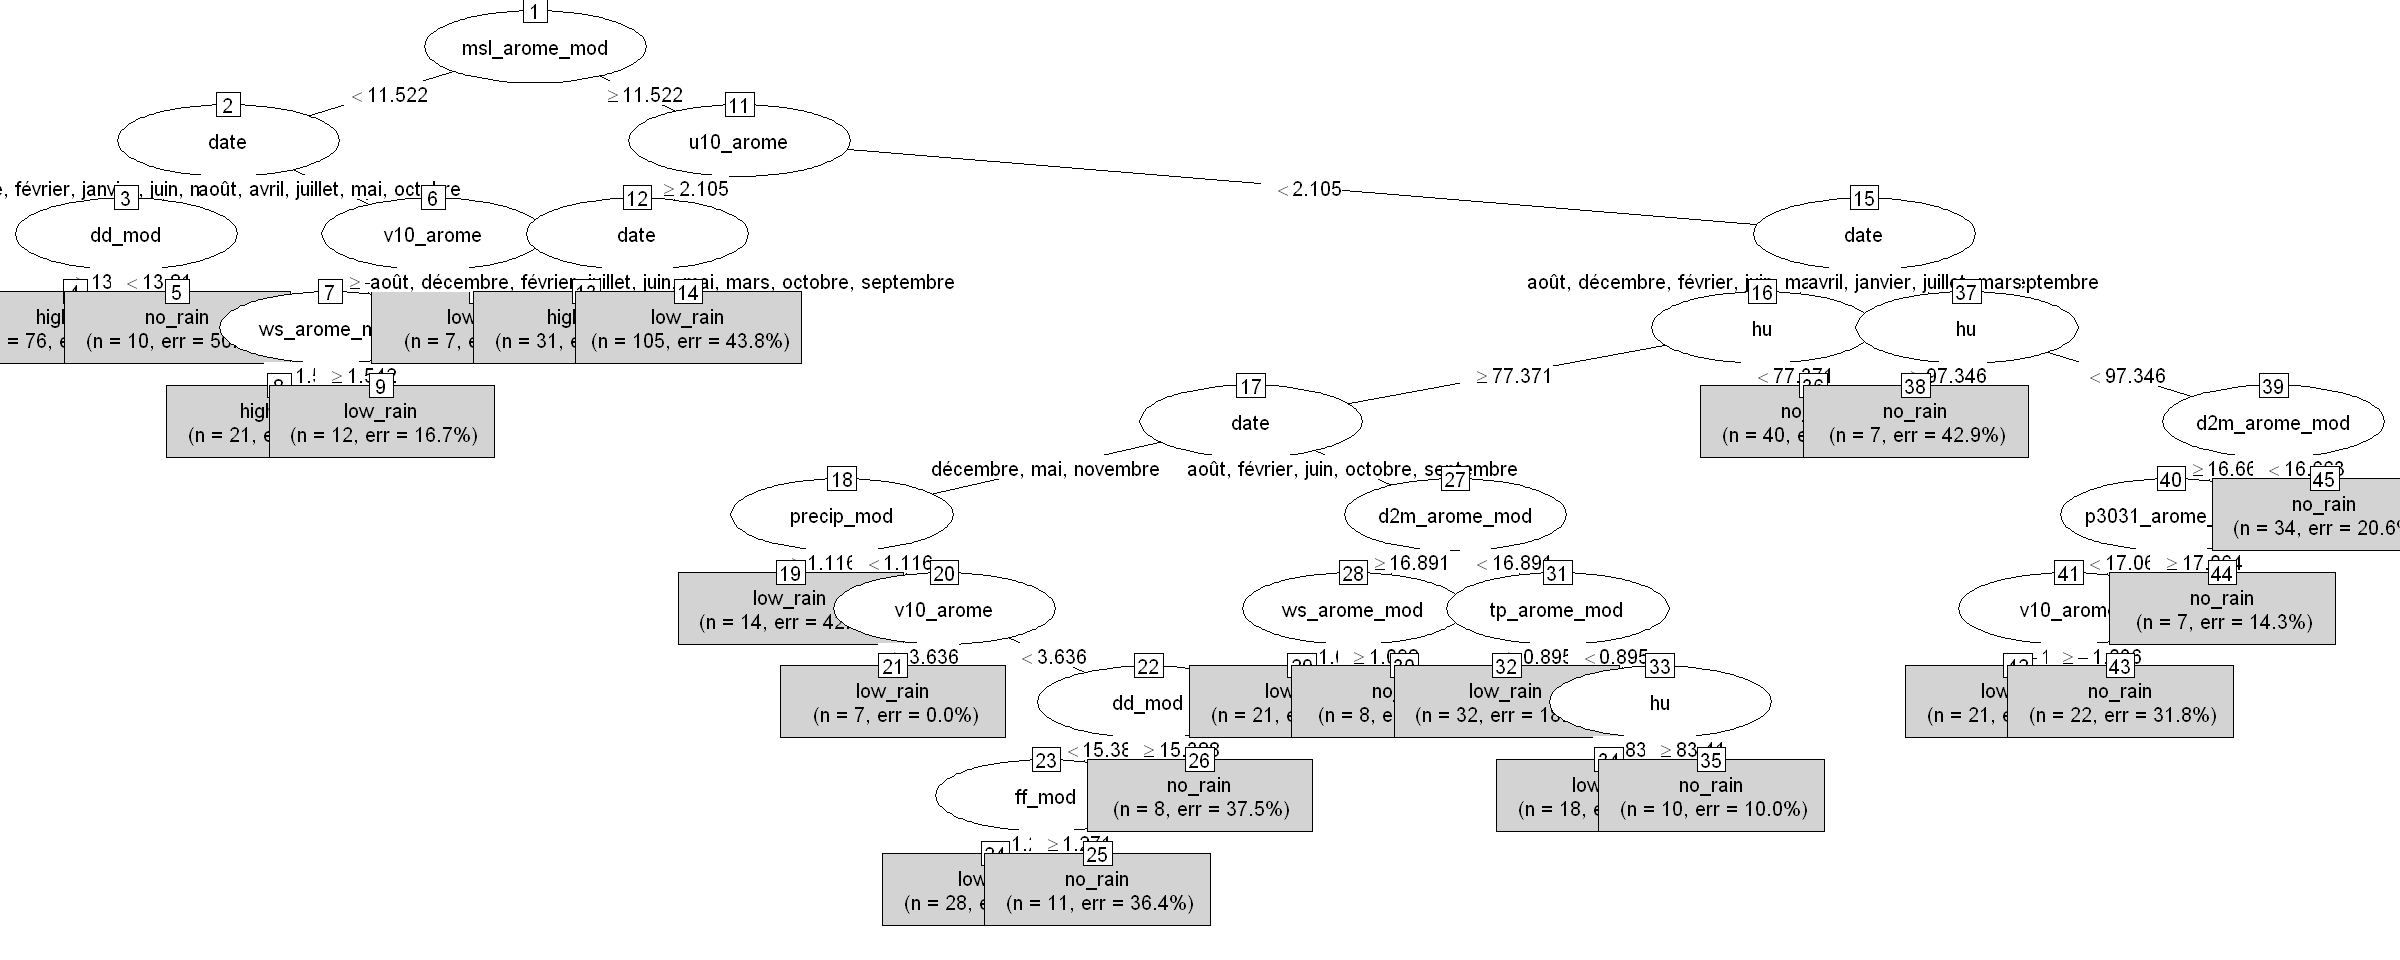

In [105]:
tree.dis=rpart(rain_class~.,data=datappq,parms=list(split="information"),
               cp=as.numeric(attributes(which.min(CVerr))$names))
plot(as.party(tree.dis), type="simple")

<font color = "blue"> De m√™me que pr√©cedemment, nous pouvons remarquer que l'abre est bien plus √©lagu√© que pr√©c√©demment. En effet, pour le premier arbre nous avions cp = 0.001 ce qui est plus petit cp = 0.016187391 pour l'abre ci-dessus. </font> 

<font color = "blue"> Les variables permettant la d√©cision sont : 
- <font color = "blue"> msl_arome_mod: pression atmosph√©rique du jour J+1 pr√©dite par le mod√®le AROME
- <font color = "blue"> hu : l'humidit√© du jour J. 
- <font color = "blue"> date : mois actuel
- <font color = "blue"> u10_arome : composantes du vent d'Ouest √† Est prise √† 10m de hauteur
   

<font color = "blue"> La variable qui contribue le plus √† l'interpr√©tation est la pression atmosph√©rique du jour J+1 pr√©dite par AROME msl_arome_mod. Si cette variable semble logique car nous souhaitons pr√©dire **rain_class**, les autres variables de d√©cisions ne semblent pas pertinentes. Le mois de l'ann√©e peut aussi avori une effet sur les pr√©cipitations, et la direction du vent peut amener des nuages qui engendrent la pluie. </font> 
    
    
<font color = "red">  **Attention, quand on fait tourner plusieurs fois l'algo, on peut obtenir des r√©sultats diff√©rents. Est-ce normal ?**

### Pr√©vision de l'√©chantillon test

Diff√©rentes pr√©visions sont consid√©r√©es assorties des erreurs estim√©es sur l'√©chantillon test. Pr√©vision quantitative de la concentration, pr√©vision de d√©passement √† partir de la pr√©vision quantitative et directement la pr√©vision de d√©passement √† partir de l'arbre de d√©cision. 

#### Erreur de r√©gression

In [106]:
# Calcul des pr√©visions
pred.treer=predict(tree.reg,newdata=datestr)
# Erreur de g√©n√©ralisation en r√©gression sur l'√©chantillon de test (arbre √©lagu√©)
paste("erreur de g√©n√©ralisation: ",sum((pred.treer-datestr[,"rain_mod"])^2)/nrow(datestr))

#Calcul MSE sur l'√©chantillon d'apprentissage 
paste("MSE : ",mean(res.tree^2)) #res = r√©didus

[1] "erreur de g√©n√©ralisation:  0.501367623244928"

[1] "MSE :  0.411395806162474"

#### Erreur de classification (matrice de confusion)

In [107]:
# M√™me chose pour l'arbre de discrimination
pred.treeq = predict(tree.dis,newdata=datestq)
#extraction de la modalit√© associ√© √† la plus forte proba :
pred.treeq = colnames(pred.treeq)[apply(pred.treeq, 1, which.max)] 
table(pred.treeq,datestq[,"rain_class"])

           
pred.treeq  high_rain low_rain no_rain
  high_rain        15       10       4
  low_rain         15       31      16
  no_rain           6       22      19

In [191]:
paste("Purity arbre classification: ", purity(table(pred.treeq,datestq[,"rain_class"])))
paste("F1_score arbre classification: ", F1_Score(pred.treeq,datestq[,"rain_class"]))

[1] "Purity arbre classification:  0.471014492753623"

[1] "F1_score arbre classification:  0.461538461538462"

**Q** Quelle strat√©gie semble meilleure √† ce niveau?

<font color = "blue"> Dans les deux cas (regression et classification) nous n'obtenons pas de tr√®s bons r√©sultats. Pour la regression, l'erreur de regression est elev√©e ($\approx 0.5$) et pour la classification nous avons : 
    
- <font color = "blue">  lorsque la valeur observ√©e est **high_rain** le mod√®le se trompe une fois sur deux et pr√©dit low_rain.
- <font color = "blue">  lorsque la valeur observ√©e est **low_rain** le mod√®le se trombe aussi une fois sur deux et pr√©dit high_rain et no_rain avec m√™me probabilit√©.  
- <font color = "blue">  lorsque la valeur observ√©e est **no_rain** le mod√®le se trombe encore une fois sur deux et pr√©dit low_rain. 
 
<font color = "blue"> Ces r√©sultats ne sont pas convaincants. Il s'agit d'un inconv√©nient de l'abre de classification/regression seul. En effet, ce mod√®le tr√®s explicable mais il donne souvent des r√©sultats de mauvaises qualit√©. Par la suite, nous allons aggr√©ger plusieurs arbres en for√™t afin d'obtenir une meilleure pr√©diction bien que l'on perde en explicabilit√© de l'algorithme. 

<font color = "blue"> On transforme la regression en classification :

In [109]:
#transformation de la r√©gression en classification
#--------------------------------------------------
pred.treer.C = table(RegToClassif(pred.treer), datestq[, "rain_class"])
print("Table de contingence de l'abre de d√©cision binaire")
print("o√π on a transform√© la r√©gression en classification")
pred.treer.C 

paste("Purity arbre regression transform√© en classification : ",purity(pred.treer.C))
paste("F1_score arbre regression transform√© en classification : ", F1_Score(RegToClassif(pred.treer),datestq[,"rain_class"]))

[1] "Table de contingence de l'abre de d√©cision binaire"
[1] "o√π on a transform√© la r√©gression en classification"


           
            high_rain low_rain no_rain
  high_rain         9        4       2
  low_rain         27       59      37

[1] "Purity arbre regression transform√© en classification :  0.492753623188406"

[1] "F1_score arbre regression transform√© en classification :  0.352941176470588"

#### Courbes ROC (pas faisable car on a 3 classes)

<FONT COLOR = "blue"> Dans le cas multinomial on ne peut pas tracer la courbe ROC. </font>

Comparer les qualit√©s  de pr√©vision.

**Q** Une meilleure m√©thode se d√©gage-t-elle?

# <FONT COLOR="Red">√âpisode 3</font>

## [R√©seau de neurones](http://wikistat.fr/pdf/st-m-app-rn.pdf)

### Introduction

Il s'agit d'estimer un mod√®le de type *perceptron* avec en entr√©e les variables qualitatives ou quantitatives et en sortie la variable √† pr√©voir. Des fonctions R pour l'apprentissage d'un perceptron √©l√©mentaire ont √©t√© r√©alis√©es par diff√©rents auteurs et sont accessibles sur le r√©seau. La librairie `nnet` de (Ripley, 1999), est limit√©e au perceptron √† une couche. Ce n'est pas de l'*apprentissage profond* ! mais suffisant dans bien des cas. Une librairie R associ√©e au logiciel √©ponyme H2O propose des r√©seaux √† plusieurs couches et "convolutionnels".

Comme pour les arbres, la variable √† expliquer est soit quantitative soit qualitative ; la fonction de transfert du neurone de sortie d'un r√©seau doit √™tre adapt√©e en cons√©quence. 

**Q** Quelle fonction de transfert pour le dernier neurone en r√©gression ?

<font color = "blue"> En regression on utilise la fonction : $\Psi = $ *Identit√©* (pas de fonction d'activation appliqu√©e) </font> (p.94 poly)

**Q** Quelle fonction de transfert pour le dernier neuronne en discrimination binaire?

<font color = "blue"> En classification binaire on utilise la fonction sigmo√Øde $\Psi (x) = \frac{1}{1+e^{-x}} $

**Q** Quid de la discrimination avec plusieurs classes?*
    
<font color = "blue"> En classification multiclasse on utilise la fonction softmax multidimensionnelle : $\Psi (x)_i = softmax (x)_i = \frac{exp(z_i)}{\sum_j{exp(z_j)}} $

**Q** Quel est le choix par d√©faut pour les neurones de la couche cach√©e?
    
<font color = "blue"> La fonction d'activation par d√©faut sur les couches cach√©es est la fonction sigmoid : $\phi (x) = \frac{1}{1+e^{-x}}$ (sur les r√©seaux de neurones historiques des ann√©es 80).
    
<font color = "blue"> Sur les CNN(convolution neural network) et le deeplearning sous python on utilise la fonction RELU.

Diff√©rentes strat√©gies sont propos√©es pour √©viter le sur-apprentissage. La premi√®re conciste √† optimiser le nombre de neurones sur la couche cach√©e. Tr√®s approximativement il est d'usage de consid√©rer, qu'en moyenne, il faut une taille d'√©chantillon d'apprentissage 10 fois sup√©rieure au nombre de poids c'est-√†-dire au nombre de param√®tres √† estimer. On remarque qu'ici la taille de l'√©chantillon d'apprentissage (832) est modeste pour une application raisonnable du perceptron. Seuls des nombres restreints de neurones peuvent √™tre consid√©r√©s et sur une seule couche cach√©e. 

**Q** Quel est le param√®tre `decay` de la fonction `nnet`?
    
<font color = "blue"> Le param√®tre `decay` (valeur par d√©faut = 0) est le terme de p√©nalisation $\lambda$ dans la formule p95 du poly: $L_n(\theta) = \frac{1}{n}\sum_{i=1}^n {l(Y_i,f(X_i,\theta))} +\lambda \Omega(\theta)$. Il s'agit d'un param√®tre de r√©gularisation pour √©viter l'over-fitting en p√©nalisant les mod√®les trop complexes.

**Q** Indiquer une autre fa√ßon d√©viter le sur-apprentissage.

<font color = "blue"> Aujourd'hui, on utilise plut√¥t le **drop-out** qui consiste √† mettre √† 0 certains poids du r√©seau pour une certaine probabilit√© p et ind√©pendemment des autres (p101).

### Cas de la r√©gression

<font color = "blue"> Nous commen√ßons par appliquer un r√©seau de neurones √† une couche cach√©e (avec la librairie `nnet`) dans le cas de la regression pour expliquer la variable **rain_mod**

In [110]:
# apprentissage
# attention au param√®tre linout dans le cas de la r√©gression
nnet.reg=nnet(rain_mod~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

# weights:  141
initial  value 1317.343662 
iter  10 value 325.296921
iter  20 value 305.653570
iter  30 value 276.206011
iter  40 value 245.397390
iter  50 value 235.863682
iter  60 value 231.891723
iter  70 value 230.121863
iter  80 value 227.804103
iter  90 value 226.159221
iter 100 value 224.901717
iter 110 value 223.989359
iter 120 value 223.719038
iter 130 value 222.841403
iter 140 value 221.122254
iter 150 value 220.733605
iter 160 value 220.645582
iter 170 value 220.546229
iter 180 value 220.343246
iter 190 value 220.131264
iter 200 value 220.011564
iter 210 value 219.971706
iter 220 value 219.966060
iter 230 value 219.964676
final  value 219.964376 
converged


a 26-5-1 network with 141 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   0.08   -0.34    0.18    0.60    0.50   -0.26    0.26    0.06    0.41    0.95 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
  -0.04   -0.69    0.29    0.35    0.32   -0.14   -0.97    0.48    0.21    0.00 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 
   0.45   -0.33    0.31    0.40   -0.28   -0.09    0.77 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0.00   -0.01    0.31   -0.34    0.24    0.02    0.17   -0.05    0.26    0.04 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
  -0.07    0.74    0.15   -0.43   -0.42    0.13    0.36    0.34    0.12    0.60 
i20->h2 i21->h2 i22->h2 i23->h2 i24->h2 i25->h2 i26->h2 
  -0.50    0.29   -0.06   -0.32   -0.51    0.28   -0.10 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h

La commande donne la "trace" de l'ex√©cution avec le comportement de la convergence mais le d√©tail des poids de chaque entr√©e de chaque neurone ne constituent pas des r√©sultats tr√®s explicites ! Contr√¥ler le nombre de poids estim√©s.

L'optimisation des param√®tres n√©cessite encore le passage par la validation crois√©e. Il n'y a pas de fonction dans la librairie `nnet` permettant de le faire mais la fonction ` tune.nnet` de la librairie `e1071` est adapt√©e √† cette d√©marche.

<font color = "blue"> `tune.nnet` consiste √† faire une grille de test. On fait varier :
- <font color = "blue"> size (c'est le nombre de neurones par couche) de 1 √† 5
- <font color = "blue"> decay de 1 √† 10 

<font color = "green"> **Attention** : cette cellule est longue √† tourner : 

In [111]:
test_nnet <- tune.nnet(rain_mod~.,data=datappr,size=1:5,decay=1:10,maxit=200,linout=TRUE)

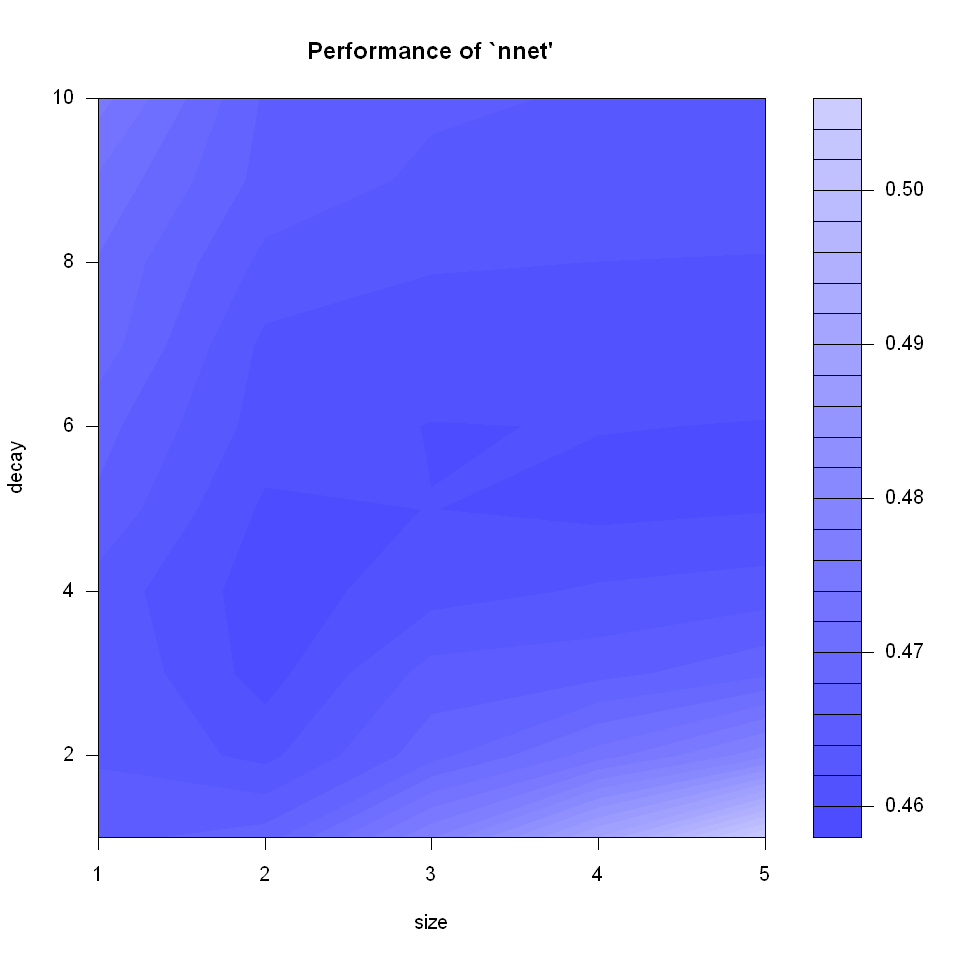

In [112]:
options(repr.plot.width = 8, repr.plot.height = 8)
plot(test_nnet)

<font color = "blue"> Les graphes ci-dessus correspondent √† l'erreur que l'on cherche √† minimiser. Les param√®tres minimisant l'erreur sont ceux pour lesquels le graphe est le plus fonc√©. \
On choisit alors `decay` = 4 et `size` = 3.

Faire √©ventuellement varier la grille des param√®tres (zoom), noter la taille et le `decay` optimaux. Il faudrait aussi  faire varier le nombre total d'it√©rations. Cela risque de prendre un peu de temps ! Noter √©galement que chaque ex√©cution donne des r√©sultats diff√©rents... il n'est donc pas tr√®s utile d'y passer beaucoup de temps !

R√©-estimer le mod√®le suppos√© optimal avant de tracer le graphe des r√©sidus. 

In [113]:
nnet.reg=nnet(rain_mod~.,data=datappr,size=3,decay=4,linout=TRUE,maxit=200)

# weights:  85
initial  value 2350.914832 
iter  10 value 338.592945
iter  20 value 303.522067
iter  30 value 284.190589
iter  40 value 277.373890
iter  50 value 272.725578
iter  60 value 266.349141
iter  70 value 262.022941
iter  80 value 252.713124
iter  90 value 249.249412
iter 100 value 248.605814
iter 110 value 248.541513
iter 120 value 248.479520
iter 130 value 248.457394
iter 140 value 248.450430
final  value 248.449077 
converged


<font color = "blue"> Nous pouvons observer qu'avec les valeurs optimales pour `decay` et `size` le nombre de poids impl√©qu√©s dans le r√©seau de neurones a diminu√© en passant de 141 √† 85. Le nombre d'it√©rations pour atteindre la convergence est aussi plus court passant de 220 √† 110.

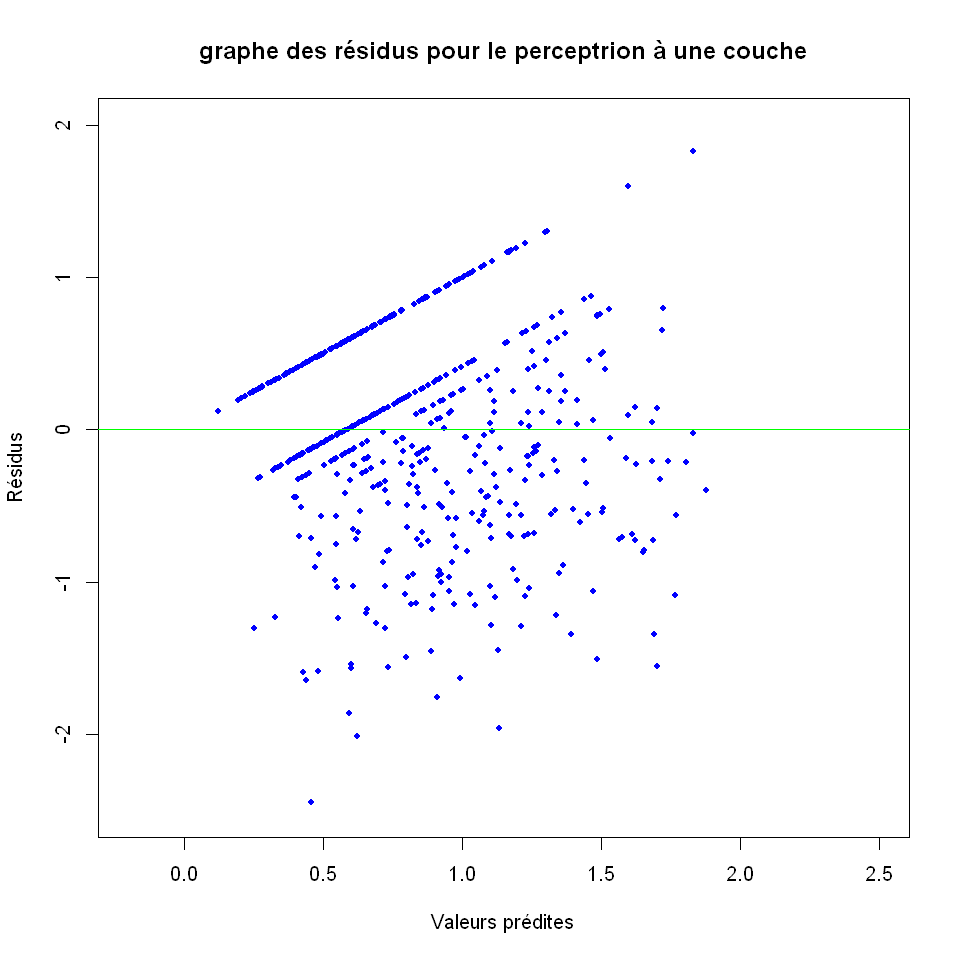

In [114]:
# calcul et graphe des r√©sidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"rain_mod"]
plot.res(fit.nnetr,res.nnetr,titre="graphe des r√©sidus pour le perceptrion √† une couche",
         lim_x = c(-0.2, 2.5), lim_y = c(-2.5, 2))

### Cas de la discrimination

<font color = "blue"> Nous poursuivons en appliquant un r√©seau de neurones √† une couche cach√©e dans le cas de la classification pour expliquer la variable **rain_class**

In [115]:
# apprentissage
nnet.dis=nnet(rain_class~.,data=datappq,size=5,decay=0) 
summary(nnet.reg)

# weights:  153
initial  value 722.250830 
iter  10 value 563.620372
iter  20 value 536.677653
iter  30 value 525.542840
iter  40 value 522.854746
iter  50 value 521.840347
iter  60 value 520.912852
iter  70 value 519.243088
iter  80 value 517.940536
iter  90 value 517.906228
final  value 517.906089 
converged


a 26-3-1 network with 85 weights
options were - linear output units  decay=4
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   0.01   -0.10    0.14    0.02   -0.01   -0.15    0.08    0.18   -0.06    0.26 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
  -0.09   -0.04   -0.03   -0.05   -0.05    0.03    0.09    0.52   -0.04   -0.15 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 
  -0.11    0.27    0.01   -0.05   -0.11    0.11    0.05 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0.02   -0.11    0.18    0.13    0.12   -0.21    0.10    0.04    0.15    0.41 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
  -0.12   -0.25    0.03   -0.08   -0.07   -0.04   -0.03    0.60   -0.04    0.27 
i20->h2 i21->h2 i22->h2 i23->h2 i24->h2 i25->h2 i26->h2 
   0.26    0.12    0.02   -0.06   -0.03    0.12    0.14 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3

La validation crois√©e est toujours n√©cessaire afin de tenter d'optimiser les choix en pr√©sence : nombre de neurones, `decay` et √©ventuellement le nombre max d'it√©rations. 

L'initialisation de l'apprentissage d'un r√©seau de neurone comme celle de l'estimation de l'erreur par validation crois√©e sont al√©atoires. Chaque ex√©cution donne donc des r√©sultats diff√©rents. √Ä ce niveau, il serait int√©ressant de construire un plan d'exp√©rience √† deux facteurs (ici, les param√®tres de taille et `decay`) de chacun trois niveaux. Plusieurs r√©alisations pour chaque combinaison des niveaux suivies d'un test classique d'anova permettraient de se faire une id√©e plus juste de l'influence de ces facteurs sur l'erreur. 

Noter la taille et le `decay` optimaux et r√©-estimer le mod√®le pour ces valeurs.

<font color = "green"> **Attention** : cette cellule est longue √† tourner : 

In [116]:
test_nnet2 <- tune.nnet(rain_class~.,data=datappq,size=2:5,decay=1:8,maxit=200,linout=TRUE)

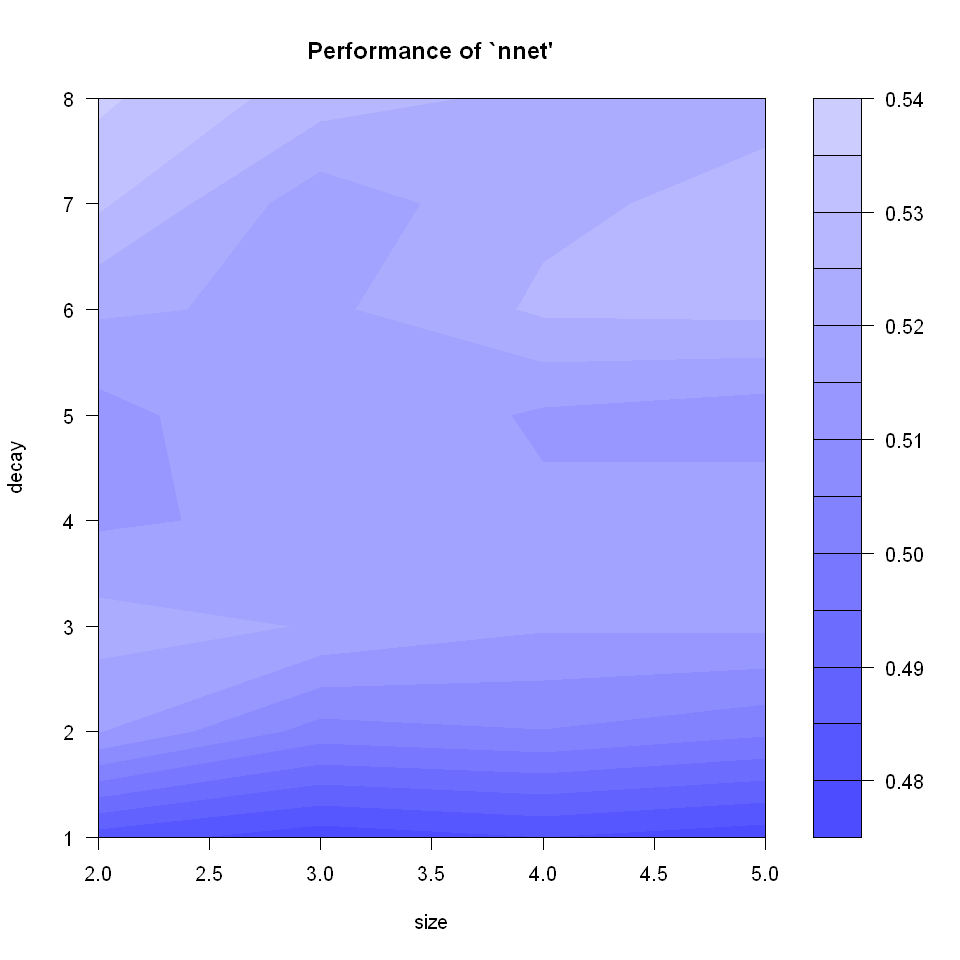

In [117]:
plot(test_nnet2)

<font color = "blue"> Les graphes ci-dessus correspondent √† l'erreur que l'on cherche √† minimiser. Les param√®tres minimisant l'erreur sont ceux pour lesquels le graphe est le plus fonc√©. \
On choisit alors `decay` = 5 et `size` = 3.

In [118]:
nnet.dis=nnet(rain_class~.,data=datappq,size=5,decay=5) 

# weights:  153
initial  value 807.111546 
iter  10 value 591.289684
iter  20 value 572.213702
iter  30 value 566.142061
iter  40 value 562.081777
iter  50 value 560.449009
iter  60 value 557.647429
iter  70 value 555.287248
iter  80 value 554.346826
iter  90 value 554.161682
iter 100 value 554.125097
final  value 554.125097 
stopped after 100 iterations


### Pr√©visions de l'√©chantillon test

Diff√©rentes pr√©visions sont consid√©r√©es assorties des erreurs estim√©es sur l'√©chantillon test. Pr√©vision quantitative de la concentration, pr√©vision de d√©passement √† partir de la pr√©vision quantitative et directement la pr√©vision de d√©passement √† partir de l'arbre de d√©cision. 


#### Erreur de r√©gression

In [119]:
# Calcul des pr√©visions
pred.nnetr=predict(nnet.reg,newdata=datestr)
# Erreur quadratique moyenne de pr√©vision = erreur de g√©n√©ralisation sur l'√©chantillon de test
paste("erreur de g√©n√©ralisation: ",sum((pred.nnetr-datestr[,"rain_mod"])^2)/nrow(datestr))

#Calcul MSE sur l'√©chantillon d'apprentissage 
paste("MSE : ",mean(res.nnetr^2)) #res = r√©didus

[1] "erreur de g√©n√©ralisation:  0.426652205472196"

[1] "MSE :  0.426172952104282"

<font color = "blue"> On observe une erreur de regression plus faible pour le r√©seau de neurones que pour l'abre de d√©cision binaire, mais √† peu pr√®s identique √† l'erreur de la for√™t al√©atoire.

#### Erreur de classification (matrice de confusion)

In [120]:
# Calcul des pr√©visions
pred.nnetq=predict(nnet.dis,newdata=datestq) 
# M√™me chose pour la discrimination
RealData = data.matrix(datestq[,"rain_class"]) #tranforme le dataframe en matrice
prediction = argmax(pred.nnetq,rows = TRUE) #calcule l'argmax pour chaque ligne
#transforme le n¬∞ des lignes obtenues avec argmax en un carat√®re "high_rain", "low_rain" ou "no_rain"
prediction[which(prediction == 1, arr.ind=TRUE)] = "high_rain" 
prediction[which(prediction == 2, arr.ind=TRUE)] = "low_rain"
prediction[which(prediction == 3, arr.ind=TRUE)] = "no_rain"
table(prediction,RealData)

           RealData
prediction  high_rain low_rain no_rain
  high_rain        19       12       6
  low_rain         16       37      19
  no_rain           1       14      14

In [121]:
paste("Purity r√©seau de neurones classification",purity(table(prediction,RealData)))
paste("F1_score r√©seau de neurones classification",F1_Score(prediction,datestq[,"rain_class"]))

[1] "Purity r√©seau de neurones classification 0.507246376811594"

[1] "F1_score r√©seau de neurones classification 0.520547945205479"

<font color = "blue"> On observe :     
- <font color = "blue">  lorsque la valeur observ√©e est **high_rain** le mod√®le se trompe une fois sur deux et pr√©dit low_rain.
- <font color = "blue">  lorsque la valeur observ√©e est **low_rain** le mod√®le se trombe aussi une fois sur deux et pr√©dit high_rain et no_rain avec m√™me probabilit√©.  
- <font color = "blue">  lorsque la valeur observ√©e est **no_rain** le mod√®le se trombe encore une fois sur deux et pr√©dit low_rain. 

<font color = "blue"> Nous obtenons alors exactement les m√™mes r√©sultats que pour l'arbre de classification ce qui n'est pas tr√®s concluant.

<font color = "blue"> Nous transformons la regression en classification :

In [122]:
pred.nnetr.C = table(RegToClassif(pred.nnetr), datestq[, "rain_class"])
print("Table de contingence de l'abre du r√©seau de neurones")
print("o√π on a transform√© la r√©gression en classification")
pred.nnetr.C 

paste("Purity r√©seau de neurones o√π on transform√© la r√©gression en classification",purity(pred.nnetr.C))
paste("F1_score r√©seau de neurones o√π on transform√© la r√©gression en classification",F1_Score(RegToClassif(pred.nnetr),datestq[, "rain_class"]))

[1] "Table de contingence de l'abre du r√©seau de neurones"
[1] "o√π on a transform√© la r√©gression en classification"


           
            high_rain low_rain no_rain
  high_rain        13        6       4
  low_rain         23       57      35

[1] "Purity r√©seau de neurones o√π on transform√© la r√©gression en classification 0.507246376811594"

[1] "F1_score r√©seau de neurones o√π on transform√© la r√©gression en classification 0.440677966101695"

#### Courbes ROC

<FONT COLOR = "blue"> Dans le cas multinomial on ne peut pas tracer la courbe ROC. </font>

**Q** Une m√©thode semble-t-elle significativement meilleure?

## [Agr√©gation de mod√®les](http://wikistat.fr/pdf/st-m-app-agreg.pdf)

### Introduction

Les sections pr√©c√©dentes ont permis d'exp√©rimenter les constructions d'un mod√®le de pr√©vision assorties du probl√®me r√©current li√© √† l'optimisation de la complexit√© d'un mod√®le. Cette section aborde d'autres strat√©gies dont l'objectif est de s'affranchir de ce probl√®me de choix, par des m√©thodes se montrant pas ou tr√®s peu sensibles au sur-apprentissage ; c'est le cas des algorithmes d'agr√©gation de mod√®les.

Cette section propose de mettre en √©vidence la plus ou moins grande influence des param√®tres de ces m√©thodes. 
* *Random forest*: nombre d'arbres et `mtry` et int√©r√™t des crit√®res de Breiman permettant de mesurer l'influence des variables au sein d'une famille agr√©g√©e de mod√®les. 
* Le *bagging*, cas particulier de for√™t al√©atoire, n'est pas trait√©;
* *Boosting*: profondeur d'arbre, nombre d'it√©rations ou d'arbres et coefficient de *shrinkage*.

**Q** Quel est le param√®tre `mtry` de la fonction `randomForest`?

<font color = "blue"> `mtry` : nombre de variables qui sont choisies al√©atoirement comme candidat possible √† chaque split. Les valeurs par d√©faut de m sont :
- <font color = "blue"> $ m = \frac{p}{3}$ dans le cas de la regression
- <font color = "blue">$ m = \sqrt{p} $ dans le cas de la classification

**Q** En quoi le bagging est un cas particulier des for√™ts al√©atoires?
    
    
<font color = "blue"> Le **bagging** ajoute une composante al√©atoire √† l'abre de d√©cision. L'objectif est d'augmenter l'ind√©pendance de la for√™t d'abres en choisissant al√©atoirement $m$ variables parmi les $p$ disponibles pour effecteur un d√©coupage √† un noeud. On choisit alors le meilleur d√©coupage (on d√©coupe selon une variable) et le meilleur seuil parmi ces $m$ variables. Les arbres construits sont donc moins corr√©l√©s entre eux car le fait de s√©lectionner al√©atoirement $m$ variables parmi $p$ permet de s√©lectionner des variables qui n'auraient jamais √©t√© s√©lectionn√©s autrement car les variables plus explicatives (qui permettent de faire diminuer le plus l'h√©t√©rog√©n√©it√©) auraient √©t√© pr√©f√©r√©es. C'est un cas particulier par rapport √† l'algorithme de random forest, car dans ramdom forest, on ne ferait pas de s√©lection al√©atoire de $m$ variables parmi $p$ √† chaque noeud. 

### For√™ts al√©atoires

Le programme est disponible dans la librairie *randomForest*. Il est √©crit en fortran, donc en principe efficace en terme de rapidit√© d'ex√©cution, et facile √† utiliser gr√¢ce √† une interface avec R. La comparaison avec Python montre qu'il n'est finalement pas tr√®s efficace sans doute √† cause de l'interface avec R. Les param√®tres et sorties sont explicit√©s dans l'aide en ligne.

En R et pour des gros fichiers, privil√©gier la librairie `ranger` √† la place de `ranfomForest`. 

In [123]:
help(randomForest)

<font color = "blue">  Les param√®tres de la librairie `randomForest` sont : 
- <font color = "blue">   `ntree` : nombre d'abres cr√©es. Cette valeur ne doit pas √™tre trop faible, afin de s'assurer que chaque ligne d'entr√©e dans notre matrice individus/variables est pr√©dite au moins quelques fois. 
- <font color = "blue">  `importance` : importance des pr√©dicteurs    

<font color = "blue">  On renormalise les donn√©es : 

In [124]:
#datappr_s = scale(x = datappr[-1],center = TRUE, scale = TRUE) #on enl√®ve la date qui est qualitative
#datappr_s = datappr -> ajouter la date 
#datestr_s = scale(x = datestr[-1],center = TRUE, scale = TRUE)

#### R√©gression

<font color = "blue">  Nous d√©butons par le cas de la regression o√π $Y$ = **rain_mod** est une variable r√©elle. Nous esp√©rons obtenir de meilleurs r√©sultats en agr√©geant les arbres en for√™t que lorsque nous avions un seuil arbre de d√©cision. 

In [125]:
rf.reg=randomForest(rain_mod~., data=datappr,xtest=datestr[,-17],ytest=datestr[,"rain_mod"],
   ntree=500,do.trace=50,importance=TRUE) 

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |   0.4214    71.73 |   0.4455    78.93 |
 100 |   0.4148    70.62 |   0.4461    79.02 |
 150 |    0.412    70.14 |   0.4416    78.24 |
 200 |   0.4118    70.10 |   0.4378    77.56 |
 250 |   0.4091    69.64 |   0.4356    77.18 |
 300 |   0.4082    69.49 |   0.4346    76.99 |
 350 |    0.408    69.45 |   0.4343    76.95 |
 400 |   0.4068    69.25 |   0.4342    76.93 |
 450 |   0.4077    69.40 |   0.4342    76.92 |
 500 |   0.4077    69.40 |   0.4362    77.27 |


<font color = "blue"> L'algorithme construit ci-dessus proc√®de de la fa√ßon suivante : 
- <font color = "blue"> Il construit `ntree=500` arbres CART (o√π pour chaque arbre, on autorise de choisir $m$ variables explicatives parmi $p$ $(m<p)$ pour d√©couper √† chaque noeud). Cela permet de choisir des variables de s√©paration au niveau des noeuds qui n'auraient pas √©t√© choisies car de meilleures variables auraient √©t√© pr√©f√©r√©es. 
- <font color = "blue"> Ensuite il effectue une √©tape d'agr√©gation. Pour trouver la pr√©diction $\hat{Y_0}$ d'une nouvelle observation $x_0$, on fait passer cette observation dans chaque arbre de la for√™t et on regarde dans quelle branche elle tombe. En classification, on pr√©dit pour $x_0$ la classe majoritaire (classe obtenue le plus grand nombre de fois pour $\hat{Y_0}$ parmi les 500 arbres) et en regression, on pr√©dit pour $x_0$ la moyenne de tous les $\hat{Y_0}$ pr√©dits par les 500 arbres.
- <font color = "blue"> Le param√®tre `do.trace=50` permet d'afficher le r√©sultat de l'algorithme tous les 50 arbres. 

    
<font color = "blue"> Par la suite, au d√©but du TP nous avions isol√© un √©chantillon de test **datestr** repr√©sent√© sur la colonne la plus √† droite de la sortie ci-dessus (`Test set`). Cet √©chantillon est totalement ind√©pendant de l'√©chantillon d'entra√Ænement **datappr** et permet d'√©valuer le mod√®le. Pour cela, on effectue une pr√©diction avec l'√©chantillon de test et on calcule le MSE associ√©. Cependant, en r√©alit√© nous n'avons g√©n√©ralement pas assez de donn√©es pour pouvoir isoler cet √©chantillon de test sans impacter n√©gativement les r√©sultats que l'on obtient avec l'√©chantillon d'apprentissage. On utilise alors les donn√©es issues des √©chantillons **Out-Of-Bag** pour √©valuer l'algorithme.    
    
    
<font color = "blue"> *Rappel* sur l'√©chantillon **Out-Of-Bag**: afin de construire les arbres constituant la for√™t, nous sel√©ctionnons plusieurs √©chantillons **bootstrap** dans nos donn√©es. Un √©hantillon bootstrap est constitu√© en tirant al√©atoirement avec remise $n$ donn√©es parmi nos $n$ donn√©es d'apprentissage (plusieurs donn√©es peuvent donc √™tre tir√©es plusieurs fois). Le boostrapping permet d'am√©liorer l'ind√©pendance entre les arbres de la for√™t car √† chaque fois, l'abre construit sur un √©chantillon bootstrap n'utilise pas tout √† fait les m√™mes donn√©es qu'un autre arbre constuit sur un autre √©chantillon bootstrap. Statistiquement, 1/3 des donn√©es ne sont pas tir√©es lors de la formation d'un √©chantillon boostrap. Ces donn√©es non tir√©es forment l'√©chantillon **Out-Of-Bag** et peuvent servir comme √©chantillon de test (au lieu de **datestr** ici).
    
    
<font color = "blue"> Ainsi, la deuxi√®me colonne de la sortie ci-dessus (`Out-of-bag`) calcule l'erreur la MSE sur le donn√©es **Out-Of-Bag**. Nous pouvons comparer la MSE obtenue sur l'√©chantillon de test et celle obtenue avec les donn√©es Out-Of-Bag. On constate que les deux r√©sultats sont diff√©rents. Ceci est attendu car dans le cas des donn√©es Out-Of-Bag, les √©chantillons ne sont pas totalement ind√©pendants entre eux et donc la r√©duction de variance obtenue sera plus faible que dans le cas d'un √©chantillon de test totalement ind√©pendant des donn√©es d'apprentissage. Ainsi, on observe que la MSE est sous-estim√©e pour les √©chantillons Out-Of-Bag.

In [126]:
attributes(rf.reg)
rf.reg$mtry

$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 5

**Q** Quelles est la valeur par d√©faut de `mtry`?

<font color = "blue"> Nous voyons que la valeur par d√©faut est `mtry = 5`. A chaque noeud, on tire donc al√©atroiement $m$ = 5 variables parmi $p$ = 16 (ncol(datestr) - 1 en enlevant la variable √† expliquer rain_mod). </font> 

Relancer en faisant varier les param√®tres `mtry` et `ntree` pour exp√©rimenter leur peu d'influence sur les erreurs.

In [127]:
Mtries = seq (4,12,1) #rappel : il y a p = 16 variables en tout
for (m in Mtries) {
    print(paste("test de random forest avec mtry = ",m))
    rf.reg2=randomForest(rain_mod~., data=datappr,xtest=datestr[,-17],ytest=datestr[,"rain_mod"],
       ntree=500,do.trace=500,mtry = m, importance=TRUE) 
    }

[1] "test de random forest avec mtry =  4"
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
 500 |   0.4137    70.43 |   0.4331    76.73 |
[1] "test de random forest avec mtry =  5"
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
 500 |   0.4124    70.21 |   0.4388    77.74 |
[1] "test de random forest avec mtry =  6"
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
 500 |   0.4131    70.32 |   0.4438    78.63 |
[1] "test de random forest avec mtry =  7"
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
 500 |   0.4167    70.94 |   0.4326    76.64 |
[1] "test de random forest avec mtry =  8"
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
 500 |   0.4147    70.60 |   0.4385    77.69 |
[1] "test de random forest avec mtry =  9"
     |      Out-of-bag   |       Test

<font color = "blue"> Quand `mtry` augmente :
- <font color = "blue"> MSE et Var(y) du Out-of-Bag diminuent 
- <font color = "blue"> MSE et Var(y) du test set augmentent

<font color = "blue"> Quand `mtry` diminue : sur les deux set :
- <font color = "blue"> Le MSE augmente 
- <font color = "blue"> La variance diminue 
    
    
<font color = "blue"> En faisant varier la valeur de `mtry` on voit que 9 variables minimisent la MSE sur l'√©chantillon de test pour `ntree` = 500. 
    
    
<font color = "blue"> Nous allons faire varier le nombre d'arbres `ntree` avec `mtry` = 5 fix√©

In [128]:
print("test de random forest en faisant varier ntree")
rf.reg2=randomForest(rain_mod~., data=datappr,xtest=datestr[,-17],ytest=datestr[,"rain_mod"],
       ntree=800,do.trace=50,mtry = 5, importance=TRUE)

[1] "test de random forest en faisant varier ntree"
     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |   0.4417    75.19 |   0.4256    75.40 |
 100 |   0.4275    72.77 |   0.4246    75.22 |
 150 |   0.4184    71.23 |   0.4274    75.72 |
 200 |   0.4124    70.20 |   0.4266    75.57 |
 250 |   0.4083    69.51 |   0.4266    75.58 |
 300 |   0.4098    69.76 |   0.4268    75.62 |
 350 |   0.4111    69.98 |   0.4299    76.17 |
 400 |   0.4101    69.82 |    0.431    76.36 |
 450 |   0.4095    69.70 |   0.4321    76.55 |
 500 |   0.4096    69.72 |   0.4335    76.79 |
 550 |   0.4107    69.91 |   0.4328    76.68 |
 600 |   0.4102    69.83 |   0.4313    76.42 |
 650 |   0.4106    69.90 |   0.4305    76.27 |
 700 |     0.41    69.80 |   0.4305    76.27 |
 750 |   0.4105    69.88 |   0.4311    76.38 |
 800 |   0.4113    70.01 |   0.4317    76.47 |


<font color = "blue"> On observe que `ntree` = 550 minimise la MSE sur l'√©chantillon de test.  
    
<font color = "blue"> Red√©finition de la for√™t avec les param√®tres optimaux `ntree` = 650  et `mrty` = 5 : 

In [129]:
rf.reg=randomForest(rain_mod~., data=datappr,xtest=datestr[,-17],ytest=datestr[,"rain_mod"],
       ntree=650,do.trace=NULL,mtry = 5, importance=TRUE)

Calcul et graphe des r√©sidus.

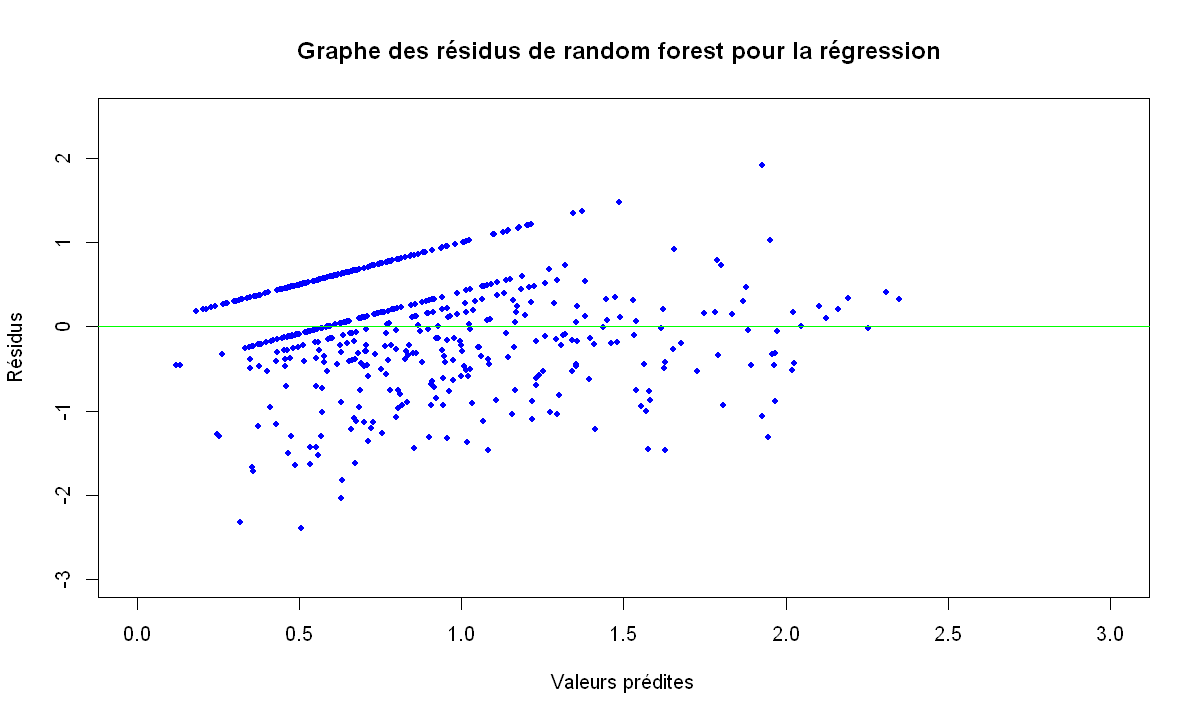

In [130]:
options(repr.plot.width = 10, repr.plot.height = 6)
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"rain_mod"]
plot.res(x = fit.rfr,y = res.rfr, titre = "Graphe des r√©sidus de random forest pour la r√©gression "
         ,lim_x = c(0, 3),lim_y = c(-3, 2.5))

<font color = "blue"> Nous tra√ßons l'indice d'importance des variables :

In [131]:
rf.reg$importance

%IncMSE    IncNodePurity
date            0.02652800 28.92756     
ff_mod          0.01319485 11.90802     
t_mod           0.02887324 13.01083     
td_mod          0.02259563 12.34371     
hu              0.03350001 17.64344     
dd_mod          0.04286525 15.57418     
precip_mod      0.06356185 29.55021     
ws_arome_mod    0.01583693 13.32228     
p3031_arome_mod 0.02535070 14.59616     
u10_arome       0.04004005 18.76042     
v10_arome       0.04587777 21.14907     
t2m_arome_mod   0.01748118 10.90053     
d2m_arome_mod   0.02189981 11.60736     
r_arome_mod     0.01556713 14.01783     
tp_arome_mod    0.02001053 20.86789     
msl_arome_mod   0.11928855 54.38121

<font color = "blue"> Nous tra√ßons ensuite le graphe de l'importance des variables. Pour cela, nous s√©lectionnons la MDA (%IncMSE)

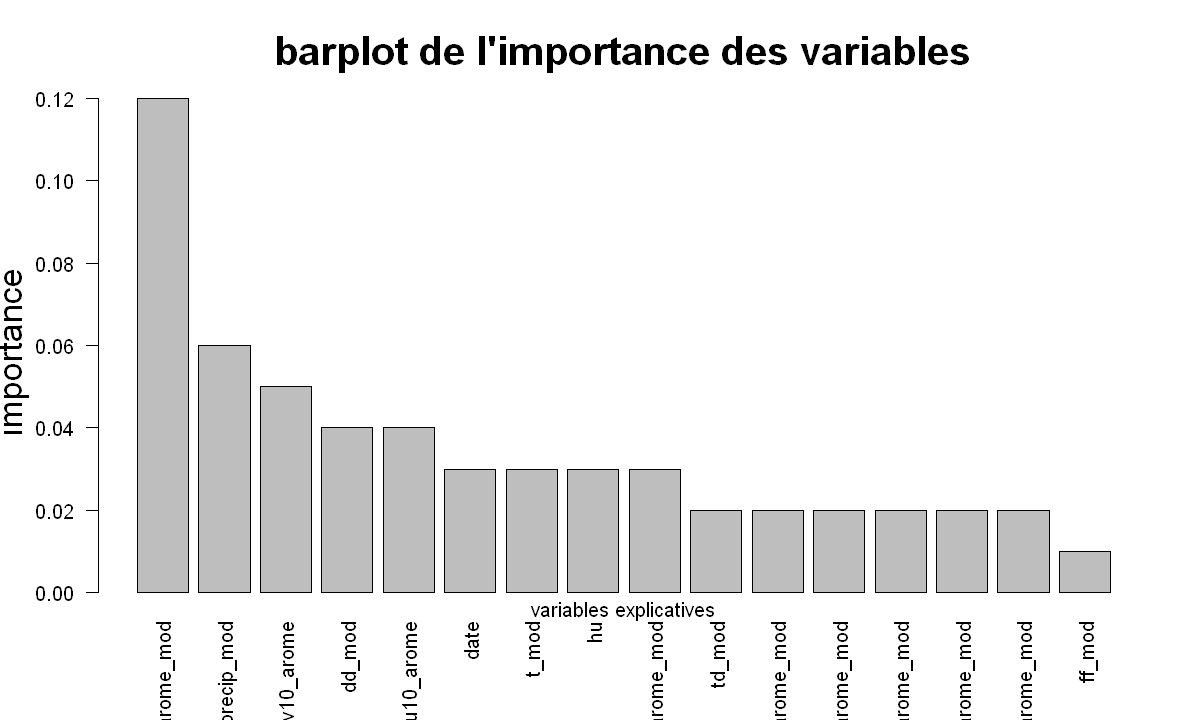

In [132]:
A = rf.reg$importance[,"%IncMSE"]
options(repr.plot.width = 10, repr.plot.height = 6)
barplot(sort(round(A, 2), decreasing=TRUE), main="barplot de l'importance des variables",
        xlab="",
        ylab="importance ",
        cex.main=2, cex.lab=1.7, cex.sub=1.2, las = 2)
mtext("variables explicatives", side=1,line=0)

<font color = "blue"> On voit que les param√®tres ayant le plus d'importance sont arome_mod et precip_mod et u10_arome. Ce sont les variables que nous retrouvions lors de la construction d'un seul arbre CART.

<font color = "blue"> Calculons l'erreur de regression :

In [133]:
# Calcul des pr√©visions
pred.forestr=rf.reg$test$predicted
# Erreur quadratique moyenne de pr√©vision en r√©gression = erreur de g√©n√©ralisation sur √©chantillon de test
paste("erreur de g√©n√©ralisation: ",sum((pred.forestr-datestr[,"rain_mod"])^2)/nrow(datestr))

#Calcul MSE sur l'√©chantillon d'apprentissage 
paste("MSE : ",mean(res.rfr^2)) #res = r√©didus


[1] "erreur de g√©n√©ralisation:  0.432930345032424"

[1] "MSE :  0.415435032230498"

<font color = "blue"> Ici, nous avons une erreur un peu moins importante que dans la cas d'un seul arbre (de 0.50 pour un seul arbre √† 0.43 pour la for√™t).  
    
<font color = "blue"> La regression est adapt√©e dans le cas o√π a variable √† expliquer est continue. Or, ici, il y a beaucoup de jours √†√π la pluie est nulle, donc il y a une grosse masse d'observations autour de 0. Donc les m√©thodes qui utilisent la regression ne sont peut-√™tre pas adapt√©es √† notre jeu de donn√©es.

#### Discrimination
**Q** Quelle est la valeur par d√©faut de `mtry`?

<font color = "blue"> $m = \sqrt{p} $ dans le cas de la classification

<font color = "blue"> Donc ici $m=\sqrt{9}=3$

In [134]:
rf.dis=randomForest(rain_class~.,data=datappq,xtest=datestq[,-17],ytest=datestq[,
   "rain_class"],ntree=500,do.trace=50,importance=TRUE)

ntree      OOB      1      2      3|    Test      1      2      3
   50:  48.91% 46.71% 40.61% 62.13%|  48.55% 58.33% 41.27% 51.28%
  100:  48.36% 44.74% 41.48% 60.95%|  47.10% 52.78% 41.27% 51.28%
  150:  47.27% 46.05% 36.68% 62.72%|  47.10% 52.78% 44.44% 46.15%
  200:  46.73% 45.39% 36.24% 62.13%|  47.83% 52.78% 44.44% 48.72%
  250:  47.45% 46.71% 36.68% 62.72%|  47.83% 50.00% 46.03% 48.72%
  300:  46.18% 44.74% 37.12% 59.76%|  50.00% 50.00% 47.62% 53.85%
  350:  46.18% 46.71% 37.55% 57.40%|  50.00% 50.00% 49.21% 51.28%
  400:  46.36% 46.05% 38.43% 57.40%|  50.00% 50.00% 49.21% 51.28%
  450:  46.55% 47.37% 37.55% 57.99%|  49.28% 50.00% 47.62% 51.28%
  500:  46.91% 47.37% 38.43% 57.99%|  48.55% 50.00% 46.03% 51.28%


<font color = "blue"> Avec le graphique ci-dessus, on obtient taux de mal class√©s dans chaque classe, ce qui est important, m√™me pour 500 arbres.
    
<font color = "blue"> Nous pouvons faire varier les param√®tres pour trouver leur valeur optimale dans le cas de la discrimination.

In [135]:
Mtries = seq (3,8,1) #rappel : il y a p = 16 variables en tout
for (m in Mtries) {
    print(paste("test de random forest avec mtry = ",m))
    rf.dis2=randomForest(rain_class~.,data=datappq,xtest=datestq[,-17],ytest=datestq[,
   "rain_class"],ntree=500,do.trace=500,mtry = m,importance=TRUE)
    }

[1] "test de random forest avec mtry =  3"
ntree      OOB      1      2      3|    Test      1      2      3
  500:  47.82% 47.37% 38.86% 60.36%|  47.83% 52.78% 46.03% 46.15%
[1] "test de random forest avec mtry =  4"
ntree      OOB      1      2      3|    Test      1      2      3
  500:  46.55% 46.71% 36.24% 60.36%|  50.72% 52.78% 50.79% 48.72%
[1] "test de random forest avec mtry =  5"
ntree      OOB      1      2      3|    Test      1      2      3
  500:  47.27% 46.71% 38.43% 59.76%|  48.55% 52.78% 46.03% 48.72%
[1] "test de random forest avec mtry =  6"
ntree      OOB      1      2      3|    Test      1      2      3
  500:  47.45% 46.05% 40.61% 57.99%|  50.72% 52.78% 50.79% 48.72%
[1] "test de random forest avec mtry =  7"
ntree      OOB      1      2      3|    Test      1      2      3
  500:  48.18% 49.34% 38.43% 60.36%|  52.90% 58.33% 52.38% 48.72%
[1] "test de random forest avec mtry =  8"
ntree      OOB      1      2      3|    Test      1      2      3
  500:  47.82% 4

In [136]:
print("test de random forest en faisant varier ntree")
rf.dis2=randomForest(rain_class~.,data=datappq,xtest=datestq[,-17],ytest=datestq[,
   "rain_class"],ntree=800,do.trace=50,mtry = 4,importance=TRUE)

[1] "test de random forest en faisant varier ntree"
ntree      OOB      1      2      3|    Test      1      2      3
   50:  50.00% 47.37% 40.17% 65.68%|  52.17% 58.33% 50.79% 48.72%
  100:  49.45% 48.68% 40.17% 62.72%|  50.72% 58.33% 47.62% 48.72%
  150:  48.91% 48.68% 41.48% 59.17%|  51.45% 58.33% 49.21% 48.72%
  200:  48.55% 48.68% 40.17% 59.76%|  49.28% 55.56% 46.03% 48.72%
  250:  48.91% 47.37% 40.61% 61.54%|  47.83% 52.78% 47.62% 43.59%
  300:  48.73% 48.03% 40.17% 60.95%|  49.28% 55.56% 47.62% 46.15%
  350:  48.73% 47.37% 40.17% 61.54%|  50.72% 55.56% 50.79% 46.15%
  400:  48.18% 45.39% 39.74% 62.13%|  50.00% 52.78% 50.79% 46.15%
  450:  47.27% 44.08% 38.43% 62.13%|  49.28% 52.78% 49.21% 46.15%
  500:  47.45% 44.08% 38.86% 62.13%|  49.28% 52.78% 49.21% 46.15%
  550:  46.91% 44.74% 38.43% 60.36%|  49.28% 52.78% 49.21% 46.15%
  600:  47.09% 44.74% 37.99% 61.54%|  49.28% 52.78% 49.21% 46.15%
  650:  46.36% 44.74% 36.24% 61.54%|  49.28% 52.78% 49.21% 46.15%
  700:  46.36% 45.39% 36

<font color = "blue"> On observe que les param√®tres optimaux sont : `mtry` = 4 et `ntree` = 700 (car 50 arbres semble trop faible).

<font color = "blue"> On red√©finit la for√™t avec les param√®tres optimaux :

In [137]:
rf.dis=randomForest(rain_class~.,data=datappq,xtest=datestq[,-17],ytest=datestq[,
   "rain_class"],ntree=700,mtry = 4,importance=TRUE)

In [138]:
rf.dis$importance

high_rain   low_rain      no_rain       MeanDecreaseAccuracy
date            0.017308824  0.0104562703  0.0082448811 0.011668674         
ff_mod          0.007975702  0.0037418689 -0.0011426211 0.003398131         
t_mod           0.029923022  0.0074923319  0.0001836386 0.011283731         
td_mod          0.015426418  0.0065957542  0.0023353077 0.007705199         
hu              0.023352123  0.0043463501  0.0186367352 0.013982771         
dd_mod          0.023656703  0.0001408644  0.0052565600 0.008277381         
precip_mod      0.028790122 -0.0005751952  0.0355506699 0.018482589         
ws_arome_mod    0.005630870  0.0060673424  0.0001965784 0.004058304         
p3031_arome_mod 0.022880790  0.0043807654  0.0049203895 0.009570786         
u10_arome       0.013604166  0.0056140250  0.0153784690 0.010857865         
v10_arome       0.008590069  0.0062743838  0.0035557327 0.006033986         
t2m_arome_mod   0.018394226  0.0081211343  0.0029987915 0.009228365         
d2m_arome_mod   0.015478629  0.0108385583  0.0058773401 0.010492296         
r_arome_mod     0.012383415  0.0052714281  0.0111317270 0.009009410         
tp_arome_mod    0.016644164 -0.0005907646  0.0147892546 0.009018396         
msl_arome_mod   0.088264261  0.0110616642  0.0189140938 0.034848743         
                MeanDecreaseGini
date            30.25498        
ff_mod          17.80071        
t_mod           19.22893        
td_mod          19.31609        
hu              24.53218        
dd_mod          20.39876        
precip_mod      21.14990        
ws_arome_mod    18.82092        
p3031_arome_mod 21.79411        
u10_arome       24.31784        
v10_arome       21.19251        
t2m_arome_mod   17.51881        
d2m_arome_mod   20.09691        
r_arome_mod     21.24736        
tp_arome_mod    22.34451        
msl_arome_mod   39.88150

<font color = "blue"> Il y a deux crit√®res d'importance MDI et MDA. Ils sont calcul√©s apr√®s avoir construit notre for√™t. En effet, lorsque nous aggr√©geons les arbres, l'interpr√©tation devient difficile : ce n'est pas parce que'un variable est situ√©e au premier split d'un arbre qu'elle est la plus importante (car on a s√©lectionn√© al√©atoirement $m$ variables parmi $p$). Afin d'aider √† l'intepr√©tation du mod√®le, on calcule les indices d'importances des variables MDA et MDI. Si une variable a un indice d'importance √©lev√©, c'est une variable qui a √©t√© d√©cisive dans la construction de l'arbre et qui influence le r√©sultat obtenu.
    
<font color = "blue"> Nous tra√ßons un graphique de l'importance des variables :     

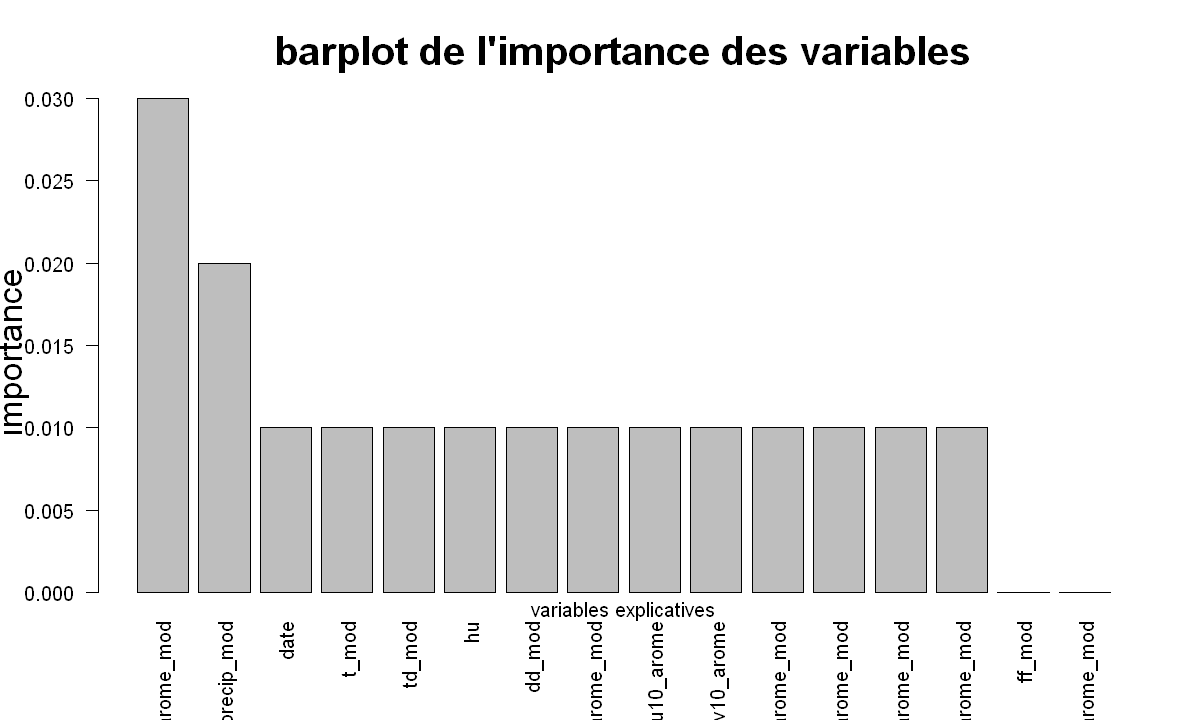

In [139]:
A = rf.dis$importance[,"MeanDecreaseAccuracy"]
options(repr.plot.width = 10, repr.plot.height = 6)
barplot(sort(round(A, 2), decreasing=TRUE), main="barplot de l'importance des variables",
        xlab="",
        ylab="importance ",
        cex.main=2, cex.lab=1.7, cex.sub=1.2, las = 2)
 mtext("variables explicatives", side=1,line=0)

<font color = "blue"> On trace le graphique de l'indice d'importance de la MeanDecreaseAccuracy. On voit que les param√®tres ayant le plus d'importance sont arome_mod et precip_mod. Ce sont les variables que nous retrouvions lors de la construction d'un seul arbre CART.

<font color = "blue"> Calculons la table de contingence : 

In [140]:
# M√™me chose pour l'arbre de discrimination
table(rf.dis$test$predicted,datestq[,"rain_class"])

           
            high_rain low_rain no_rain
  high_rain        17       15       5
  low_rain         17       31      13
  no_rain           2       17      21

In [141]:
paste("Purity arbre for√™t al√©atoire :", purity(table(rf.dis$test$predicted,datestq[,"rain_class"])))
paste("F1_Score arbre for√™t al√©atoire :", F1_Score(rf.dis$test$predicted,datestq[,"rain_class"]))

[1] "Purity arbre for√™t al√©atoire : 0.5"

[1] "F1_Score arbre for√™t al√©atoire : 0.465753424657534"

- <font color = "blue">  lorsque la valeur observ√©e est **high_rain** le mod√®le se trompe une fois sur deux et pr√©dit low_rain.
- <font color = "blue">  lorsque la valeur observ√©e est **low_rain** le mod√®le se trombe aussi une fois sur deux et pr√©dit high_rain et no_rain avec m√™me probabilit√©.  
- <font color = "blue">  lorsque la valeur observ√©e est **no_rain** le mod√®le se trombe encore une fois sur deux et pr√©dit low_rain. 
 

<font color = "blue"> Ces r√©sultats sont les m√™mes que sur un arbre CART ce qui n'est pas satisfaisant. Dans ce cas, l'aggr√©gation n'a pas am√©lior√© notre mod√®le. 

<font color = "blue"> On transforme la r√©gression en classification :

In [142]:
pred.forestr.C = table(RegToClassif(pred.forestr), datestq[, "rain_class"])
print("Table de contingence de la for√™t al√©atoire")
print("o√π on a transform√© la r√©gression en classification")
pred.forestr.C

paste("Purity for√™t al√©atoire o√π on a transform√© la r√©gression en classification:", purity(pred.forestr.C))
paste("F1_Score or√™t o√π on a transform√© la r√©gression en classification:", F1_Score(RegToClassif(pred.forestr), datestq[, "rain_class"]))

[1] "Table de contingence de la for√™t al√©atoire"
[1] "o√π on a transform√© la r√©gression en classification"


           
            high_rain low_rain no_rain
  high_rain        13        6       3
  low_rain         23       57      36

[1] "Purity for√™t al√©atoire o√π on a transform√© la r√©gression en classification: 0.507246376811594"

[1] "F1_Score or√™t o√π on a transform√© la r√©gression en classification: 0.448275862068966"

### Boosting

Deux librairies proposent des versions relativement  sophistiqu√©es des algorithmes de *boosting* dans R. La librairie *boost* propose 4 approches : *adaboost, bagboost* et deux *logitboost*. D√©velopp√©es pour une probl√©matique particuli√®re : l'analyse des donn√©es d'expression g√©nomique, elle n'est peut-√™tre pas compl√®tement adapt√©e aux donn√©es √©tudi√©es ; elles se limitent √† des pr√©dicteurs quantitatifs et peut fournir des r√©sultats √©tranges. La librairie *gbm* lui est pr√©f√©r√©e ; elle offre aussi plusieurs versions d√©pendant de la fonction co√ªt choisie. Une librairie plus r√©cente `xgboost` int√®gre des fonctionnalit√©s de parall√©lisation (pas sous Windows) et fait intervenir plusieurs autres param√®tres.

La variable √† pr√©voir doit √™tre cod√©e num√©riquement (0,1) pour cette impl√©mentation. Le nombre d'it√©rations, ou nombre d'arbres, est param√©tr√© ainsi qu'un coefficient de r√©tr√©cissement (*shrinkage*).

**Q** Comment intervient le *schrinkage* en *boosting*? 

<font color = "blue"> Le *schrinkage* (seuillage) consiste √† redimensionner (scaling) la contribution de chaque arbre par un facteur $\nu$ ce qui permet d'√©viter l'overfitting.</font>

**Q** Pour quel boosting? Ou que signifie `gbm`?

<font color = "blue"> Le *schrinkage* intervient dans les *Gradient Boosting Models (GBM)*.</font>
    
*Attention*, par d√©faut, ce param√®tre a une valeur tr√®s faible (0.001) et il faut un nombre important d'it√©rations (d'arbres) pour atteindre une estimation raisonnable. La qualit√© est visualis√©e par un graphe repr√©sentant l'√©volution de l'erreur d'apprentissage. D'autre part, une proc√©dure de validation crois√©e est incorpor√©e afin d'optimiser le nombre d'arbres car la version de *boosting* consid√©r√©e est (l√©g√®rement) sujette au sur-apprentissage.

<font color = "red"> **Attention** : Dans le Boosting, les r√©sultats num√©riques changent √† chaque run. </font>

#### R√©gression

In [143]:
boost.reg = gbm(rain_mod ~ ., data = datappr, distribution = "gaussian", n.trees = 500, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)
#fixer verbose √† FALSE pour √©viter trop de sorties
#n.minobsinnode : Integer specifying the minimum number of observations in the terminal nodes of the trees.

<font color = "blue"> Le nombre d'it√©rations $M$ est un param√®tre √† calibrer. Chaque it√©ration d'un algorithme de boosting r√©duit la **training error** et donc de grandes valeurs de $M$ m√®nent √† de **l'overfitting**. On peut calibrer ce param√®tre en estimant la **generalization error** sur un √©chantillon de validation (par exemple en utilisant la cross-validation) et on choisit la valeur de $M$ qui minimise cette erreur.

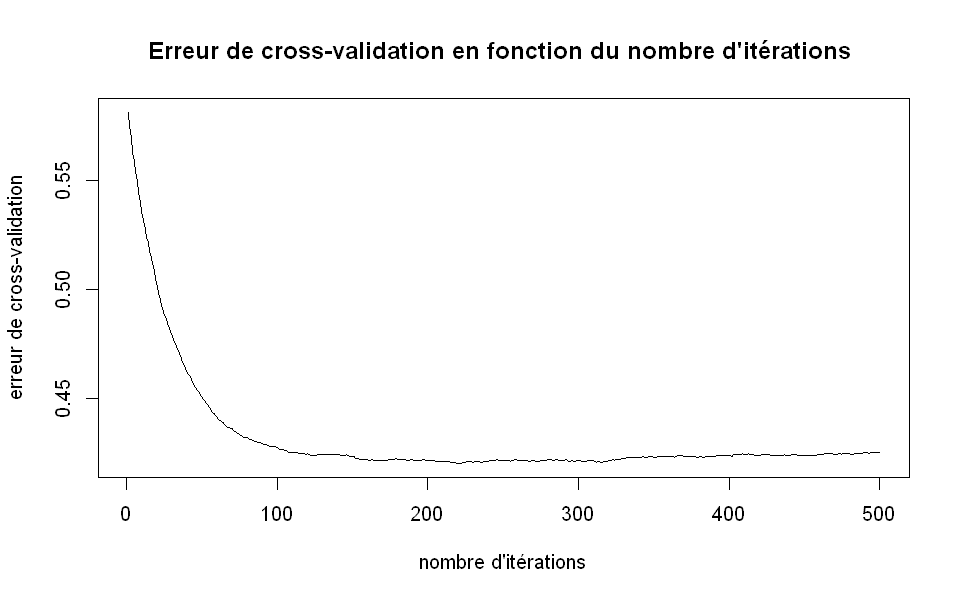

In [144]:
options(repr.plot.width = 8, repr.plot.height = 5)
plot(boost.reg$cv.error, xlab = "nombre d'it√©rations", ylab = "erreur de cross-validation",
     type = "l", main = "Erreur de cross-validation en fonction du nombre d'it√©rations ")

<font color = "blue"> Le graphique ci-dessus est pr√©sente l'erreur de cross-validation en fonction du nombre d'it√©rations $M$. Dans la cellule ci-dessous, on choisit la valeur de $M$ qui minimise l'erreur de cross-validation.

[1] "nombre d'it√©rations optimal : 220"


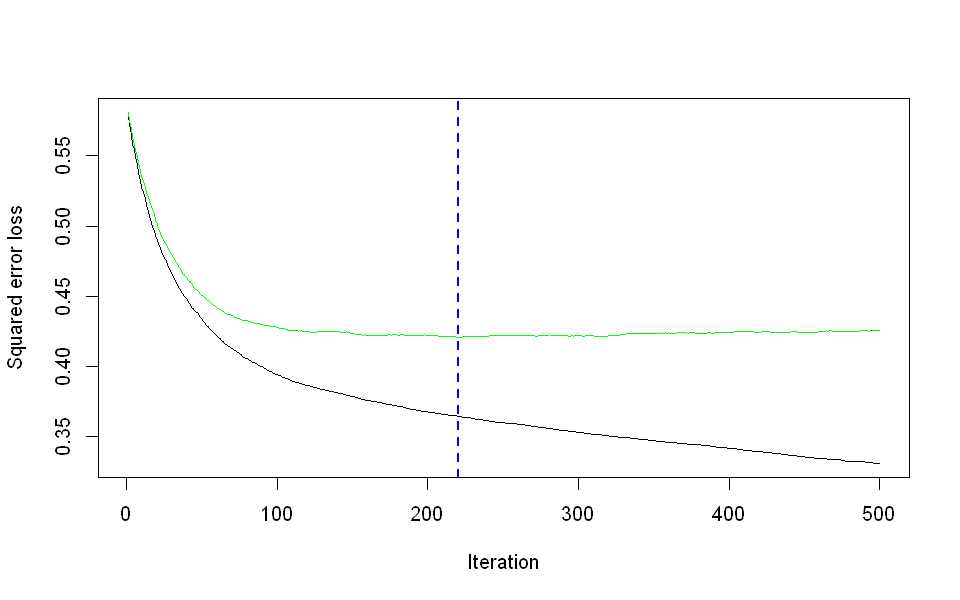

In [145]:
# nombre optimal d'it√©rations par valiation crois√©e
best.iter=gbm.perf(boost.reg,method="cv")
print(paste("nombre d'it√©rations optimal :", best.iter))

<font color = "blue"> La commande ci-dessus g√©n√®re 2 plots :
- <font color = "blue"> en noir : l'erreur de g√©n√©ralisation (`boost.reg$train.error`) en fonction du nombre d'it√©rations.
- <font color = "blue"> en vert : l'erreur de cross-validation (`boost.reg$cv.error`) en fonction du nombre d'it√©rations
    
<font color = "blue"> On observe donc que $M $ = `best.iter` it√©rations minimise ces deux erreurs. 

On peut s'assurer de l'absence d'un ph√©nom√®ne de sur-apprentissage critique en calculant puis tra√ßant l'√©volution de l'erreur sur l'√©chantillon test en fonction du nombre d'arbre dans le mod√®le. L'erreur reste stable autour du nombre d'arbres s√©lectionn√© et mat√©rialis√© par la ligne verticale. 

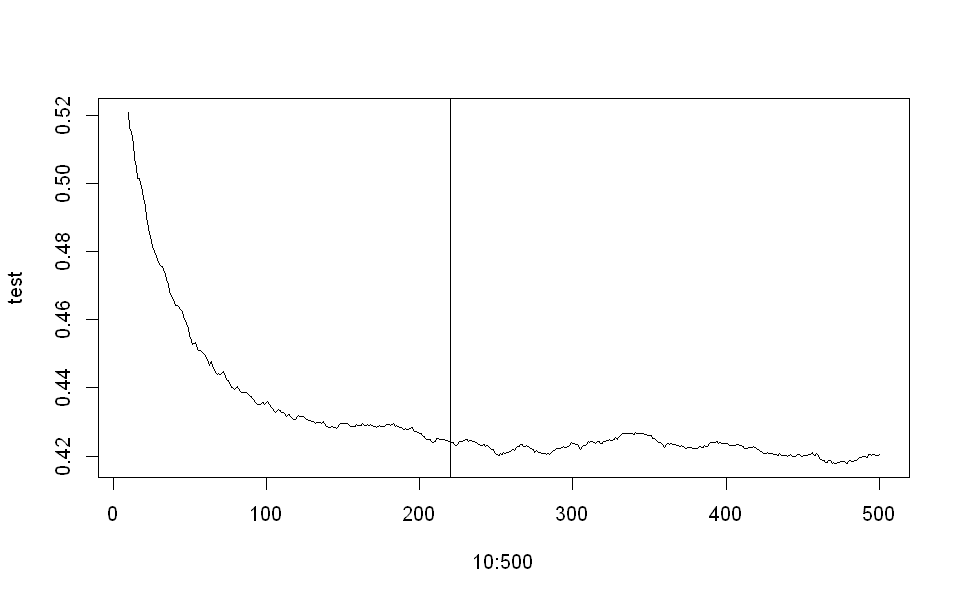

In [146]:
test=numeric()
for (i in 10:500){
pred.test=predict(boost.reg,newdata=datestr,n.trees=i)
err=sum((pred.test-datestr[,"rain_mod"])^2)/nrow(datestr)
test=c(test,err)
}
plot(10:500,test,type="l")
abline(v=best.iter)

**Q** Tester ces fonctions en faisant varier le coefficient de r√©tr√©cissement.

<font color = "blue"> Nous pouvons faire varierle param√®tre de *shrinkage* et choisir celui qui donne la plus petite erreur de g√©n√©ralisation pour un nombre d'it√©rations fix√© $M$ = `best.iter`.

In [147]:
ntries = best.iter
s = seq (0.01, 0.1, 0.02)
test_s=numeric()
tab_err = matrix(, nrow = length(s), ncol = 2) 
#tab_err : colonne 1 : la valeur du shrinkage, colonne 2 : la valeur de l'erreur

for (i in  1:length(s)) {
    boost.reg_s = gbm(rain_mod ~ ., data = datappr, distribution = "gaussian", n.trees = ntries, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = s[i], verbose = FALSE)
    
    pred.test_s = predict(boost.reg_s,newdata=datestr,n.trees=ntries)
    err_s =sum((pred.test_s-datestr[,"rain_mod"])^2)/nrow(datestr)
    tab_err[i,1] = s[i]
    tab_err[i,2] = err_s  
}

In [148]:
tab_err
best.shrink.r = tab_err [which(tab_err == min(tab_err[,2]), arr.ind=TRUE)[1],1]
print(paste("shrinkage minimisant l'erreur de g√©n√©ralisation : ",best.shrink.r))

[,1] [,2]     
[1,] 0.01 0.4389684
[2,] 0.03 0.4275772
[3,] 0.05 0.4317562
[4,] 0.07 0.4298733
[5,] 0.09 0.4253137

[1] "shrinkage minimisant l'erreur de g√©n√©ralisation :  0.09"


<font color = "blue"> On red√©finit le boosting avec les param√®tres optimaux :

In [149]:
boost.reg = gbm(rain_mod ~., data = datappr, distribution = "gaussian", n.trees = best.iter, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = best.shrink.r, verbose = FALSE)

#### Discrimination

Attention, la variable √† mod√©liser doit √™tre cod√©e $(0, 1)$ et il faut pr√©ciser un autre param√®tre de distribution pour consid√©rer le bon terme d'erreur.

<font color = "blue"> Pas besoin de transformer les modalit√©s entre (0,1), il suffit d'utiliser `distribution = "multinomial"` dans la m√©thode `gbm`. Ceci aurait √©t√© utile si nous avions 2 classes et que nous pouvions utiliser *Adaboost*.

In [150]:
#Ce code transforme les 3 modalit√©s en valeurs num√©riques comprises entre (0,1)*
#Il s'av√®re que ce n'est pas utile si in utilise distribution = "multinomial" dans gbm
datappq2=datappq
datappq2[,"rain_class"]=as.numeric(datappq[,"rain_class"])
#rescale les donn√©es entre 0 et 1
datappq2[,"rain_class"] = (datappq2[,"rain_class"] - min(datappq2[,"rain_class"])) / (max(datappq2[,"rain_class"]) - min(datappq2[,"rain_class"]))
# on obtient : 
# 0.0 : high_rain
# 0.5 : low_rain 
# 1.0 : no_rain

In [151]:
boost.dis=gbm(rain_class~.,data=datappq, distribution = "multinomial", n.trees=500, cv.folds=10,
              n.minobsinnode = 5,shrinkage=0.03,verbose=FALSE)

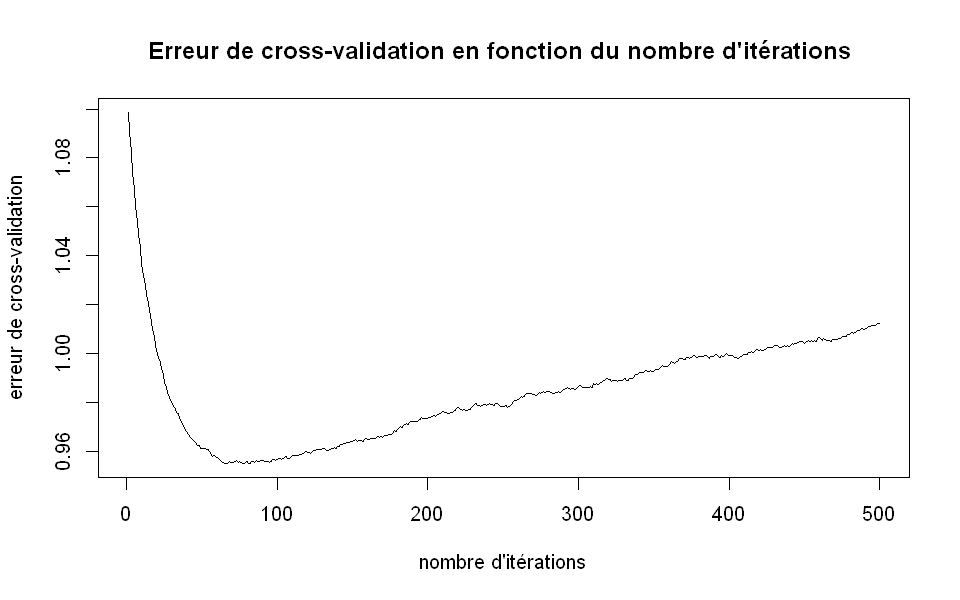

In [152]:
options(repr.plot.width = 8, repr.plot.height = 5)
plot(boost.dis$cv.error,type="l", xlab = "nombre d'it√©rations", ylab = "erreur de cross-validation",
     main = "Erreur de cross-validation en fonction du nombre d'it√©rations ")

[1] "nombre d'it√©rations optimal : 81"


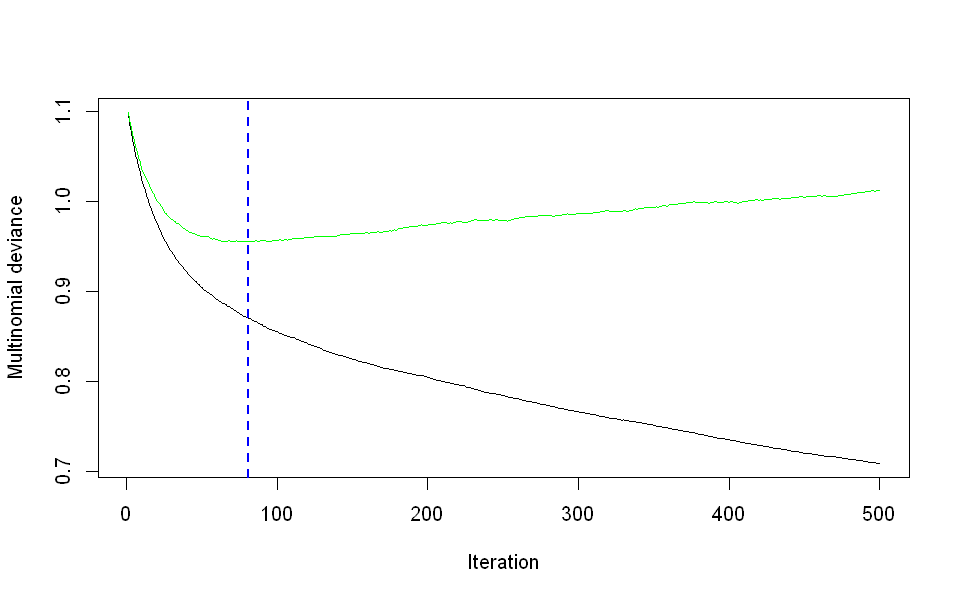

In [153]:
# nombre optimal d'it√©rations 
best.ited=gbm.perf(boost.dis,method="cv")
print(paste("nombre d'it√©rations optimal :", best.ited))

<font color = "blue"> Comme pour la regression, on a 2 plots :
- <font color = "blue"> en noir : l'erreur de g√©n√©ralisation (`boost.dis$train.error`) en fonction du nombre d'it√©rations.
- <font color = "blue"> en vert : l'erreur de cross-validation (`boost.dis$cv.error`) en fonction du nombre d'it√©rations
    
<font color = "blue"> On observe donc que $M $ = `best.ited` it√©rations minimise ces deux erreurs. 

Comme pour la r√©gression, il est possible de faire varier le coefficient de r√©tr√©cissement en l'associant au nombre d'arbres dans le mod√®le.

<font color = "blue"> Nous pouvons faire varier le param√®tre de *shrinkage* et choisir celui qui donne la meilleure puret√© pour un nombre d'it√©rations fix√© $M$ = `best.iter`.

In [154]:
ntries = best.ited
s = seq (0.01, 0.1, 0.02)
test_s=numeric()
purityTab = matrix(, nrow = length(s), ncol = 2) 
#purityTab : colonne 1 : la valeur du shrinkage, colonne 2 : la valeur de la puret√©

for (i in  1:length(s)) {
    boost.dis_s = gbm(rain_class~.,data=datappq, distribution = "multinomial", n.trees=ntries, cv.folds=10,
              n.minobsinnode = 5,shrinkage=s[i],verbose=FALSE)
    #pr√©diction
    pred.boostd_s = predict(boost.dis_s,newdata=datestq,n.trees=ntries,type="response")
    #construction d'une table de confusion 
    pred.boostd_s = colnames(pred.boostd_s)[apply(pred.boostd_s, 1, which.max)]
    table_s = table (pred.boostd_s,datestq[,"rain_class"])
    purityTab[i,1] = s[i]
    purityTab[i,2] = purity(table_s)
   
}

In [155]:
purityTab
best.shrink.d = purityTab [which(purityTab == min(purityTab[,2]), arr.ind=TRUE)[1],1]
print(paste("shrinkage maximisant la puret√© : ",best.shrink.d))

[,1] [,2]     
[1,] 0.01 0.5362319
[2,] 0.03 0.5144928
[3,] 0.05 0.5144928
[4,] 0.07 0.5362319
[5,] 0.09 0.5144928

[1] "shrinkage maximisant la puret√© :  0.03"


<font color = "blue"> On red√©finit le boosting avec les param√®tres optimaux.

In [156]:
boost.dis = gbm(rain_class~.,data=datappq, distribution = "multinomial", n.trees=best.ited, cv.folds=10,
              n.minobsinnode = 5,shrinkage=best.shrink.d,verbose=FALSE)

Calcul des r√©sidus et graphe.

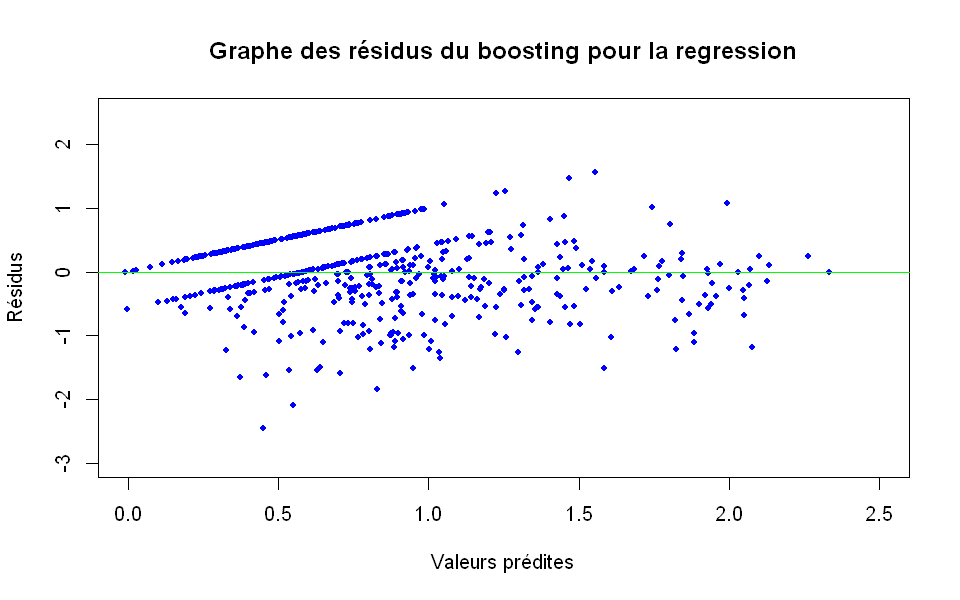

In [157]:
fit.boostr=boost.reg$fit
res.boostr=fit.boostr-datappr[,"rain_mod"]
plot.res(fit.boostr,res.boostr,titre = "Graphe des r√©sidus du boosting pour la regression"
         ,lim_x = c(0, 2.5),lim_y = c(-3, 2.5))

### Pr√©vision de l'√©chantillon test

#### Erreur de r√©gression

In [158]:
# Boosting 
pred.boostr=predict(boost.reg,newdata=datestr,n.trees=best.iter)
# Erreur quadratique moyenne de pr√©vision = erreur de g√©n√©ralisation sur l'√©chantillon de test
paste("erreur de g√©n√©ralisation: ",sum((pred.boostr-datestr[,"rain_mod"])^2)/nrow(datestr))

#Calcul MSE sur l'√©chantillon d'apprentissage 
paste("MSE : ",mean(res.boostr^2)) #res = r√©didus


[1] "erreur de g√©n√©ralisation:  0.435567267296028"

[1] "MSE :  0.322478725906414"

<font color = "blue"> On peut observer de meilleurs r√©sultats (erreur plus faible) que pour les algorithmes d'*abre de d√©cision binaire*, *R√©seau de neurones*, ou encore *For√™t al√©atoire*

#### Erreur de classification (matrices de confusion)

In [192]:
# Boosting 
# M√™me chose pour la discrimination
pred.boostd = predict(boost.dis,newdata=datestq,n.trees=best.ited, type="response")
#si on ne met pas type="response" on a log probabilities. 
#en mettant type="response", on a la probabilit√© de chaque modalit√©.
pred.boostd = colnames(pred.boostd)[apply(pred.boostd, 1, which.max)]
table(pred.boostd,datestq[,"rain_class"])

           
pred.boostd high_rain low_rain no_rain
  high_rain        16       11       4
  low_rain         19       40      15
  no_rain           1       12      20

In [193]:
paste("Purity pour le Boosting", purity (table(pred.boostd,datestq[,"rain_class"])))
paste("F1_Score pour le Boosting", F1_Score(pred.boostd,datestq[,"rain_class"]))

[1] "Purity pour le Boosting 0.550724637681159"

[1] "F1_Score pour le Boosting 0.477611940298507"

<font color = "blue"> Nous observons :
    
- <font color = "blue">  lorsque la valeur observ√©e est **high_rain** le mod√®le se trompe une fois sur deux et pr√©dit low_rain.
- <font color = "blue">  lorsque la valeur observ√©e est **low_rain** le mod√®le se trompe aussi une fois sur deux et pr√©dit high_rain et no_rain avec m√™me probabilit√© environ.  
- <font color = "blue">  lorsque la valeur observ√©e est **no_rain** le mod√®le se trompe encore une fois sur deux et pr√©dit low_rain. 

**Q** Quelle  strat√©gie d'agr√©gation de mod√®les vous semble fournir le meilleur r√©sultat de pr√©vision? 

**Q** Est-elle, sur ce jeu de donn√©es, plus efficace que les mod√®les classiques exp√©riment√©s auparavant ?

<font color ="blue"> Nous transformons la r√©gression en classification :

In [161]:
pred.boostr.C = table(RegToClassif(pred.boostr), datestq[, "rain_class"])
print("Table de contingence de le Boosting")
print("o√π on a transform√© la r√©gression en classification")
pred.boostr.C

paste("Purity pour le Boosting o√π on a transform√© la r√©gression en classification :",purity (pred.boostr.C))
paste("F1_Score pour le Boosting o√π on a transform√© la r√©gression en classification :",F1_Score(RegToClassif(pred.boostr),datestq[,"rain_class"]))

[1] "Table de contingence de le Boosting"
[1] "o√π on a transform√© la r√©gression en classification"


           
            high_rain low_rain no_rain
  high_rain        13        7       2
  low_rain         23       55      36
  no_rain           0        1       1

[1] "Purity pour le Boosting o√π on a transform√© la r√©gression en classification : 0.5"

[1] "F1_Score pour le Boosting o√π on a transform√© la r√©gression en classification : 0.448275862068966"

#### Courbes ROC

<FONT COLOR = "blue"> Dans le cas multinomial on ne peut pas tracer la courbe ROC. </font>

**Q** Qu'indique la comparaison des coubes ROC?

# <FONT COLOR="Red">√âpisode 4</font>

## [S√©parateur √† Vaste Marge (SVM)](http://wikistat.fr/pdf/st-m-app-svm.pdf)

### Introduction

Malgr√© les assurances th√©oriques concernant ce type d'algorithme, les r√©sultats d√©pendant fortement du choix des param√®tres. Nous nous limiterons d'abord au noyau gaussien (choix par d√©faut) ; la fonction `tune.svm` permet de tester facilement plusieurs situations en estimant la qualit√© de pr√©vision par validation crois√©e sur une grille. Le temps d'ex√©cution en R est un peu long... 

**Q** Le temps d'ex√©cution pour les SVM est-il plus sensible au nombre d'observations ou au nombre de varaibles ? Pourquoi ?


<FONT COLOR = "blue"> Le temps d'ex√©cution des SVM n'est pas sensible au nombre d'observations car seuls les vecteurs supports (donn√©es mal class√©es, √† l'int√©rieur ou sur les marges) interviennent dans le probl√®me de minimisation que doit r√©soudre l'algorithme des SVM. En revanche, un produit scalaire entre les individus intervient dans le calcul des SVM. Ainsi, plus le nombre de variables augmente et plus le produit scalaire sera long √† calculer.

    
<FONT COLOR = "blue"> La fonction svm de R peut √™tre utilis√©e pour de la classification (pour la variable **rain_class**), pour de la r√©gression (pour la variable **rain_mod**) ou pour de la d√©tection d'outliers.

### R√©gression

Bien qu'initialement d√©velopp√©s dans le cas d'une variable binaire, les SVM ont √©t√© √©tendus aux probl√®mes de r√©gression. L'estimation et l'optimisation du coefficient de p√©nalisation sont obtenues par les commandes suivantes.  


In [162]:
# r√©alisation d'une SVM pour la r√©gression : avec la variable rain_mod (quantitative)
#--------------------------------------------------------------
svm.reg0 = svm(rain_mod ~ ., data = datappr, type = "eps",cross = 5) 
#type = "eps" : regression, kernel = radial par d√©fault (noyau gaussien)
#cross = 5: k-fold cross validation on the training data to assess the quality of the model (mean square error)
summary(svm.reg0)


Call:
svm(formula = rain_mod ~ ., data = datappr, type = "eps", cross = 5)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.03703704 
    epsilon:  0.1 


Number of Support Vectors:  499



5-fold cross-validation on training data:

Total Mean Squared Error: 0.4281628 
Squared Correlation Coefficient: 0.28278 
Mean Squared Errors:
 0.4121141 0.5174432 0.4071596 0.3954091 0.408688 




<FONT COLOR = "blue"> Dans le cas de la regression, la SVM essaie de trouver une fonction $f$ qui approche au mieux les donn√©es (la diff√©rence entre $f(x_i)$ et $y_i$ est au plus de $\epsilon$) et qui est la plus droite/plate possible ie: on essaye de trouver une fonction qui s'apparente √† une droite et qui fit au mieux nos donn√©es envoy√©es dans un certain espace de hilbert (RKHS). Pour envoyer nos donn√©es dans cet espace de hilbert, on utilise un kernel (ici le kernel gaussien).  
   
    
<FONT COLOR = "blue"> Nous ne pouvons pas tracer de graphe ici car il s'agit de regression.
    
<FONT COLOR = "blue"> Le noyeau gaussien est d√©fini par : $K(x,y)= exp (‚àí\gamma \sum_{n=1}^{p} (x_{ij}‚Äìy_{ij})^2)$ qui ne pr√©sente qu'un seul param√®tre $\gamma$. 
    
- <FONT COLOR = "blue">  Nous observons qu'il y a 499 vecteurs supports. En regression, les vecteurs supports sont les points du dataset qui sont sur les marges o√π en dehors des marge
    
- <FONT COLOR = "blue"> Nous avons par d√©faut `cost` = 1. La variable `cost` correspond au crit√®re de p√©nalisation C dans le probl√®me de minimisation que r√©sout les SVM (p.65 poly). Plus la p√©nalit√© C augmente et plus on r√©duit le nombre de vecteurs supports. En effet, plus C augment, plus les slack variables ùúâùëñ sont petits et donc plus on rapproche les marges et moins on a de vecteurs supports. Ici, `cost` = 1 donc C = 1 (param√®tre par d√©faut). Si C -> $\infty$ alors nous aurons que 3 vecteurs supports (ce qui est le nombre de points minimal pour tracer les marges qui sont 2 droites parall√®les) et on risque de faire du surapprentissage. L'algorithme deviendra peu robuste √† de nouvelles obervations.   

- <FONT COLOR = "blue"> Avec `cross` = 5 nous effectuons une 5-fold cross validation. Nous obtenons alors une valeur de `Mean Squared Errors` pour chaque √©tape de la cross-validation (= performance de l'algo calcul√©e sur chacun des folds par validation-crois√©e). La `Total Mean Squared Error` est la moyenne des `Mean Squared Errors`.
    
- <FONT COLOR = "blue"> `epsilon` = 0.1 (valeur par d√©faut) est la $\epsilon$ - sensitive loss function $l_{\epsilon}$ (p.65 poly) qui est une fonction perte insensible aux erreurs + petites que $\epsilon$.
       
- <FONT COLOR = "blue"> Enfin `gamma` est un param√®tre intervenant dans le kernel (default: 1/(data dimension))

In [163]:
help(svm)

In [164]:
# optimisation des param√®tres pour la SVM r√©gression
#--------------------------------------------------------------
#set.seed(2021)
svm.reg.tune = tune.svm(rain_mod ~ ., data = datappr, cost = c(0.3,0.4,0.5), gamma = seq(0.001, 0.1, by = 0.02))
#plot(svm.reg.tune) #on peut plot si on veut les param√®tres optimaux

#tune.svm : parameter Tuning of Functions Using Grid Search
#We will obtain the optimal values for the cost, gamma, and coef0 (si il y est)

In [165]:
summary(svm.reg.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
 0.021  0.5

- best performance: 0.4063127 

- Detailed performance results:
   gamma cost     error dispersion
1  0.001  0.3 0.4776717  0.1214075
2  0.021  0.3 0.4076337  0.1040823
3  0.041  0.3 0.4085083  0.1052563
4  0.061  0.3 0.4099741  0.1078852
5  0.081  0.3 0.4124507  0.1094619
6  0.001  0.4 0.4636052  0.1140309
7  0.021  0.4 0.4065282  0.1037593
8  0.041  0.4 0.4080577  0.1053592
9  0.061  0.4 0.4117990  0.1087427
10 0.081  0.4 0.4151241  0.1102054
11 0.001  0.5 0.4540076  0.1092759
12 0.021  0.5 0.4063127  0.1040230
13 0.041  0.5 0.4085696  0.1057204
14 0.061  0.5 0.4137987  0.1095000
15 0.081  0.5 0.4176742  0.1113919


<FONT COLOR = "blue"> Nous observons que les meilleurs param√®tres sont obtenus avec `gamma` = 0.021 et `cost` = 0.5. En faisant varier plusieurs fois les valeurs de cost et gamma, on observe que plus la valeur optimale de gamma trouv√©e diminue et plus la valeur optimale de cost augmente. On observe que plusieurs intervalles pour gamma et cost donnent des r√©sultats diff√©rents. L'optimisation des param√®tres n'est pas unique.

Par d√©faut la p√©nalisation (cost) vaut 1. Noter la p√©nalisation optimale pour le noyau consid√©r√© (gaussien). R√©-estimer le mod√®le suppos√© optimal avant de tracer le graphe des r√©sidus. Comme pr√©c√©demment, observer que plusieurs ex√©cutions conduisent √† des r√©sultats diff√©rents et donc que l'optimisaiton de ce param√®tre est pour le moins d√©licate.

<FONT COLOR = "blue"> Nous effectuons alors la svm avec les param√®tres optimaux :

In [166]:
# red√©finition de la SVM en utilisant les param√®tres optimaux trouv√©s prec√©demment.
#--------------------------------------------------------------
svm.reg = svm(rain_mod ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
              gamma = svm.reg.tune$best.parameters$gamma,cross = 5)

In [167]:
summary(svm.reg)


Call:
svm(formula = rain_mod ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma, cross = 5)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  0.5 
      gamma:  0.021 
    epsilon:  0.1 


Number of Support Vectors:  494



5-fold cross-validation on training data:

Total Mean Squared Error: 0.4074598 
Squared Correlation Coefficient: 0.3074696 
Mean Squared Errors:
 0.4252767 0.3132174 0.4615686 0.4840812 0.3531551 




<FONT COLOR = "blue"> On observe que le nombre de vecteurs supports a faiblement diminu√© (de 499 √† 494). La valeur de C a diminu√© (cost est pass√© de 1 √† 0.5) donc on s'attendrait √† avoir davantage de vecteurs supports. Ceci peut s'expliquer par le fait que la param√®tre gamma intervenant dans la d√©finition du kernel contrebalance l'effet de C.
    
<FONT COLOR = "blue"> Avec l'optimisation des param√®tres, on observe que l'on a diminu√© la `Total Mean Squared Error` qui est pass√© de 0.4267061 √† 0.4022425.

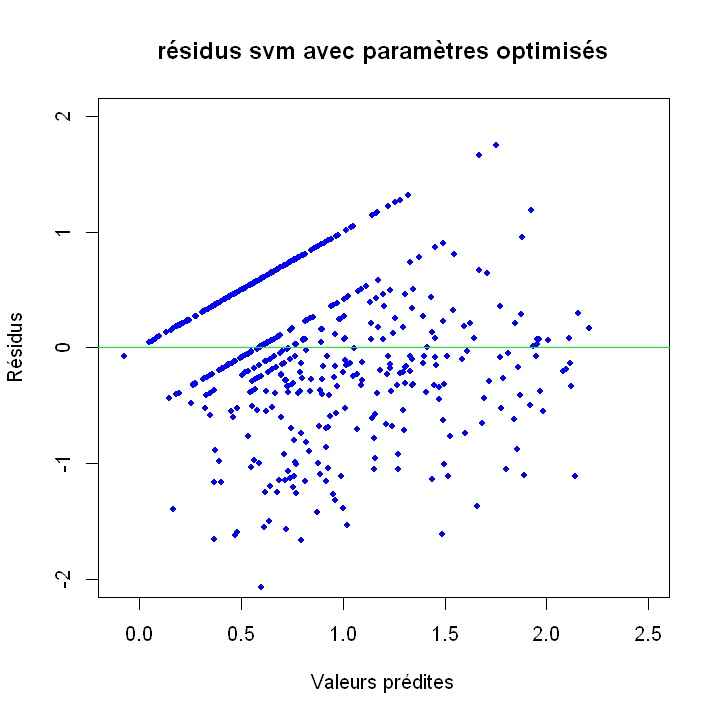

In [168]:
# calcul et graphe des r√©sidus
options(repr.plot.width = 6, repr.plot.height = 6)
fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-datappr[,"rain_mod"]
plot.res(fit.svmr,res.svmr,titre="r√©sidus svm avec param√®tres optimis√©s",lim_y = c(-2, 2),lim_x = c(-0.1, 2.5))

**Q** Qu'est-ce qui cause le rapprochement des r√©sidus dans un "couloir"? Qu'observez-vous lorsque vous fa√Ætes varier les param√®tres cost et epsilon?

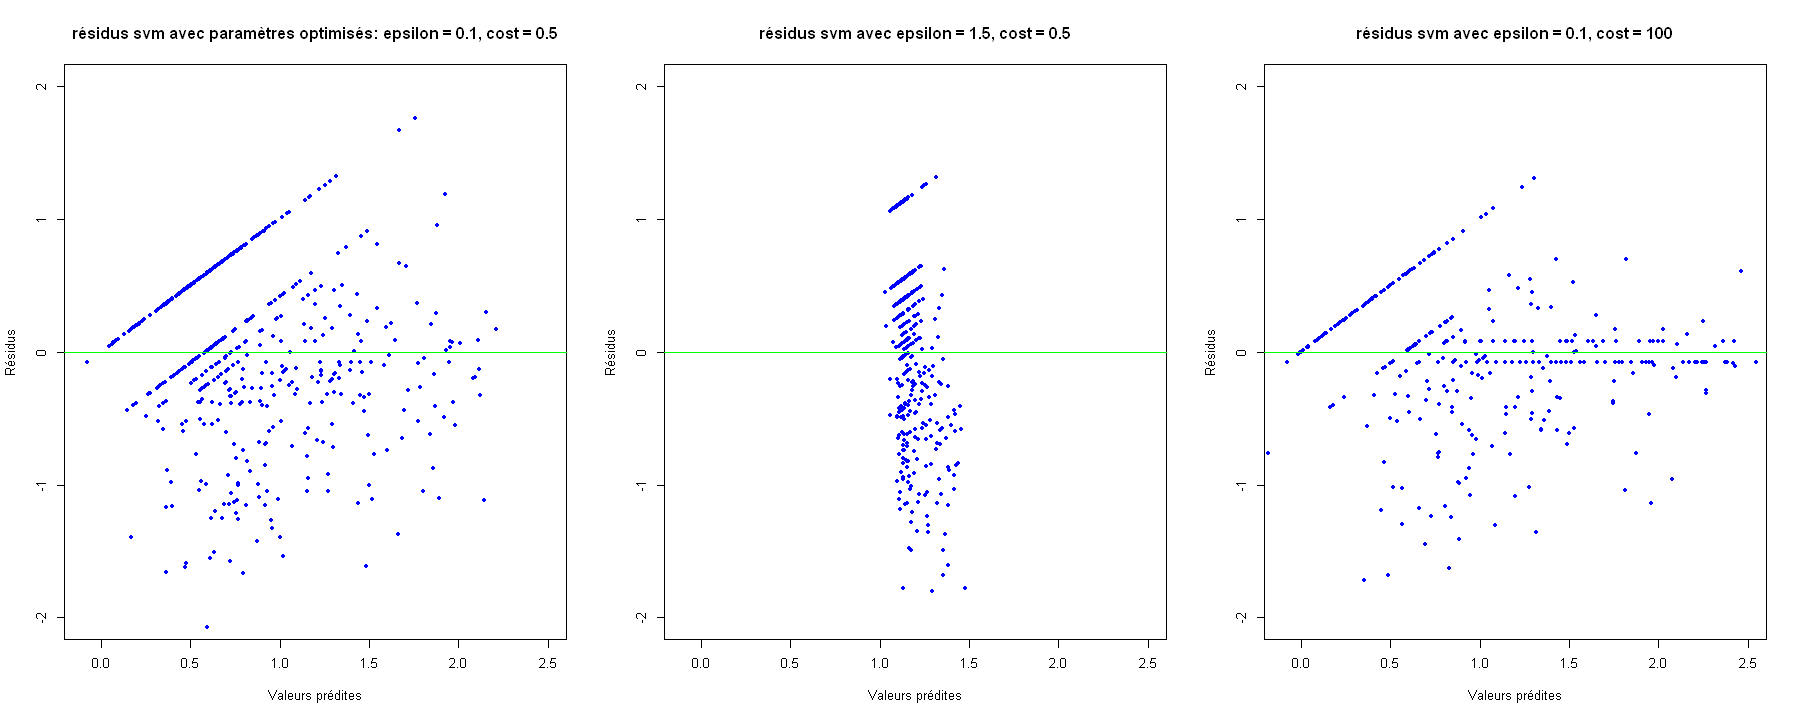

In [169]:
# Influence du param√®tre epsilon
svm.reg.epsi = svm(rain_mod ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, epsilon = 1.5, 
                    gamma = svm.reg.tune$best.parameters$gamma)
options(repr.plot.width = 6, repr.plot.height = 6)

# Influence du param√®tre cost
svm.reg.cost = svm(rain_mod ~ ., data = datappr, cost = 100, 
                    gamma = svm.reg.tune$best.parameters$gamma)

# Plot du graphe des r√©sidus pour les param√®tres optimaux
options(repr.plot.width = 15, repr.plot.height = 6)
par(mfrow = c(1, 3))
plot.res(fit.svmr,res.svmr,titre="r√©sidus svm avec param√®tres optimis√©s: epsilon = 0.1, cost = 0.5",lim_y = c(-2, 2),lim_x = c(-0.1, 2.5))

# Plot du graphe des r√©sidus pour epsilon modifi√©
fit.svmr.epsi=svm.reg.epsi$fitted
res.svmr.epsi=fit.svmr.epsi-datappr[,"rain_mod"]
plot.res(fit.svmr.epsi,res.svmr.epsi,titre="r√©sidus svm avec epsilon = 1.5, cost = 0.5",lim_y = c(-2, 2),lim_x = c(-0.1, 2.5))

# Plot du graphe des r√©sidus pour cost modifi√©
fit.svmr.cost=svm.reg.cost$fitted
res.svmr.cost=fit.svmr.cost-datappr[,"rain_mod"]
plot.res(fit.svmr.cost,res.svmr.cost,titre="r√©sidus svm avec epsilon = 0.1, cost = 100",lim_y = c(-2, 2),lim_x = c(-0.1, 2.5))

<FONT COLOR = "blue"> On remarque que lorsque `epsilon` augmente les r√©sidus ont tendance √† tendre verus une droite verticale $\hat Y = a$ et $\hat \epsilon = Y - \hat Y = Y - a$ . Rappelons que la valeur de epsilon calibre la fonction perte  $l_{\epsilon}$ qui est $\epsilon$ - sensitive c'est √† dire qu'elle est insensible aux erreurs + petites que $\epsilon$. Ainsi, plus $\epsilon$ augmente et plus les erreurs sont importantes (erreur = $\epsilon$ = d√©viation entre $f(x_i)$ et $y_i$) et donc moins la fonction $f$ d'ajuste aux donn√©es. Dans le cas extr√™me d'un epislon grand, la pr√©diction $\hat Y$ devient la   moyenne de toutes nos donn√©es et prend une valeur unique pour toutes nos donn√©es. 
    
<FONT COLOR = "blue"> Par la suite, on observe que lorsque `cost` augmente nos donn√©es commencent √† former un tube de taille $\epsilon$ autour de 0. En effet, si cost augmente, alors les slack variables $\xi_i$ diminuent et donc on n'autorise pas d'erreurs plus grandes que $\epsilon$ (les $\xi_i$ permettent de consid√©rer que certaines donn√©es hors du tube de taille $\epsilon$ sont aussi justes). Ainsi, lorsqu'une donn√©e √† pr√©dire est hors du tube de taille $\epsilon$, comme on n'a pas autoris√© d'erreurs hors tube, alors les valeurs de $\hat Y$ pr√©dites vont √™tre constantes et valoir $\pm \epsilon$ pour tenter de s'approcher au mieux de la donn√©e sans toutefois sortir du tube. 

**Q** Quels autres noyaux sont disponibles dans cette impl√©mentation des SVM?

<FONT COLOR = "blue"> Les autres noyaux propos√©s sont : linear, polynomial et sigmoid. 

<FONT COLOR = "green"> Faut-il tester d'autres kernels ? oui si on a le temps mais le noyau gaussien est le kernel √† tester de pr√©f√©rence car il fonctionne bien presque tout le temps.

### Discrimination

<FONT COLOR = "blue"> La m√©thode SVM pour la classification est initialement impl√©ment√©e pour une variable binaire $Y \in \left\{-1,1 \right\}$. 
Or il est possible de faire de la SVM Multiclass. Il s'agit d'apprendre une classe contre toutes les autres, ou de faire des mod√®le par paires de classes. Dans le cas de ce projet, nous avons 3 classes pour **rain_class** : no_rain (not√© c1), low_rain (not√© c2), high_rain (not√© c3). On apprend d'abord c1 contre c2 et c3, puis c2 contre c1 et c3 et enfin c3 contre c1 et c2. 
        
<FONT COLOR = "blue"> Le pr√©dicteur est : $\hat f(x) = 1_{\sum_{x_isv} y_i\alpha_i<x_i,x> + b ~\ge~ 0} - 1_{\sum_{x_isv} y_i\alpha_i<x_i,x> + b ~<~ 0}$
    
    
<FONT COLOR = "blue"> Nous allons obtenir les `svm.model$decision.values` qui sont un vecteur contenant les valeurs de $\sum_{x_isv} y_i\alpha_i<x_i,x> + b$ pour chaque $x_i$. Comme nous aurons 3 classes, nous avons 3 vecteurs. Ces $\sum_{x_isv} y_i\alpha_i<x_i,x> + b$ correspondent √† des distances entre le datapoint et la marge donc pour choisir √† quelle classe on attribue le datapoint $x_i$ on prendra la distance maximale parmi les 3 distances propos√©es par les 3 vecteurs. La distance la plus grande veut dire qu'on est le + loin de la ligne de s√©paration donc on est + s√ªrs de cette classification. 

In [170]:
# r√©alisation d'une SVM pour la classification : avec la variable rain_class (qualitative)
#--------------------------------------------------------------
svm.dis0 = svm(rain_class ~ ., data = datappq, type = "C",cross = 5) 
#type = "C" : classification, kernel = radial par d√©fault (noyau gaussien)
#cross = 5: k-fold cross validation on the training data to assess the quality of the model (accuracy rate)
summary(svm.dis0)


Call:
svm(formula = rain_class ~ ., data = datappq, type = "C", cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  486

 ( 203 118 165 )


Number of Classes:  3 

Levels: 
 high_rain low_rain no_rain

5-fold cross-validation on training data:

Total Accuracy: 54.36364 
Single Accuracies:
 58.18182 52.72727 56.36364 54.54545 50 




La `Single Accuracy` est la valeur de la **1 - generalization error** pour chaque √©tape de la cross-validation (ici 5) = performance de l'algo calcul√©e sur chacun des folds par validation-crois√©e. C'est le taux de bien class√©s et on voit que ce n'est pas optimal : c'est autour de 50% de bien class√©s. La validation croiss√©e nous sert √† estimer l'erreur de g√©n√©ralisation. On aurait pu aussi utiliser l'√©chantillon de test pour estimer cette erreur. 

La `Total Accuracy` est la moyenne de toutes les `Single Accuracy`. 

In [171]:
# optimisation des param√®tres pour la SVM classification
#--------------------------------------------------------------
svm.dis.tune = tune.svm(rain_class ~ ., data = datappq, cost = c(0.75,1,1.25,1.5,1.75,2), 
    gamma = seq(0.02, 0.1, by = 0.02))

In [172]:
summary(svm.dis.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
  0.02 1.75

- best performance: 0.4418182 

- Detailed performance results:
   gamma cost     error dispersion
1   0.02 0.75 0.4581818 0.07211867
2   0.04 0.75 0.4454545 0.06597437
3   0.06 0.75 0.4581818 0.06344850
4   0.08 0.75 0.4600000 0.05816288
5   0.10 0.75 0.4654545 0.05156860
6   0.02 1.00 0.4509091 0.06627987
7   0.04 1.00 0.4527273 0.05314706
8   0.06 1.00 0.4509091 0.05269592
9   0.08 1.00 0.4600000 0.05001377
10  0.10 1.00 0.4654545 0.04938557
11  0.02 1.25 0.4490909 0.07018276
12  0.04 1.25 0.4545455 0.04923660
13  0.06 1.25 0.4563636 0.04323893
14  0.08 1.25 0.4672727 0.04698436
15  0.10 1.25 0.4818182 0.05160420
16  0.02 1.50 0.4472727 0.06425386
17  0.04 1.50 0.4472727 0.05085134
18  0.06 1.50 0.4563636 0.03969581
19  0.08 1.50 0.4727273 0.04615620
20  0.10 1.50 0.4909091 0.06180630
21  0.02 1.75 0.4418182 0.05941249
22  0.04 1.75 0.4527273 0.04490578
23  0.06 1.7

In [173]:
# red√©finition de la SVM en utilisant les param√®tres optimaux trouv√©s prec√©demment.
#--------------------------------------------------------------
svm.dis.tune$best.parameters
svm.dis=svm(rain_class~.,data=datappq,cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)

gamma cost
21 0.02  1.75

### Pr√©vision de l'√©chantillon test

#### Erreur de r√©gression

In [174]:
# Erreur quadratique moyenne de pr√©vision = erreur de g√©n√©ralisation sur l'√©chantillon de test
pred.svmr=predict(svm.reg,newdata=datestr)
paste("erreur de g√©n√©ralisation: ",sum((pred.svmr-datestr[,"rain_mod"])^2)/nrow(datestr))

#Calcul MSE sur l'√©chantillon d'apprentissage 
paste("MSE : ",mean(res.svmr^2)) #res = r√©didus

[1] "erreur de g√©n√©ralisation:  0.414246346875401"

[1] "MSE :  0.367012079212372"

#### Erreur de classification (matrices de confusion)

In [175]:
# Matrice de confusion 
pred.svmq=predict(svm.dis,newdata=datestq)
table(pred.svmq,datestq[,"rain_class"])

           
pred.svmq   high_rain low_rain no_rain
  high_rain        14       11       4
  low_rain         22       47      24
  no_rain           0        5      11

In [176]:
paste("Purity pour la SVM : ",purity(table(pred.svmq,datestq[,"rain_class"])))
paste("F1_Score pour la SVM : ",F1_Score(pred.svmq,datestq[,"rain_class"]))

[1] "Purity pour la SVM :  0.521739130434783"

[1] "F1_Score pour la SVM :  0.430769230769231"

<FONT COlOR = "blue"> Pour la matrice de confusion, les lignes repr√©sentent la classe pr√©dite et les colonnes la classe r√©elle. 
    
- <FONT COlOR = "blue"> Pour la pr√©diction de low_rain on voit que le mod√®le n'est pas tr√®s bon : il se trompe une fois sur deux et pr√©dit no_rain ou high_rain de fa√ßon √©quivalente.  
    
- <FONT COlOR = "blue"> Pour la pr√©diction de high_rain n'est pas tr√®s bon non plus. Il se trompe aussi une fois sur deux et pr√©dit low_rain au lieu de high_rain
    
- <FONT COlOR = "blue"> Pour la pr√©diction de no_rain le mod√®le est un peu meilleur et donne une bonne pr√©diction dans 70M des cas.

<font color = "blue"> Transformons la r√©gression en classification :

In [177]:
pred.svmr.C = table(RegToClassif(pred.svmr), datestq[, "rain_class"])
print("Table de contingence de la SVM")
print("o√π on a transform√© la r√©gression en classification")
pred.svmr.C

paste("Purity pour la SVM o√π on a transform√© la r√©gression en classification :",purity (pred.svmr.C))
paste("F1_Score pour la SVM o√π on a transform√© la r√©gression en classification :",F1_Score(RegToClassif(pred.svmr),datestq[,"rain_class"]))

[1] "Table de contingence de la SVM"
[1] "o√π on a transform√© la r√©gression en classification"


           
            high_rain low_rain no_rain
  high_rain        13        6       1
  low_rain         23       56      37
  no_rain           0        1       1

[1] "Purity pour la SVM o√π on a transform√© la r√©gression en classification : 0.507246376811594"

[1] "F1_Score pour la SVM o√π on a transform√© la r√©gression en classification : 0.464285714285714"

#### Courbes ROC (impossible ici car 3 classes)

<FONT COLOR = "blue"> Dans le cas multinomial on ne peut pas tracer la courbe ROC. </font>

**Q** Les SVM apportent-ils une am√©lioration?